In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will be using two csv files for this project
- *diabetic_data.csv:* This file contains the dataset that shall be used for training the model for this project.
- *IDs_mapping.csv:* This file contains various Id mappings 

In [2]:
data_dir = os.getcwd() # replace this if data is not in current working directory
ids_mapping = os.path.join(data_dir, 'Dataset', 'IDs_mapping.csv')
diabetes_data = os.path.join(data_dir, 'Dataset', 'diabetic_data.csv')

# Temporary-files created (based on the definition document) for the respective attribute/feature
admission_type_mapping_data = os.path.join(data_dir, 'Dataset', 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(data_dir, 'Dataset', 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(data_dir, 'Dataset', 'admission_source_mapping.csv')

In [3]:
# CSV data into a DataFrame, the code enables further analysis and manipulation of the data using Pandas 
df = pd.read_csv(diabetes_data)

In [4]:
# Details on the data types of each column, the number of non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Column Description ##
**Encounter ID:** Unique identifier of an encounter

**Patient number:** Unique identifier of a patient

**Race Values:** Caucasian, Asian, African American, Hispanic, and other

**Gender Values:** male, female, and unknown/invalid

**Age:** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight:** Weight in pounds

**Admission type:** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition:** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source:** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital:** Integer number of days between admission and discharge

**Payer code:** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures:** Number of lab tests performed during the encounter

**Number of procedures:** Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications:** Number of distinct generic names administered during the encounter

**Number of outpatient visits:** Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits:** Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits:** Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses:** Number of diagnoses entered to the system 0%

**Glucose serum test:** result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result:** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications:** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: *metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone*, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted:** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [5]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

In [6]:
# Below "display_all" function leverages Pandas' option_context to temporarily adjust display settings, allowing flexibility without altering global display settings. 
# This is useful in situations where full visibility is needed for only a specific part of the code.
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)

# using file.readlines() to read all lines at once is efficient for small-sized to medium-sized files and allows easy access to each line through list indexing.
with open(ids_mapping, 'r') as file:
    lines = file.readlines()

# Identify the indices where the lines contain only a comma
split_indices = [i for i, line in enumerate(lines) if line.strip() == ',']

# Split the list of lines into three parts based on these indices
admission_type_lines = lines[:split_indices[0]]
discharge_disposition_lines = lines[split_indices[0] + 1:split_indices[1]]
admission_source_lines = lines[split_indices[1] + 1:]

# Write each part to a separate CSV file
with open(admission_type_mapping_data, 'w') as file:
    file.writelines(admission_type_lines)

with open(discharge_disposition_data, 'w') as file:
    file.writelines(discharge_disposition_lines)

with open(admission_source_mapping_data, 'w') as file:
    file.writelines(admission_source_lines)

# Read the three CSV files into DataFrames
admission_type_df = pd.read_csv(admission_type_mapping_data)
discharge_disposition_df = pd.read_csv(discharge_disposition_data)
admission_source_df = pd.read_csv(admission_source_mapping_data)

# delete the csv files
os.remove(admission_type_mapping_data)
os.remove(discharge_disposition_data)
os.remove(admission_source_mapping_data)

# Display the DataFrames
display_all(admission_type_df)
display_all(discharge_disposition_df)
display_all(admission_source_df)

admission_type_id    description
0                  1      Emergency
1                  2         Urgent
2                  3       Elective
3                  4        Newborn
4                  5  Not Available
5                  6            NaN
6                  7  Trauma Center
7                  8     Not Mapped

discharge_disposition_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                          9   
9                         10   
10                        11   
11                        12   
12                        13   
13                        14   
14                        15   
15                        16   
16                        17   
17                        18   
18                        19   
19                        20   
20                        21   
21                        22   
22                        23   
23                        24   
24                        25   
25                        26   
26                        30   
27                        27   
28                        28   
29                        29   

                                          description  
0                                  Discharged to home  
1   Discharged/transferred to another short term h...  
2                       Discharged/transferred to SNF  
3                       Discharged/transferred to ICF  
4   Discharged/transferred to another type of inpa...  
5   Discharged/transferred to home with home healt...  
6                                            Left AMA  
7   Discharged/transferred to home under care of H...  
8           Admitted as an inpatient to this hospital  
9   Neonate discharged to another hospital for neo...  
10                                            Expired  
11  Still patient or expected to return for outpat...  
12                                     Hospice / home  
13                         Hospice / medical facility  
14  Discharged/transferred within this institution...  
15  Discharged/transferred/referred another instit...  
16  Discharged/transferred/referred to this instit...  
17                                                NaN  
18           Expired at home. Medicaid only, hospice.  
19  Expired in a medical facility. Medicaid only, ...  
20    Expired, place unknown. Medicaid only, hospice.  
21  Discharged/transferred to another rehab fac in...  
22  Discharged/transferred to a long term care hos...  
23  Discharged/transferred to a nursing facility c...  
24                                         Not Mapped  
25                                    Unknown/Invalid  
26  Discharged/transferred to another Type of Heal...  
27  Discharged/transferred to a federal health car...  
28  Discharged/transferred/referred to a psychiatr...  
29  Discharged/transferred to a Critical Access Ho...

admission_source_id                                        description
0                     1                                 Physician Referral
1                     2                                    Clinic Referral
2                     3                                       HMO Referral
3                     4                           Transfer from a hospital
4                     5     Transfer from a Skilled Nursing Facility (SNF)
5                     6         Transfer from another health care facility
6                     7                                     Emergency Room
7                     8                              Court/Law Enforcement
8                     9                                      Not Available
9                    10              Transfer from critial access hospital
10                   11                                    Normal Delivery
11                   12                                 Premature Delivery
12                   13                                          Sick Baby
13                   14                                   Extramural Birth
14                   15                                      Not Available
15                   17                                                NaN
16                   18           Transfer From Another Home Health Agency
17                   19             Readmission to Same Home Health Agency
18                   20                                         Not Mapped
19                   21                                    Unknown/Invalid
20                   22   Transfer from hospital inpt/same fac reslt in...
21                   23                          Born inside this hospital
22                   24                         Born outside this hospital
23                   25            Transfer from Ambulatory Surgery Center
24                   26                              Transfer from Hospice

## Data Cleaning ##

In [7]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

In the dataset, there are "?" sign that represented the NaN values. We shall replace that with **np.nan**.

In [8]:
# Replace all ?s with NaN
def replace_question_marks(df):
    df = df.replace('?', np.nan)
    return df

replace_question_marks_tf = FunctionTransformer(replace_question_marks)

**Readmitted** column is our target feature. This represents if the patient was readmitted. 
- If the patient was readmitted in less than 30 days, then the value is **"<30"**
- If the patient was readmitted in more than 30 days, then the value is **">30"**
- If the patient was never readmitted, then the value is **NO**

Since we want to determine whether the patient was readmitted irrespective of number of days, hence
- If the patient was never readmitted, then the value is **0**.
- If the patient was readmitted, then value is **1**.

In [9]:
# Pre-process Re-admitted column. If the value is NO, replace it with 0 otherwise replace it with 1. Treat this as a categorical variable.
def preprocess_readmitted(df):
    df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
    return df

preprocess_readmitted_tf = FunctionTransformer(preprocess_readmitted)

Since the number of rows associated with **"Unknown/Invalid"** gender is only 2 to 3, we will drop the columns.

In [10]:
# drop rows with gender "Unknown/Invalid"
def drop_unknown_gender(df):
    df = df.drop(df.loc[df['gender'] == 'Unknown/Invalid'].index, axis=0)
    return df

drop_unknown_gender_tf = FunctionTransformer(drop_unknown_gender)

Currently, the age column only has a range which may not be meaningful for analysis, we shall convert it to a numerical column.
Here, we shall take the middle value of the range.

In [11]:
# Function compute_mean_age(age_str): Parses an age range string (e.g., "[30-40)"), calculates the midpoint (x + y) / 2, and returns it as a numeric value.
# pre-process Age column [x-y) -> (x+y)/2
def compute_mean_age(age_str):
    x, y = age_str[1:-1].split('-')
    x = int(x)
    y = int(y)
    mean_age = (x + y) / 2
    return mean_age

# Function preprocess_age(df): Applies compute_mean_age to each entry in the DataFrame's age column, transforming the column into a numeric format.
def preprocess_age(df):
    df['age'] = df['age'].apply(compute_mean_age)
    return df

preprocess_age_tf = FunctionTransformer(preprocess_age)

In weights column, more than **97%** of the values are missing. We can drop this column as it will not add any value to the model.

In [12]:
# Function drop_weight_column(df): Removes the weight column from the input DataFrame and returns the modified DataFrame, excluding any unnecessary or incomplete data.
# drop the weight column as it is many missing values
def drop_weight_column(df):
    df = df.drop('weight', axis=1)
    return df

drop_weight_column_tf = FunctionTransformer(drop_weight_column)

If the patient has expired, or has chosen hospice for treatment, then such patients will not be re-admitted. Hence, such data will not add any value to the model. Therefore, we will drop such rows.

In [13]:
# Function remove_expired_or_hospice_patients(df): Removes rows from the DataFrame where the discharge_disposition_id matches values associated with expiration or hospice discharge, focusing the dataset on active patient cases.
# remove all rows when the patient expired or went into hospice
def remove_expired_or_hospice_patients(df):
    df = df.drop(df.loc[df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])].index, axis=0)
    return df

remove_expired_or_hospice_patients_tf = FunctionTransformer(remove_expired_or_hospice_patients)

In the dataset, there are multiple patients with multiple entries. Hence, we will remove all such entries. This can be identified by duplicate values in **patient_nbr** and keeping the first occurence.

In [14]:
# Function remove_duplicate_patients(df): Drops duplicate rows based on the patient_nbr column, keeping only the first occurrence of each patient and ensuring each patient is represented once in the DataFrame.
# remove all rows with duplicate patient_nbr, keeping the first occurrence
def remove_duplicate_patients(df):
    df = df.drop_duplicates(subset='patient_nbr', keep='first')
    return df

remove_duplicate_patients_tf = FunctionTransformer(remove_duplicate_patients)

**payer_code** and **encounter_id** will not contribute in estimating diabetes readmission. Hence, we will drop those columns.

In [15]:
# Function drop_payer_code_and_encounter_id(df): Removes the payer_code and encounter_id columns from the DataFrame, simplifying the dataset by retaining only relevant features.
# drop payer_code and encounter_id columns
def drop_payer_code_and_encounter_id(df):
    df = df.drop(['payer_code', 'encounter_id'], axis=1)
    return df

drop_payer_code_and_encounter_id_tf = FunctionTransformer(drop_payer_code_and_encounter_id)

The **diag_1** contained three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700-900 unique ICD codes and it is extremely difficult to include them in the model and interpret them meaningfully. Therefore, these diagnosis codes were collapsed into 9 disease categories, which include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others (See Table below)

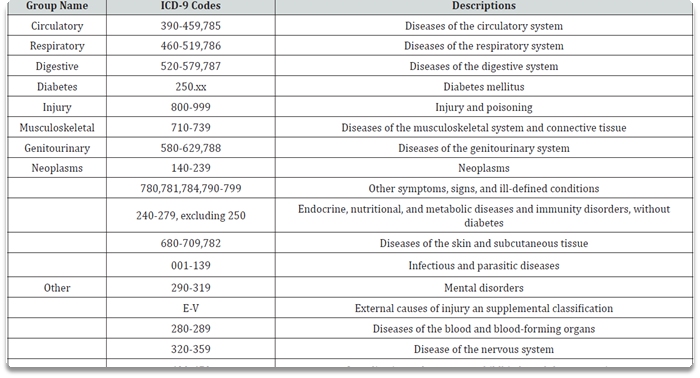

In [16]:
import re

diag_list = ['diag_1','diag_2','diag_3']

# Function transform_value(value): Standardizes diagnostic codes by replacing values beginning with 'V' or 'E' with '0' and filling in missing values as '-1'.
def transform_value(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

# Function transform_category(value): Maps numeric diagnostic values to specific categories based on predefined ranges, returning a high-level category label (e.g., 'Circulatory', 'Respiratory').
def transform_category(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

# Function preprocess_diag_column(df): Applies transform_value and transform_category transformations to each diagnostic column (diag_1, diag_2, diag_3), replacing raw codes with categorical labels.
def preprocess_diag_column(df):
    for col in diag_list:
        df[col].fillna('NaN', inplace=True)
    for col in diag_list:
        df[col] = df[col].apply(transform_value)
        df[col] = df[col].astype(float)
    for col in diag_list:
        df[col] = df[col].apply(transform_category)
    return df

preprocess_diag_column_tf = FunctionTransformer(preprocess_diag_column)

We will drop all medicine columns where a value is more than 95% of the total number of values, since this will heavily skew the training set. 

In [17]:
# Function get_medicine_columns_to_drop(df): Identifies columns where the most frequent value appears in more than 95% of rows, returning these column names as a list.
# Drop all medicines from the dataframe where the frequency of a value is more than 95% of the total number of rows
def get_medicine_columns_to_drop(df):
    threshold = 0.95 * len(df)
    columns_to_drop = []
    for column in df.columns:
        if df[column].value_counts().max() > threshold:
            columns_to_drop.append(column)
    return columns_to_drop

medicine_column_to_drop = get_medicine_columns_to_drop(df)

# Function drop_medicine_columns(df): Drops columns identified by get_medicine_columns_to_drop, effectively removing low-variability features from the DataFrame.
def drop_medicine_columns(df):
    columns_to_drop = get_medicine_columns_to_drop(df)
    print(f'The columns to drop are: {medicine_column_to_drop}')
    df = df.drop(columns=columns_to_drop)
    return df

drop_medicine_columns_tf = FunctionTransformer(drop_medicine_columns)

**diabetesMed** can be dropped because it indicates if the patient was administered some medicines for diabetes. Since, we have already columns for medicines which also captures if a medicine was prescribed, we can drop this column as its value can be derived from medicine columns.

In [18]:
# A list of medication columns that remain in the DataFrame after dropping those with high-value frequency, allowing for more targeted processing.
remaining_medicine_columns = [col for col in medicine_columns if col not in medicine_column_to_drop]

# Function drop_diabetes_med_column(df): Conditionally drops the diabetesMed column if all patients marked "No" for diabetes medication also have no other medications marked "Yes."
def drop_diabetes_med_column(df):
    filtered_df = df[df['diabetesMed'] == 'No']
    result_df = filtered_df[filtered_df[remaining_medicine_columns].eq('Yes').any(axis=1)]
    if len(result_df) == 0:
        df = df.drop('diabetesMed', axis=1)
    return df

drop_diabetes_med_column_tf = FunctionTransformer(drop_diabetes_med_column)

There are also many missing values **medical_specialty**, we will drop this column

In [19]:
# Function drop_medical_speciality(df): Removes the medical_specialty column from the input DataFrame, streamlining the dataset by excluding less relevant features.
# drop medical speciality column
def drop_medical_speciality(df):
    df = df.drop('medical_specialty', axis=1)
    return df

drop_medical_speciality_tf = FunctionTransformer(drop_medical_speciality)

Lastly, drop the **patient_nbr** column because it will not contribute in determining diabetes readmission.

In [20]:
# Function drop_patient_nbr(df): Removes the patient_nbr column from the input DataFrame, excluding a non-informative identifier.
# drop the patient_nbr column
def drop_patient_nbr(df):
    df = df.drop('patient_nbr', axis=1)
    return df

drop_patient_nbr_tf = FunctionTransformer(drop_patient_nbr)

Here, we define a pipeline for performing clean-up and pre-processing activities using **FunctionalTransformer**s above. 

In [21]:
data_cleaner_pipeline = Pipeline(steps = [
    ('replace_question_marks', replace_question_marks_tf),
    ('preprocess_readmitted', preprocess_readmitted_tf),
    ('drop_unknown_gender', drop_unknown_gender_tf),
    ('preprocess_age', preprocess_age_tf),
    ('drop_weight_column', drop_weight_column_tf),
    ('remove_expired_or_hospice_patients', remove_expired_or_hospice_patients_tf),
    ('remove_duplicate_patients', remove_duplicate_patients_tf),
    ('drop_payer_code_and_encounter_id', drop_payer_code_and_encounter_id_tf),
    ('preprocess_diag_column', preprocess_diag_column_tf),
    ('drop_medicine_columns', drop_medicine_columns_tf),
    ('drop_diabetes_med_column', drop_diabetes_med_column_tf),
    ('drop_medical_speciality', drop_medical_speciality_tf),
    ('drop_patient_nbr', drop_patient_nbr_tf)])

df = data_cleaner_pipeline.fit_transform(df)

C:\Users\ic019797\AppData\Local\Temp\ipykernel_4844\400990017.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NaN', inplace=True)


The columns to drop are: ['weight', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [22]:
# data frame after initial data cleaning
df.head()

race  gender   age  admission_type_id  discharge_disposition_id  \
0        Caucasian  Female   5.0                  6                        25   
1        Caucasian  Female  15.0                  1                         1   
2  AfricanAmerican  Female  25.0                  1                         1   
3        Caucasian    Male  35.0                  1                         1   
4        Caucasian    Male  45.0                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  ...  A1Cresult  metformin  glimepiride glipizide  \
0                1  ...        NaN         No           No        No   
1               18  ...        NaN         No           No        No   
2               13  ...        NaN         No           No    Steady   
3               16  ...        NaN         No           No        No   
4                8  ...        NaN         No           No    Steady   

  glyburide pioglitazone  rosiglitazone insulin change readmitted  
0        No           No             No      No     No          0  
1        No           No             No      Up     Ch          1  
2        No           No             No      No     No          0  
3        No           No             No      Up     Ch          0  
4        No           No             No  Steady     Ch          0  

[5 rows x 28 columns]

# Visualizations

### Readmissions to Number of patients ###

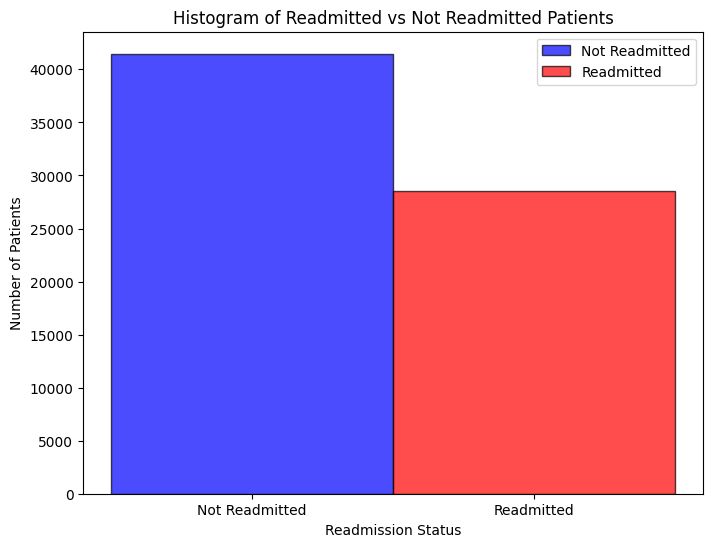

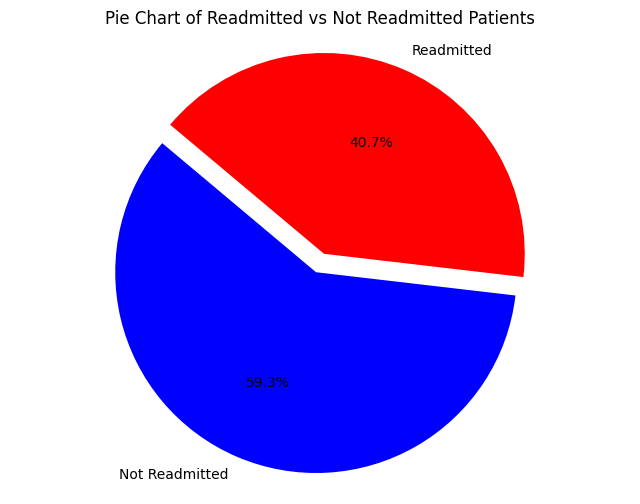

In [23]:
# Splits the DataFrame into two parts: not_readmitted for patients not readmitted and readmitted for those who were.
not_readmitted = df[df['readmitted'] == 0]
readmitted = df[df['readmitted'] == 1]

# Creates a histogram with separate bars for readmitted (red) and not readmitted (blue) patients.
# Sets up labels, title, and legend to enhance readability.
plt.figure(figsize=(8, 6))
plt.hist(not_readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='blue', label='Not Readmitted')
plt.hist(readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='red', label='Readmitted')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.title('Histogram of Readmitted vs Not Readmitted Patients')
plt.legend()
plt.show()

# Counts the number of patients in each readmission category.
not_readmitted_count = df[df['readmitted'] == 0].shape[0]
readmitted_count = df[df['readmitted'] == 1].shape[0]
labels = ['Not Readmitted', 'Readmitted']
sizes = [not_readmitted_count, readmitted_count]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the 1st slice (Not Readmitted)
plt.figure(figsize=(8, 6))

# Creates a pie chart with labels and colors to represent each readmission category.
# The explode parameter slightly separates the "Not Readmitted" section for emphasis.
# Displays the percentage for each category with autopct='%1.1f%%'.
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Pie Chart of Readmitted vs Not Readmitted Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
# Groups the DataFrame by the specified column and readmitted status. Counts the number of occurrences for each combination, filling missing values with zero.
# Converts the grouped data into a format suitable for plotting (one column per readmitted status).
# Plots a bar chart with separate colors for each readmitted status (not readmitted in blue and readmitted in red).
def plot_bar_chart(df, column, xlabel):
    filtered_df = df.groupby([column, 'readmitted']).size().unstack(fill_value=0)
    filtered_df.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
    plt.xlabel(xlabel)
    plt.ylabel('Number of Patients')
    plt.title(f'Bar Chart of Readmitted vs Not Readmitted Patients by {xlabel}')
    plt.legend(['Not Readmitted', 'Readmitted'])
    plt.show()

## Readmissions based on Age ##

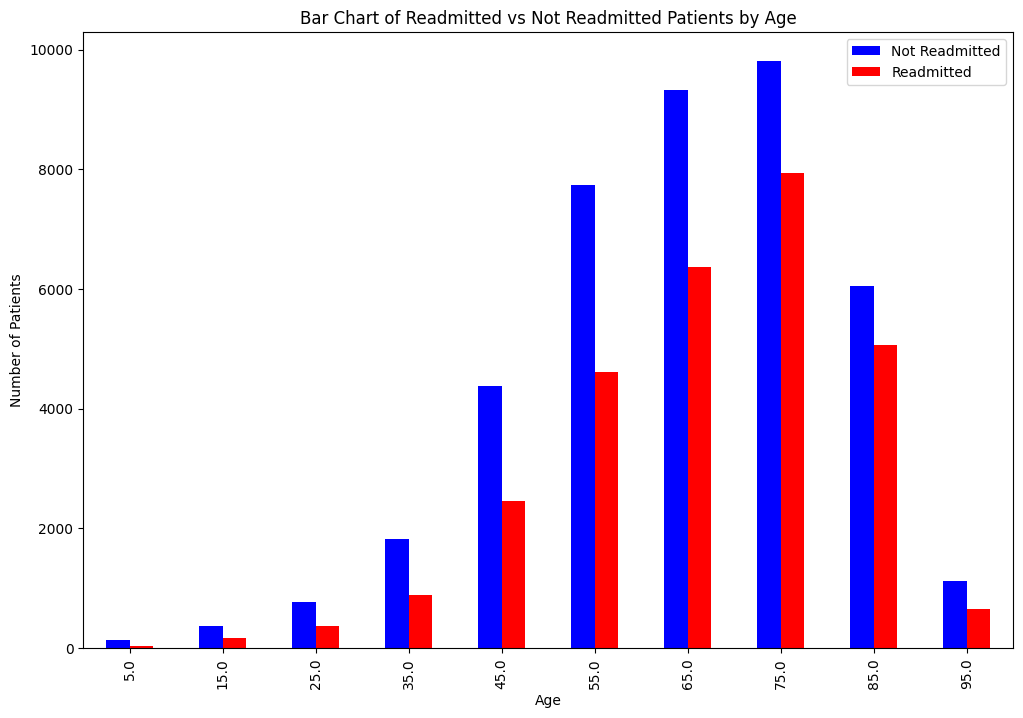

In [25]:
plot_bar_chart(df, 'age', 'Age')

## Re-admissions based on Discharge Disposition ID ##

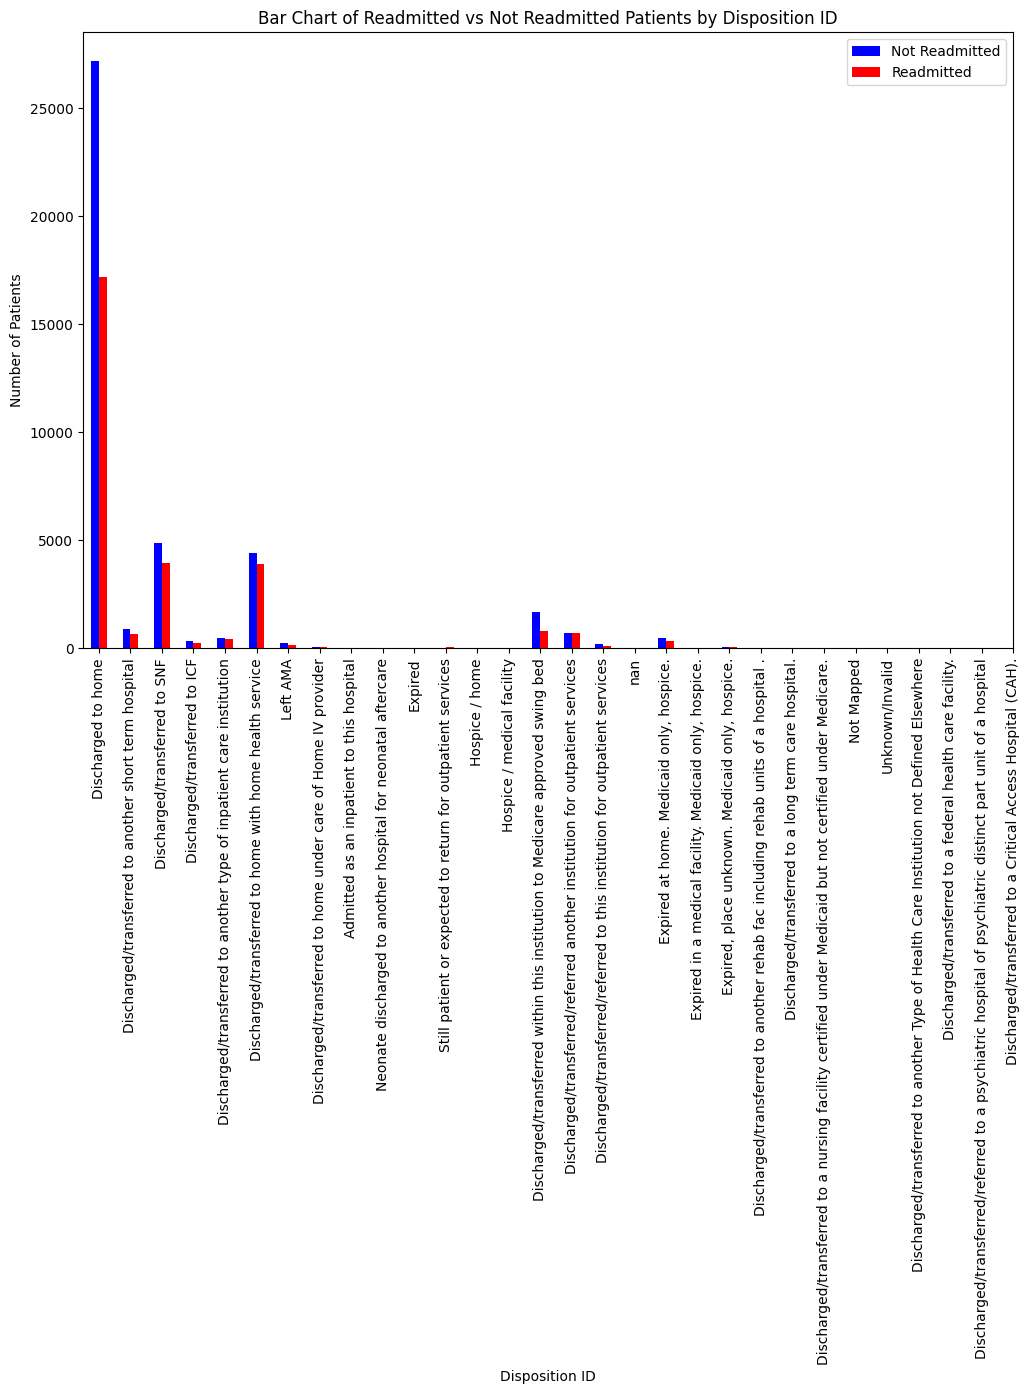

In [26]:
# Plot count of patients with readmissions vs disposition id
disposition_readmitted_counts = df.groupby(['discharge_disposition_id', 'readmitted']).size().unstack(fill_value=0)
# remove all the disposition ids that have zero counts for both readmitted and not readmitted patients
disposition_readmitted_counts = disposition_readmitted_counts.loc[(disposition_readmitted_counts != 0).any(axis=1)]

disposition_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
# before plotting, we need to replace the disposition id with the actual description
disposition_id_mapping = discharge_disposition_df.set_index('discharge_disposition_id').to_dict()['description']
plt.xticks(range(len(disposition_id_mapping)), disposition_id_mapping.values(), rotation=90)
plt.xlabel('Disposition ID')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Disposition ID')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Race ##

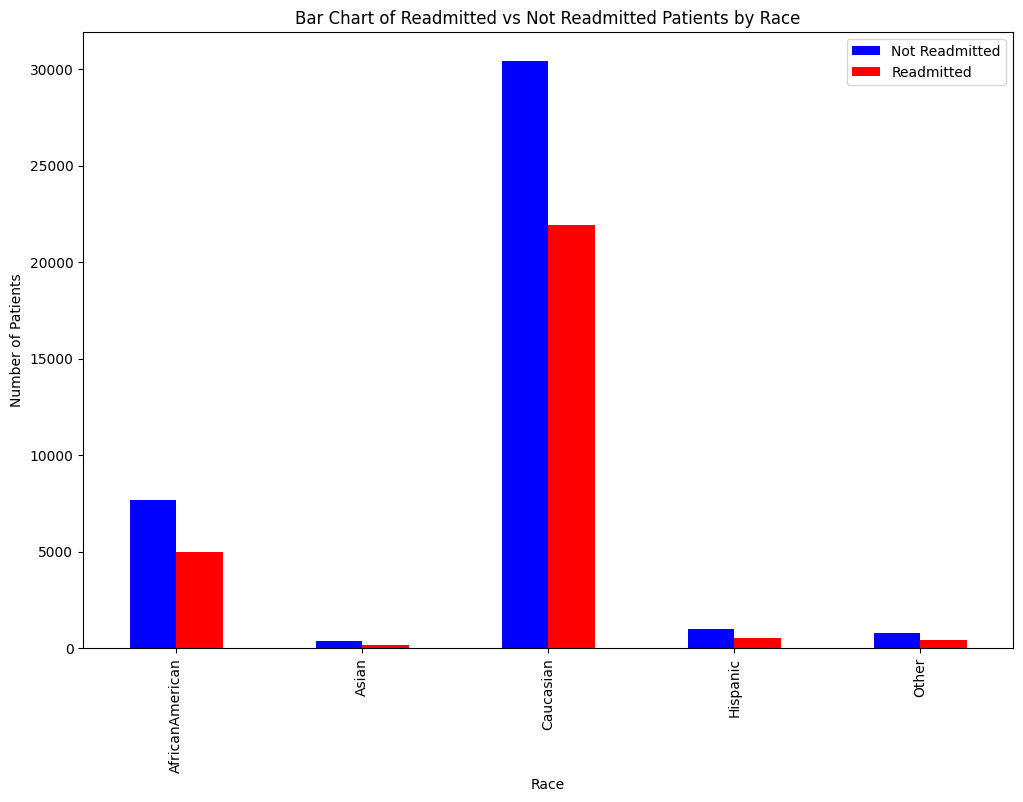

In [27]:
# plot readmission counts vs race
plot_bar_chart(df, 'race', 'Race')

## Re-admissions based on Gender ##

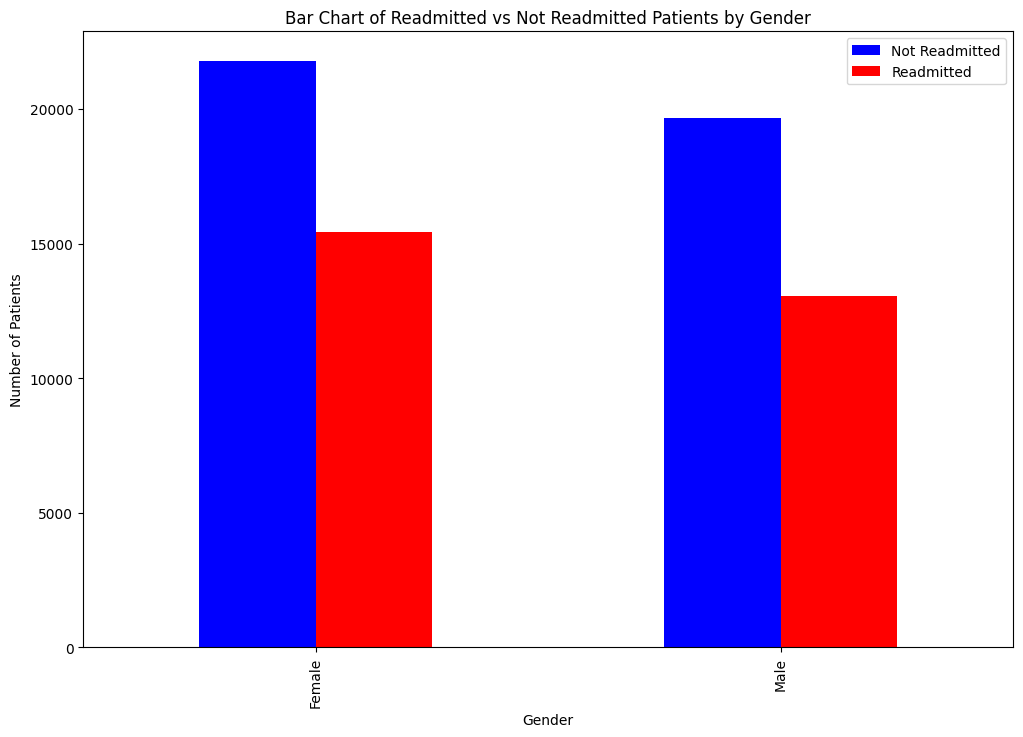

In [28]:
# plot readmission counts vs gender
plot_bar_chart(df, 'gender', 'Gender')

## Re-admissions based on Number of Procedures ##

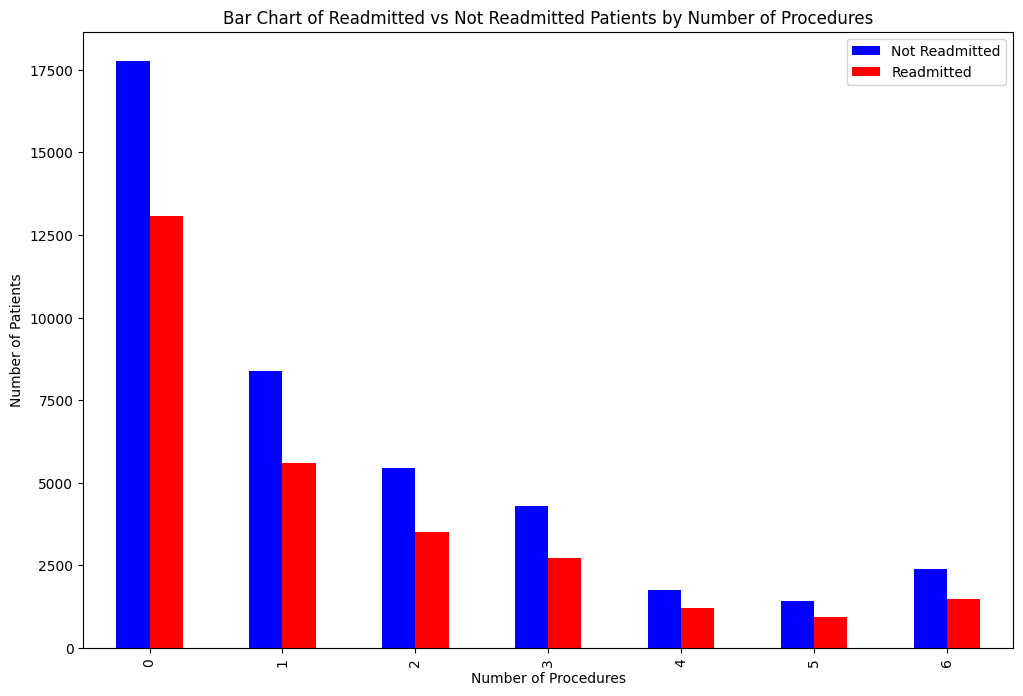

In [29]:
# plot readmission counts vs number of procedures
plot_bar_chart(df, 'num_procedures', 'Number of Procedures')

## Re-admissions based on number of medications ##

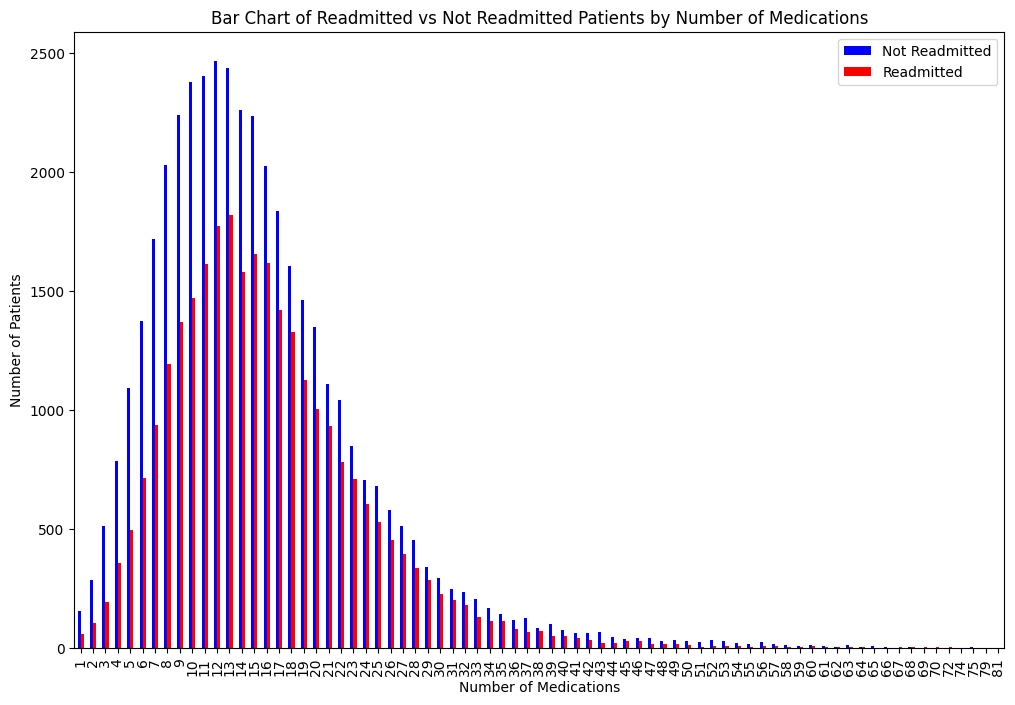

In [30]:
# plot readmission counts vs number of medications
plot_bar_chart(df, 'num_medications', 'Number of Medications')

## Re-admissions based on Number of Outpatients ##

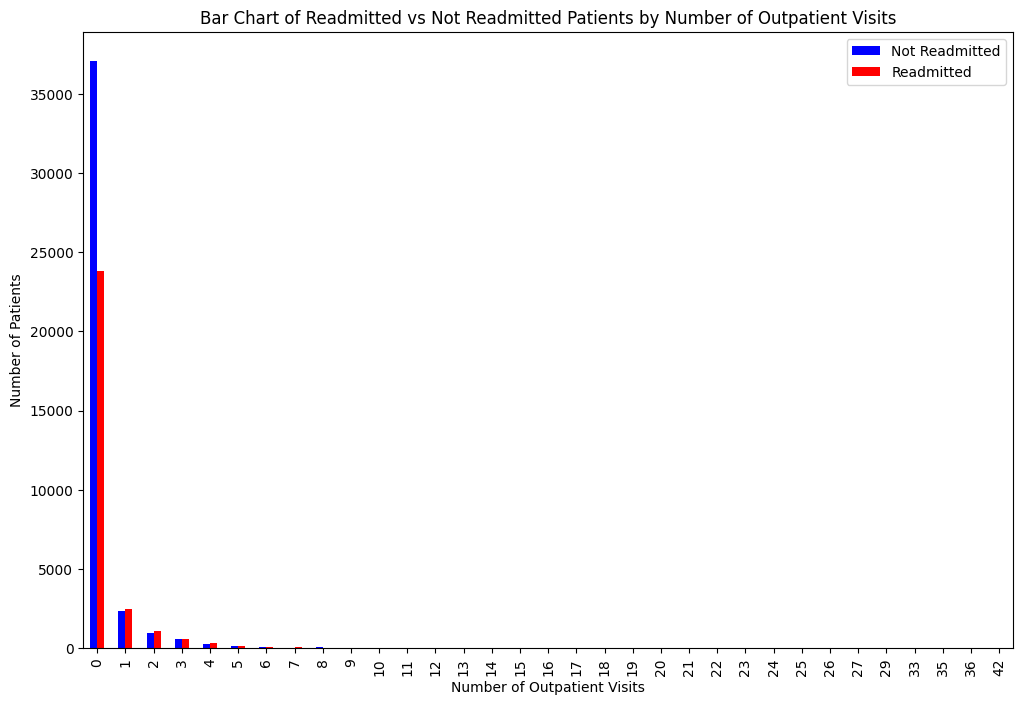

In [31]:
# plot readmission counts vs number of outpatient visits
plot_bar_chart(df, 'number_outpatient', 'Number of Outpatient Visits')

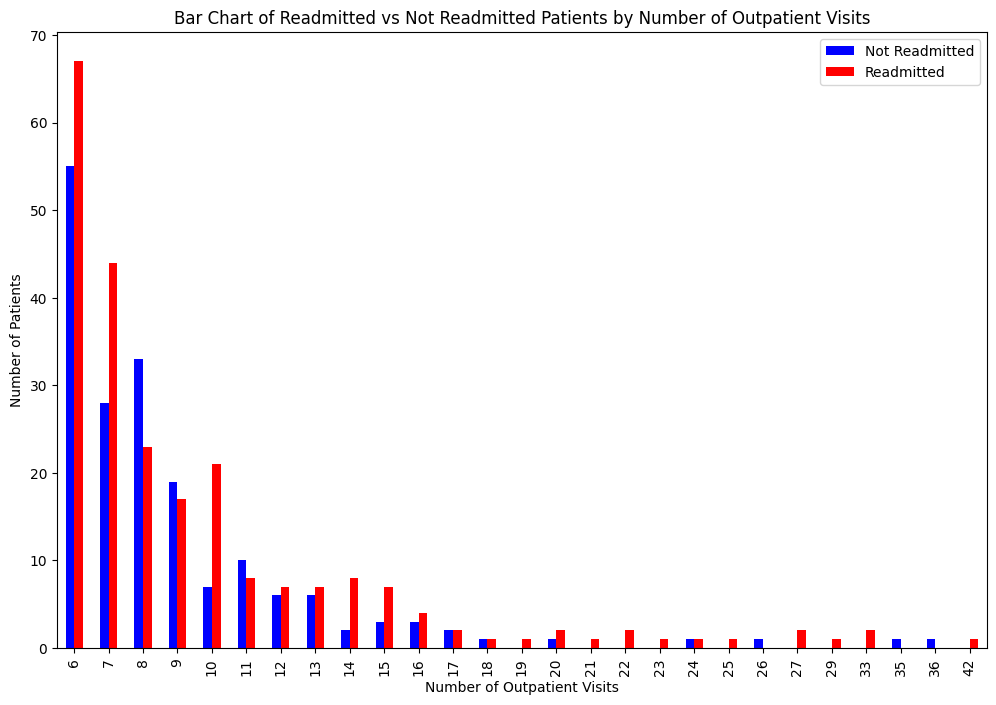

In [32]:
plot_bar_chart(df[df['number_outpatient'] > 5], 'number_outpatient', 'Number of Outpatient Visits')

## Re-admissions based on Number of Inpatients ##

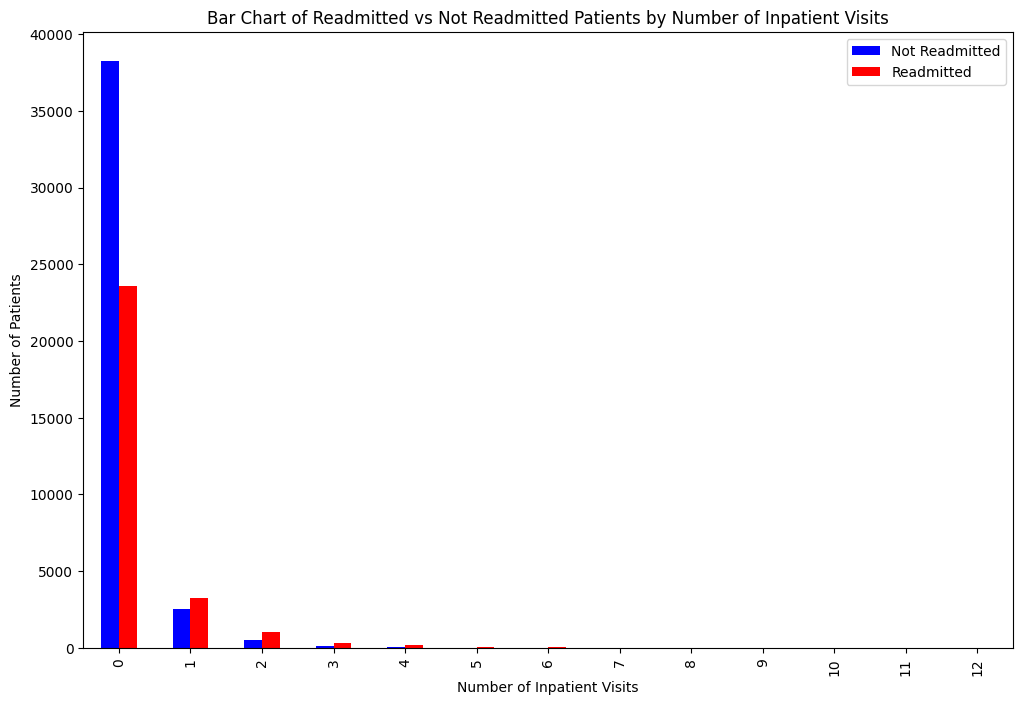

In [33]:
# plot readmission counts vs number of inpatient visits
plot_bar_chart(df, 'number_inpatient', 'Number of Inpatient Visits')

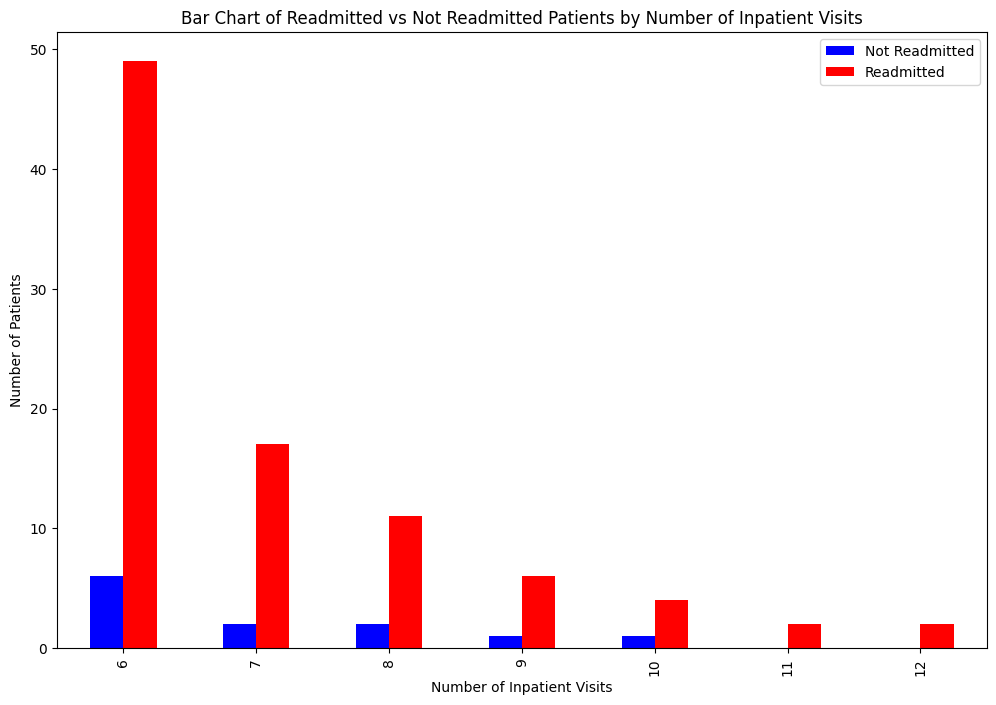

In [34]:
plot_bar_chart(df[df['number_inpatient'] > 5], 'number_inpatient', 'Number of Inpatient Visits')

# Re-admissions based on Number of lab procedures

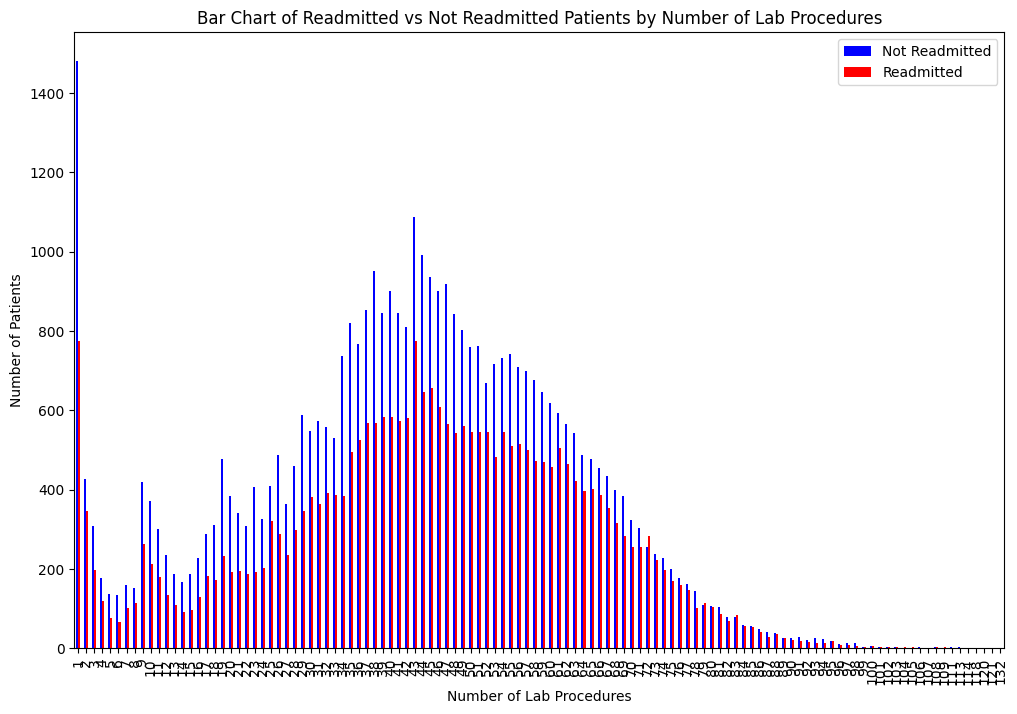

In [35]:
# plot readmission counts vs number of lab procedures
plot_bar_chart(df, 'num_lab_procedures', 'Number of Lab Procedures')

## Re-admissions based on diagnosis ##

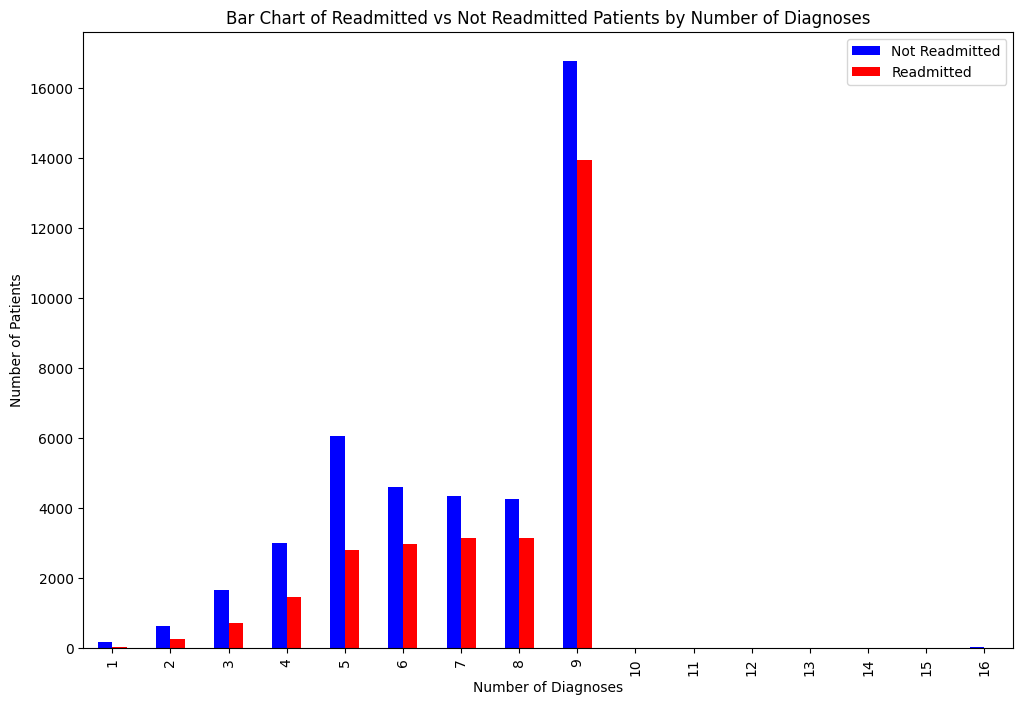

In [36]:
# plot readmission counts vs number of diagnoses
plot_bar_chart(df, 'number_diagnoses', 'Number of Diagnoses')

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>Majority of Patients with 9 Diagnoses:</strong> The chart shows that the highest number of patients, both readmitted (red) and not readmitted (blue), fall into the category with 9 diagnoses. This suggests that many patients in this dataset have a complex medical profile, requiring multiple diagnoses to capture their health status.</li>
        <li><strong>Higher Readmission Rate with Increased Diagnoses:</strong> There is a noticeable trend of increased readmission as the number of diagnoses rises. This pattern suggests that patients with a higher number of diagnoses may have more severe or chronic conditions, leading to a greater likelihood of readmission.</li>
        <li><strong>Readmission Consistency Across Lower Diagnosis Counts:</strong> For patients with fewer diagnoses (1-8), the number of readmitted and not readmitted patients is relatively balanced, although readmitted counts tend to increase slightly as the diagnosis count rises.</li>
        <li><strong>Potential Threshold at 9 Diagnoses:</strong> The sharp increase in both total patients and readmission rates at 9 diagnoses may serve as an indicator of high-risk patients. Patients with this many diagnoses might benefit from targeted post-discharge support to reduce their readmission rates.</li>
        <li><strong>Implications for Care Management:</strong> Patients with numerous diagnoses are likely to have complex medical needs. These patients could benefit from specialized care coordination and follow-up after discharge to help manage their conditions and prevent readmission.</li>
    </ul>
    <p>In summary, this chart highlights that patients with a high number of diagnoses, especially around 9, are at greater risk of readmission, indicating that diagnosis count could be an important factor in identifying high-risk patients. This insight could guide healthcare providers in prioritizing follow-up care for these patients.</p>
</div>


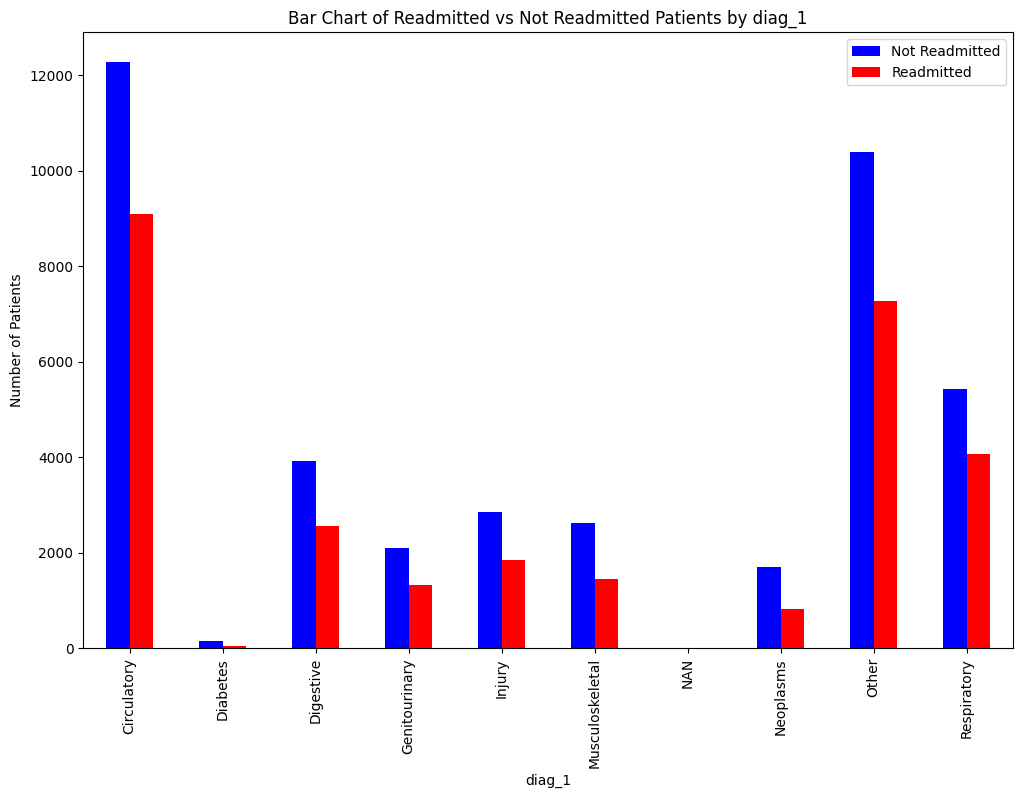

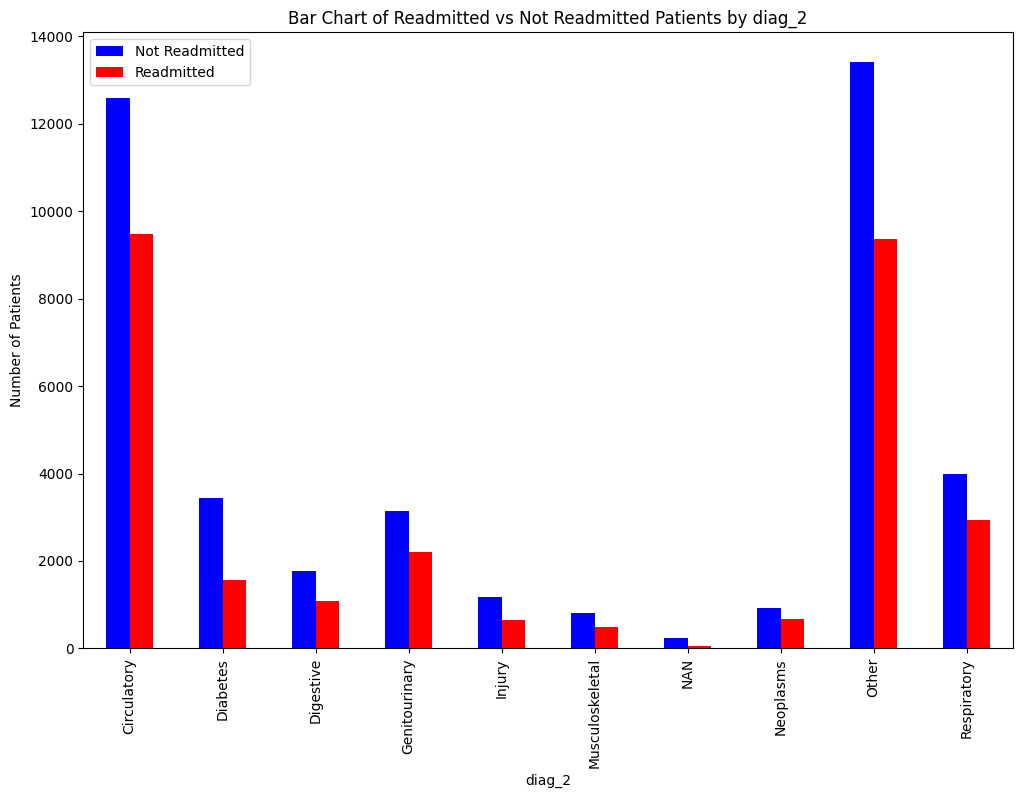

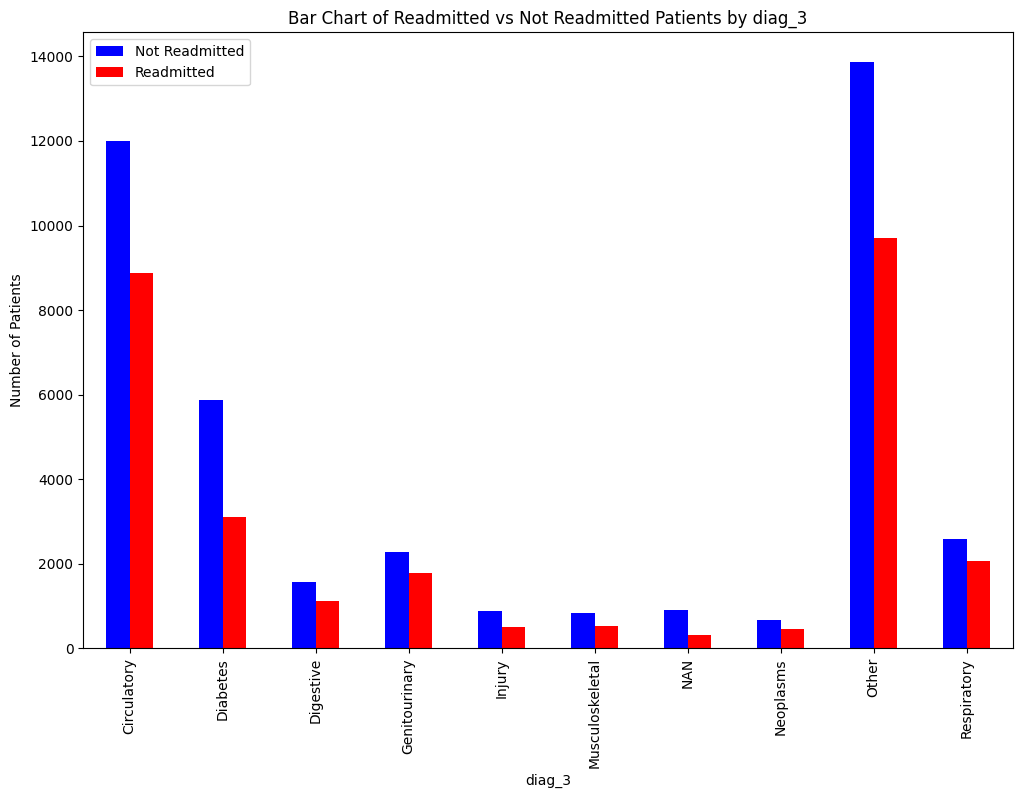

In [37]:
# plot readmission counts vs diagnisis 1
for diag_col in diag_list:
    plot_bar_chart(df, diag_col, diag_col)

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>High Readmission for Circulatory and Diabetes Diagnoses:</strong> The chart shows a substantial number of readmitted patients (red) in the "Circulatory" and "Diabetes" categories. This suggests that patients with circulatory or diabetic issues are more prone to readmission, likely due to the chronic and potentially unstable nature of these conditions.</li>
        <li><strong>Dominance of "Other" Category:</strong> The "Other" category has the highest number of patients, both readmitted and not readmitted, indicating that many diagnoses fall outside the primary categories. However, the higher count of not readmitted patients (blue) suggests that these cases may be less critical in terms of readmission risk.</li>
        <li><strong>Significant Readmission Rates in Respiratory Diagnoses:</strong> Patients with respiratory issues also show considerable readmission rates. Respiratory problems can be recurrent and require ongoing management, which might contribute to higher readmission rates.</li>
        <li><strong>Lower Readmission in Categories like Digestive and Genitourinary:</strong> The "Digestive" and "Genitourinary" categories show lower readmission rates compared to others, indicating that these conditions might be less likely to lead to readmission or could be more manageable with treatment.</li>
        <li><strong>Insight for Targeted Interventions:</strong> Patients with circulatory, diabetes, and respiratory diagnoses appear to have higher readmission rates, highlighting these categories as potential targets for post-discharge interventions. Enhanced follow-up and management plans for these conditions could help reduce readmission rates.</li>
    </ul>
    <p>In summary, this chart suggests that patients with circulatory, diabetes, and respiratory diagnoses are at a higher risk of readmission, while patients with conditions in other categories are less likely to return. This insight could be useful for healthcare providers to prioritize follow-up care for high-risk conditions.</p>
</div>

## Re-admissions based on Max Glu Serum ##

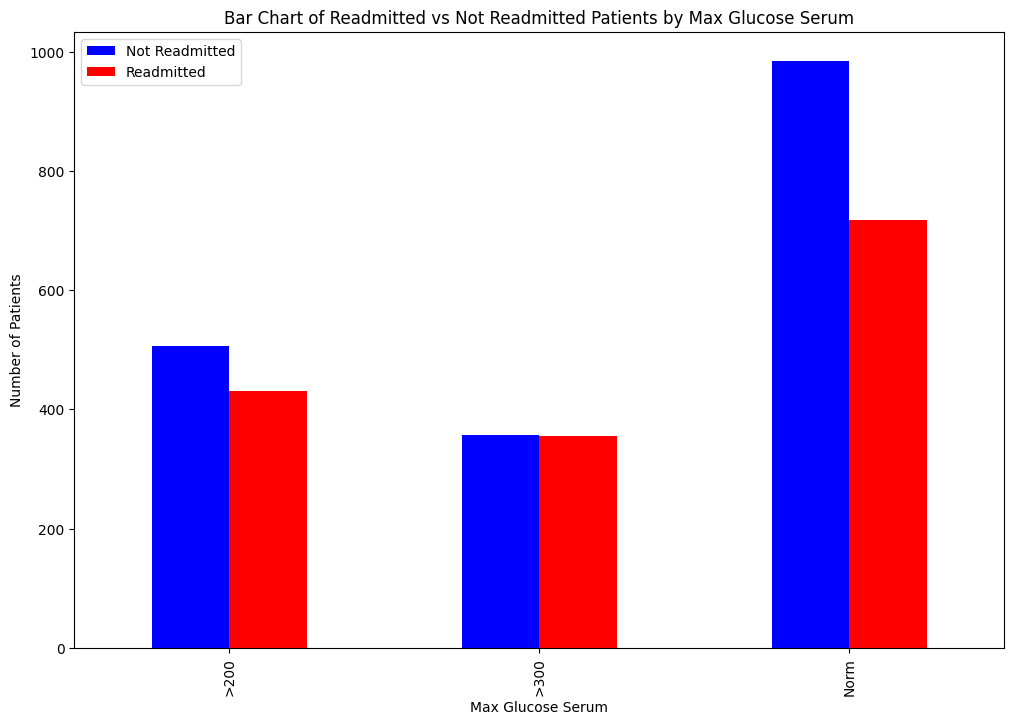

In [38]:
# plot readmissions vs max glucose serum test results
plot_bar_chart(df[pd.notna(df['max_glu_serum'])], 'max_glu_serum', 'Max Glucose Serum')

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>Higher Readmission for Elevated Glucose Levels:</strong> The categories <code>&gt;200</code> and <code>&gt;300</code> (indicating high glucose levels) have a noticeable number of readmitted patients (red), suggesting that patients with elevated glucose levels are more likely to be readmitted. This is consistent with the understanding that uncontrolled blood sugar levels can lead to complications, especially in diabetic patients.</li>
        <li><strong>Majority with Normal Glucose Levels:</strong> The largest group falls under the "Norm" category, with a significantly higher count of not readmitted patients (blue) compared to readmitted patients. This indicates that patients with normal glucose levels have a lower likelihood of being readmitted, as stable glucose levels are often associated with better-managed health.</li>
        <li><strong>Slightly Higher Readmission Rate for Patients with &gt;200 Glucose Level:</strong> Among patients with glucose levels <code>&gt;200</code>, there is a relatively balanced split between readmitted and not readmitted patients, showing a higher readmission risk than for patients in the "Norm" category. This suggests that while moderately elevated glucose can still be managed, it does increase the risk of complications leading to readmission.</li>
        <li><strong>Implications for Diabetic Management:</strong> This data reinforces the importance of glucose control in reducing hospital readmissions. Patients with elevated glucose levels might benefit from closer monitoring and intervention to manage blood sugar levels post-discharge.</li>
        <li><strong>Potential for Targeted Follow-Up:</strong> Patients with high glucose levels (especially those &gt;200) could benefit from targeted follow-up care, diabetes management programs, or personalized support to help stabilize glucose levels and reduce the risk of readmission.</li>
    </ul>
    <p>In summary, the chart indicates that elevated glucose levels are associated with a higher risk of readmission, while patients with normal glucose levels have a reduced likelihood of returning. This suggests an opportunity for healthcare providers to focus on glucose management for high-risk patients to prevent readmission.</p>
</div>


## Re-admissions based on HbA1C result ##

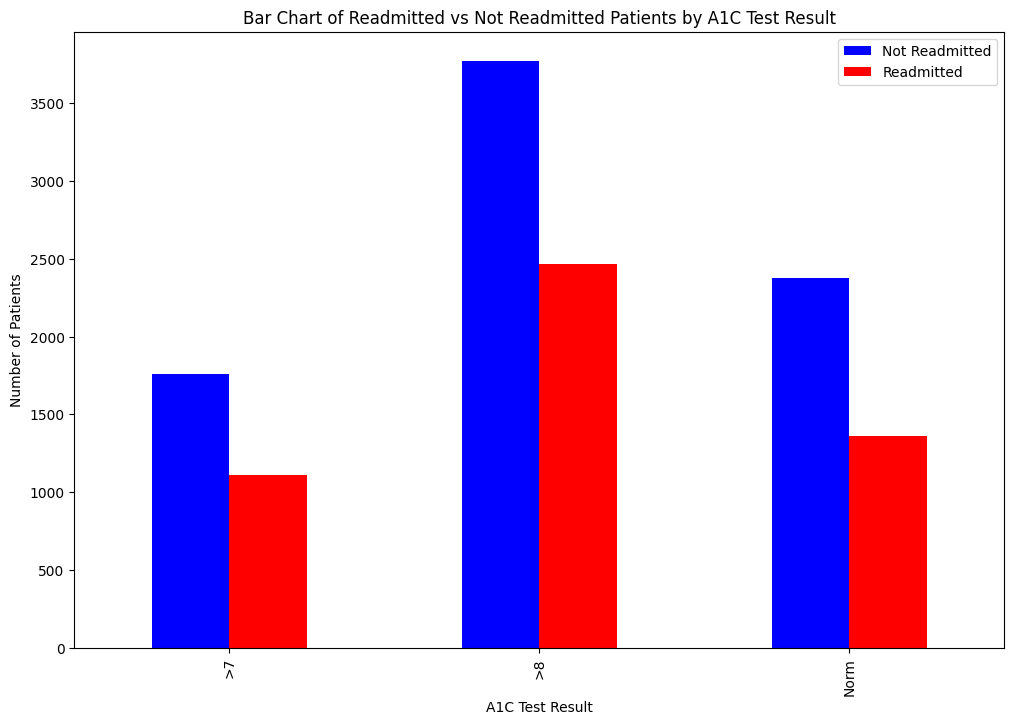

In [39]:
# plot readmissions vs A1C test results
plot_bar_chart(df[pd.notna(df['A1Cresult'])], 'A1Cresult', 'A1C Test Result')

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>Higher Readmission Rates for Elevated A1C Levels:</strong> Patients with A1C test results in the <code>&gt;8</code> category show a significant number of readmitted cases (red), suggesting that patients with poorly controlled blood sugar (indicated by high A1C) are at a greater risk of readmission. This aligns with clinical expectations, as high A1C levels often indicate long-term blood sugar management issues.</li>
        <li><strong>Balanced Readmission in &gt;7 Category:</strong> For patients with A1C levels <code>&gt;7</code>, the readmitted and not readmitted counts are closer, but there is still a considerable readmission presence. This indicates that moderately elevated A1C levels can still be a risk factor for readmission, though not as strongly as very high levels (<code>&gt;8</code>).</li>
        <li><strong>Lower Readmission for Normal A1C Levels:</strong> Patients with normal A1C levels ("Norm") show fewer readmissions compared to those with elevated levels. This suggests that patients with well-controlled blood sugar levels are less likely to return to the hospital, emphasizing the importance of maintaining A1C within a normal range.</li>
        <li><strong>Importance of A1C as a Readmission Indicator:</strong> The chart highlights A1C as a strong indicator of readmission risk, especially for patients with levels above 8. Monitoring and controlling A1C levels in diabetic patients may be crucial for reducing hospital readmissions.</li>
        <li><strong>Potential for Post-Discharge Support:</strong> Patients with high A1C levels (<code>&gt;8</code>) may benefit from targeted interventions, such as diabetes education, medication adjustments, or dietary support, to help manage their condition and prevent readmission.</li>
    </ul>
    <p>In summary, the chart suggests that elevated A1C levels are associated with a higher likelihood of readmission, while patients with normal A1C levels have a reduced risk. This insight can help healthcare providers identify high-risk patients and offer focused post-discharge care to improve outcomes.</p>
</div>


## Re-admissions based on Change ##

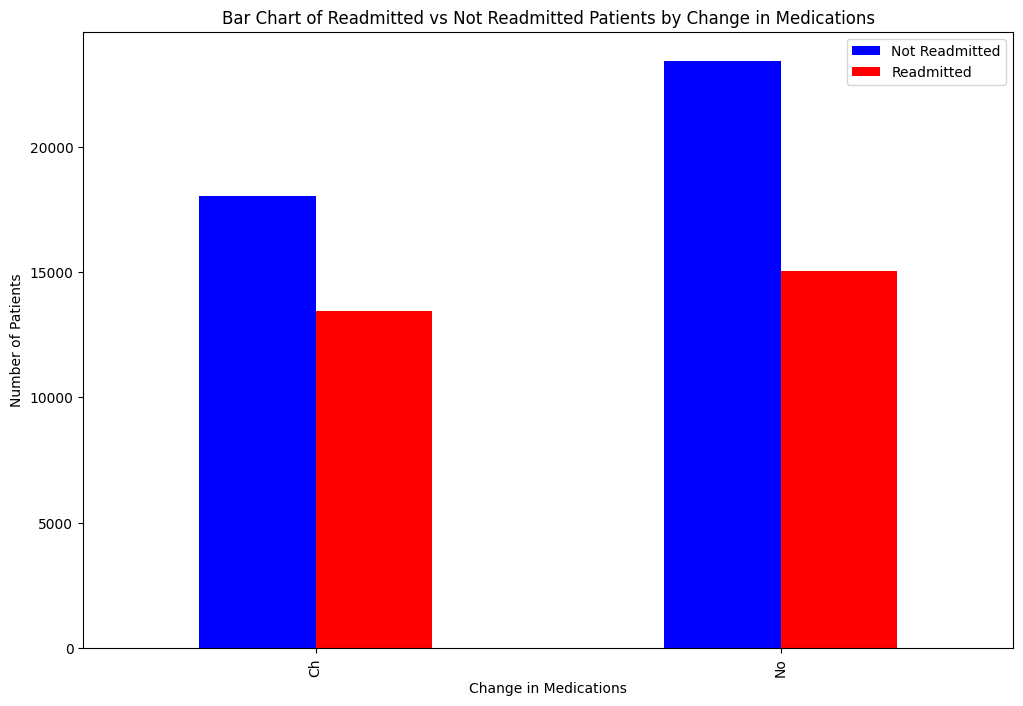

In [40]:
# plot re-admissions vs change in medications
plot_bar_chart(df, 'change', 'Change in Medications')

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>Slightly Higher Readmission with Medication Changes:</strong> The chart shows a higher number of readmitted patients (red) in both the "Yes" and "No" categories, with a slight increase in readmissions for patients with a change in medications ("Yes"). This suggests that changes in medication regimens may contribute to readmission risk, possibly due to the challenges patients face when adjusting to new medications or dosages.</li>
        <li><strong>Consistent Pattern Across Both Categories:</strong> Both categories ("Yes" and "No") have a substantial number of readmitted and not readmitted patients, indicating that while medication changes may have some impact, it is not a dominant factor alone in determining readmission likelihood.</li>
        <li><strong>Potential Indicator of Health Complexity:</strong> The presence of a change in medications could be associated with more complex or deteriorating health conditions, which might require adjustments in treatment. These patients may benefit from closer follow-up to monitor the effectiveness of the new medication and address any side effects.</li>
        <li><strong>Opportunity for Targeted Support:</strong> Patients who experience changes in their medication regimens may need additional support, such as medication counseling, to help them understand and adhere to their new treatment plans. This could potentially reduce the risk of readmission by ensuring patients are better equipped to manage changes.</li>
        <li><strong>Comparative Readmission Risk:</strong> While both groups show readmissions, the "Yes" category indicates a marginally higher risk. This insight could guide healthcare providers to flag patients with recent medication changes as needing more intensive post-discharge support.</li>
    </ul>
    <p>In summary, the chart suggests that patients who undergo a change in medications may have a slightly higher likelihood of readmission, possibly due to the complexity of their health conditions or challenges in adapting to new medications. This insight could inform healthcare providers to focus on post-discharge support for patients with recent medication adjustments.</p>
</div>


## Re-admission based on time in hospital ##

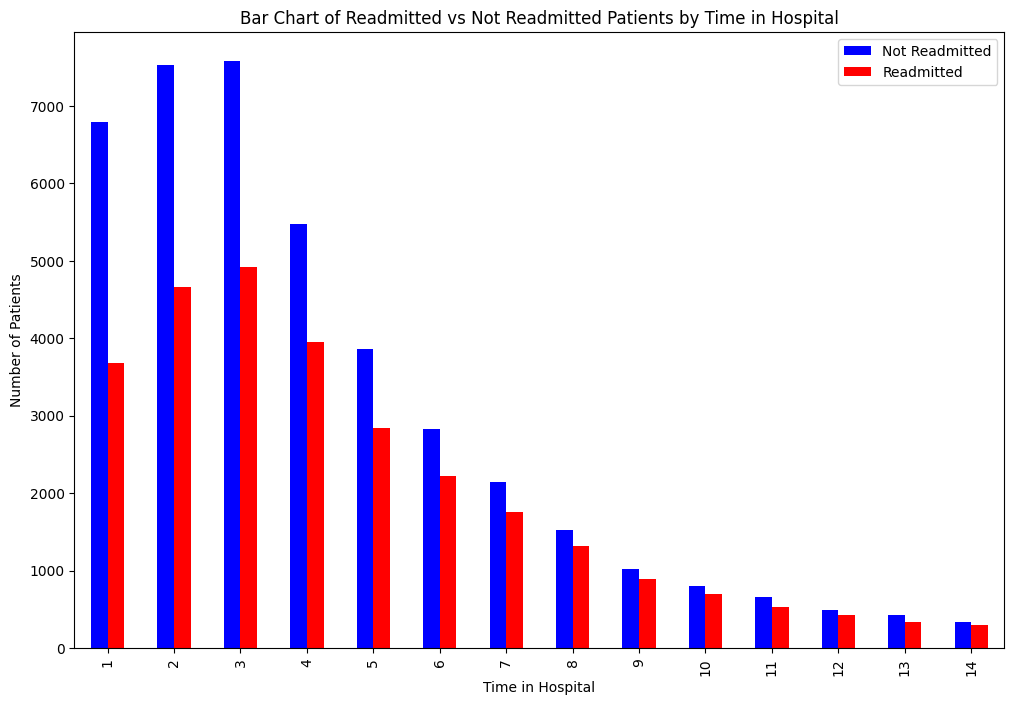

In [41]:
# plot based on re-admissions vs time in hospital
plot_bar_chart(df, 'time_in_hospital', 'Time in Hospital')

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><strong>Higher Readmission Rates with Shorter Hospital Stays:</strong> The chart shows that shorter hospital stays (1-4 days) have a higher number of readmitted patients (red), suggesting that patients discharged after a brief hospital stay are more likely to return. This could imply that these patients may have been discharged too soon or were not fully stabilized before leaving the hospital.</li>
        <li><strong>Declining Readmission with Longer Stays:</strong> As the length of hospital stay increases, the number of both readmitted and not readmitted patients decreases. Patients with longer stays (10+ days) show a lower count of readmissions, which might indicate that these patients received more comprehensive treatment or were better monitored during their stay, reducing their need for readmission.</li>
        <li><strong>Peak Readmission for 2-4 Days:</strong> The highest readmission counts occur for patients with hospital stays of 2 to 4 days. This period might be too short to fully address complex health issues, potentially leading to incomplete recovery and an increased risk of readmission.</li>
        <li><strong>Implications for Discharge Planning:</strong> Patients with shorter hospital stays might benefit from enhanced discharge planning, follow-up appointments, or additional resources to support their recovery at home. Monitoring these patients closely after discharge could help reduce readmission rates.</li>
        <li><strong>Balanced Readmission for Longer Stays:</strong> For patients with stays longer than 7 days, the red and blue bars are more balanced, indicating that the likelihood of readmission is lower and similar to not readmitted patients. This suggests that longer hospital stays could allow for better stabilization and treatment of conditions, reducing the risk of return.</li>
    </ul>
    <p>In summary, the chart suggests that patients with shorter hospital stays, particularly between 1 and 4 days, are at a higher risk of readmission. This insight can help healthcare providers identify patients who might benefit from more thorough discharge planning and post-discharge follow-up to ensure a smooth recovery.</p>
</div>


## Re-admission based on diabetes medications ##

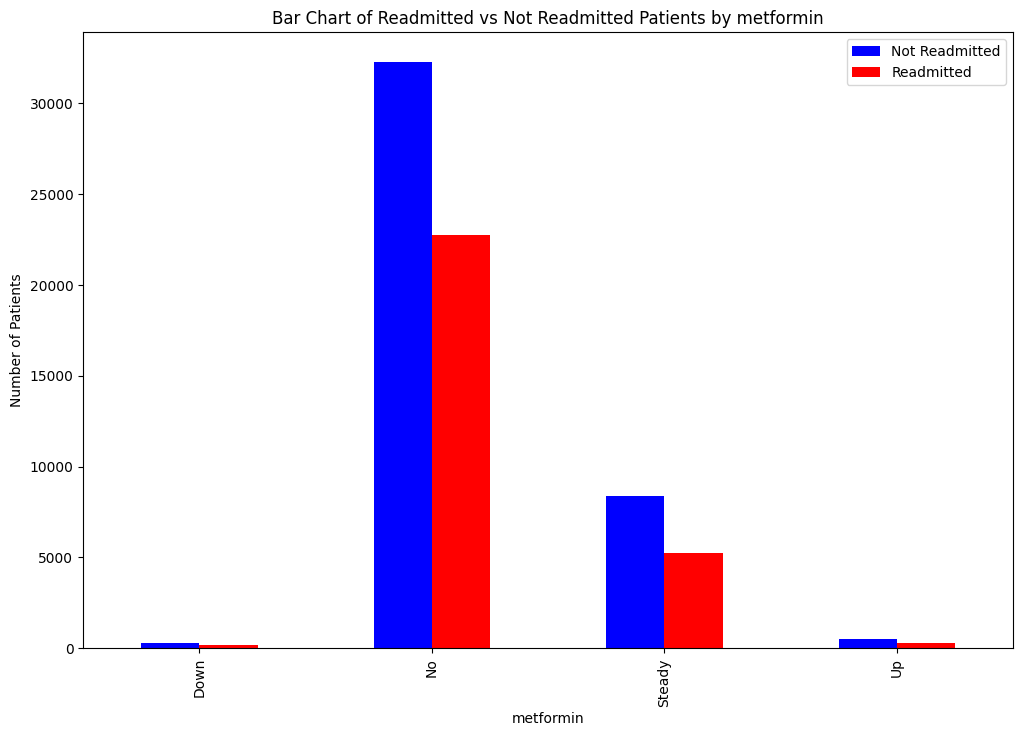

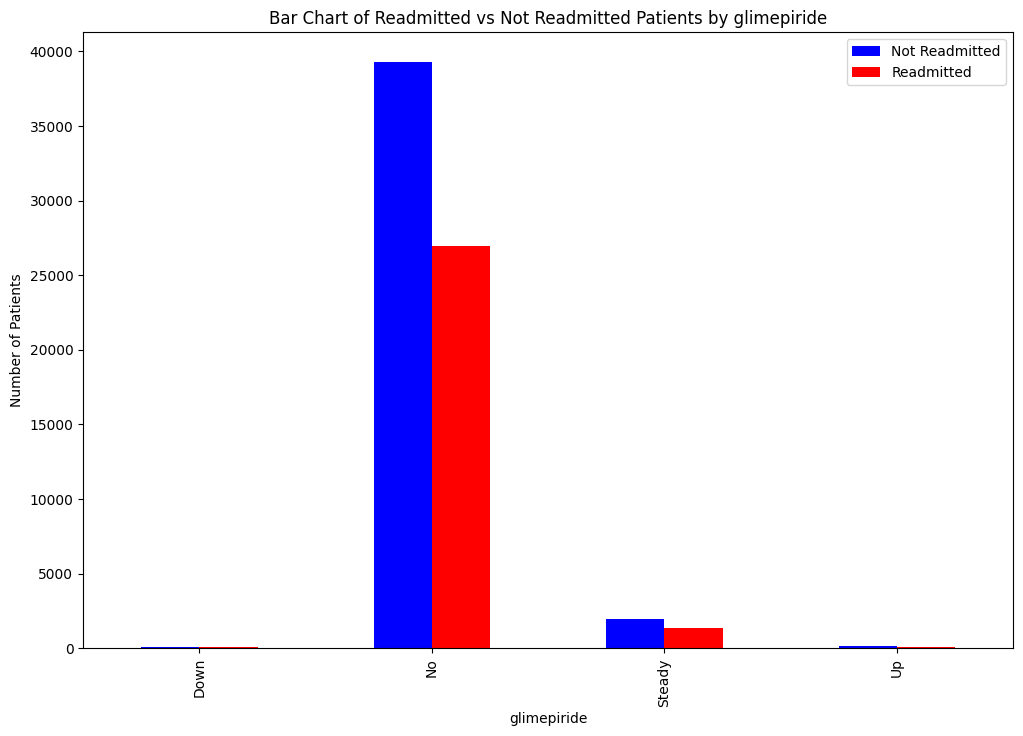

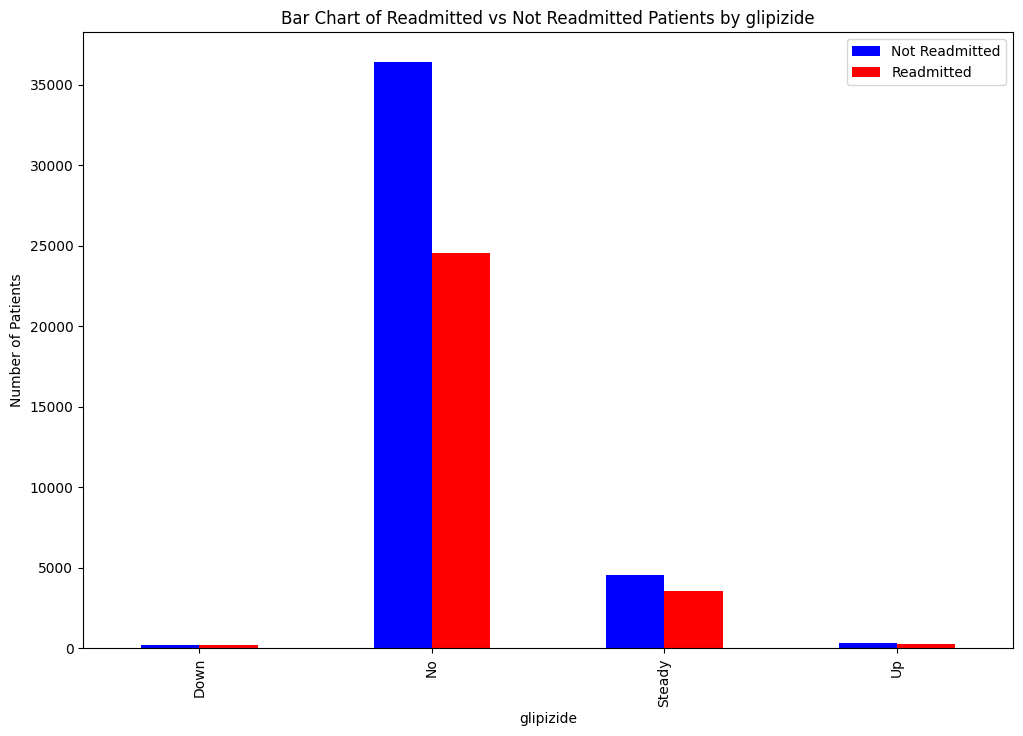

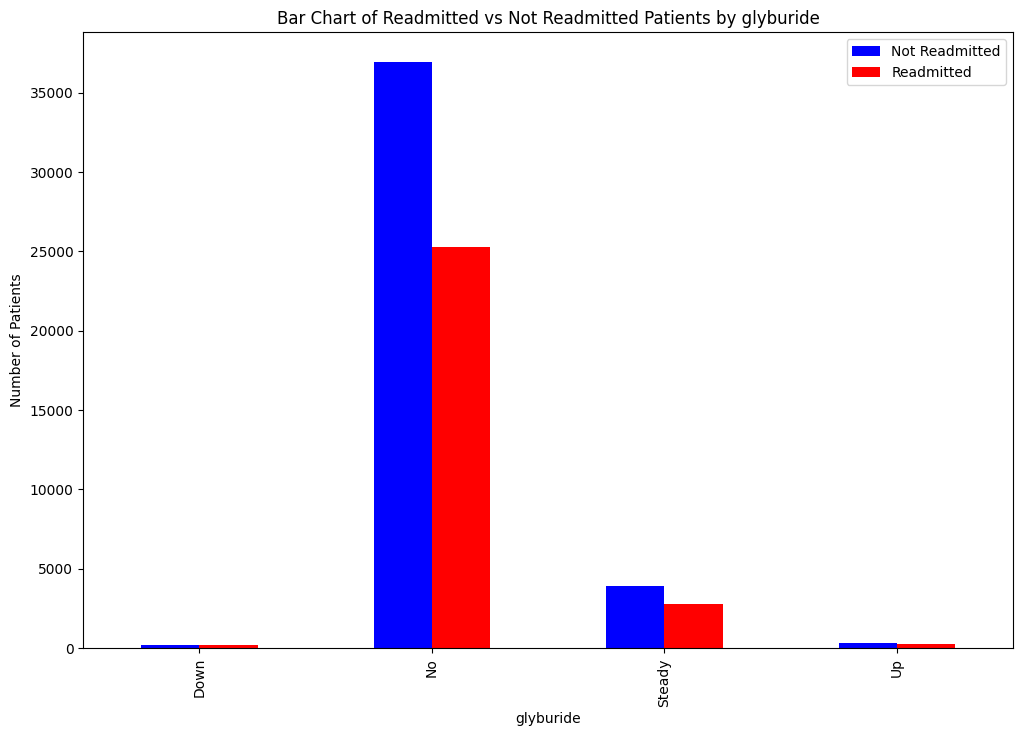

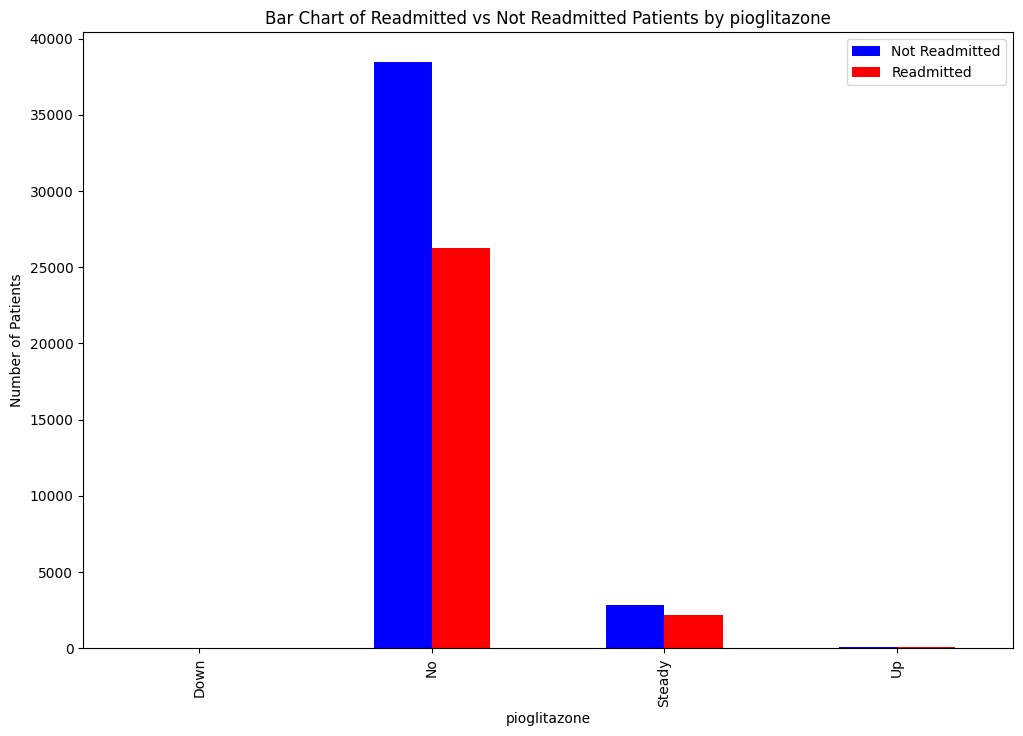

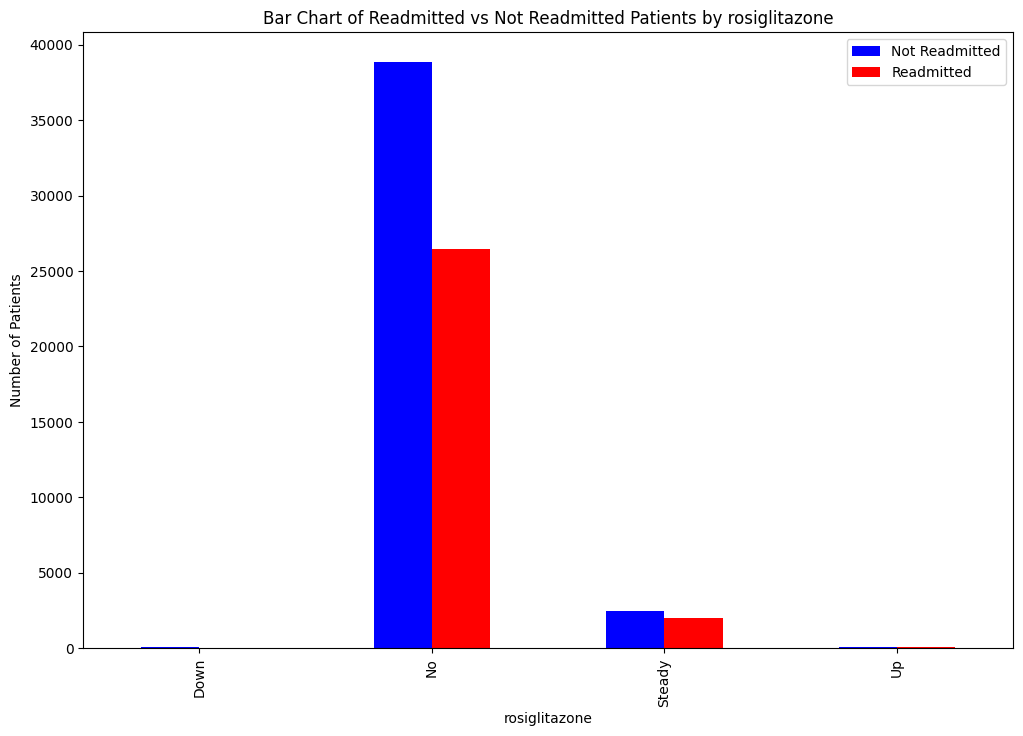

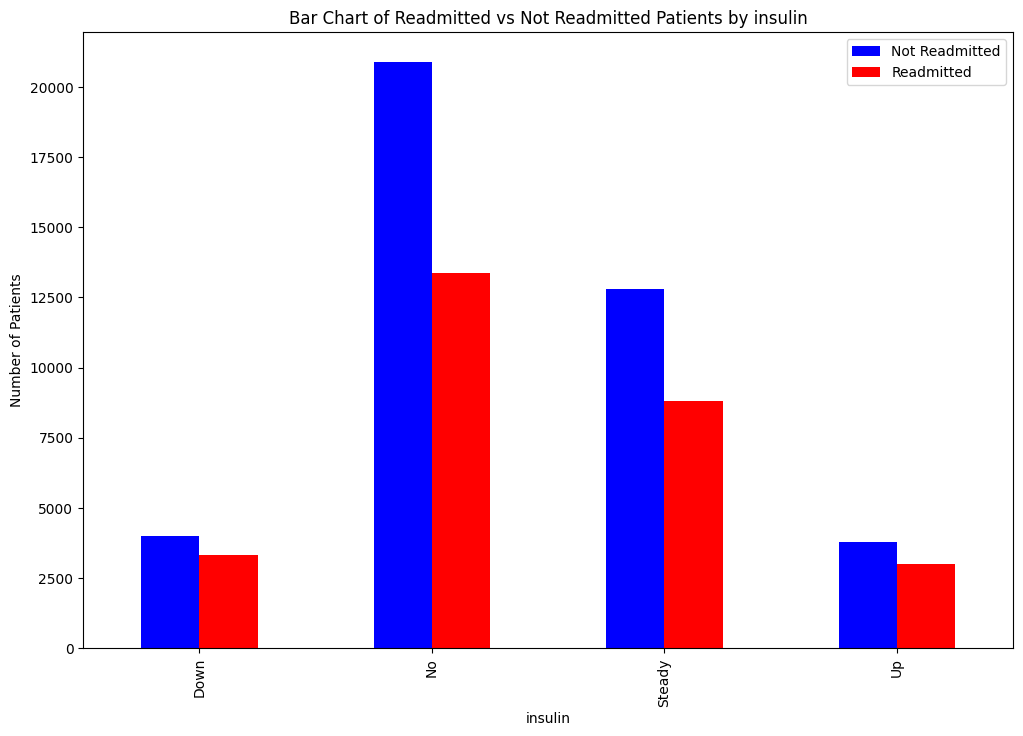

In [42]:
# get the medicine columns that are not dropped
remaining_medicine_columns = [col for col in medicine_columns if col not in medicine_column_to_drop]

for medicine in remaining_medicine_columns:
    plot_bar_chart(df, medicine, medicine)

## Re-admissions based on number of emergency visits ##

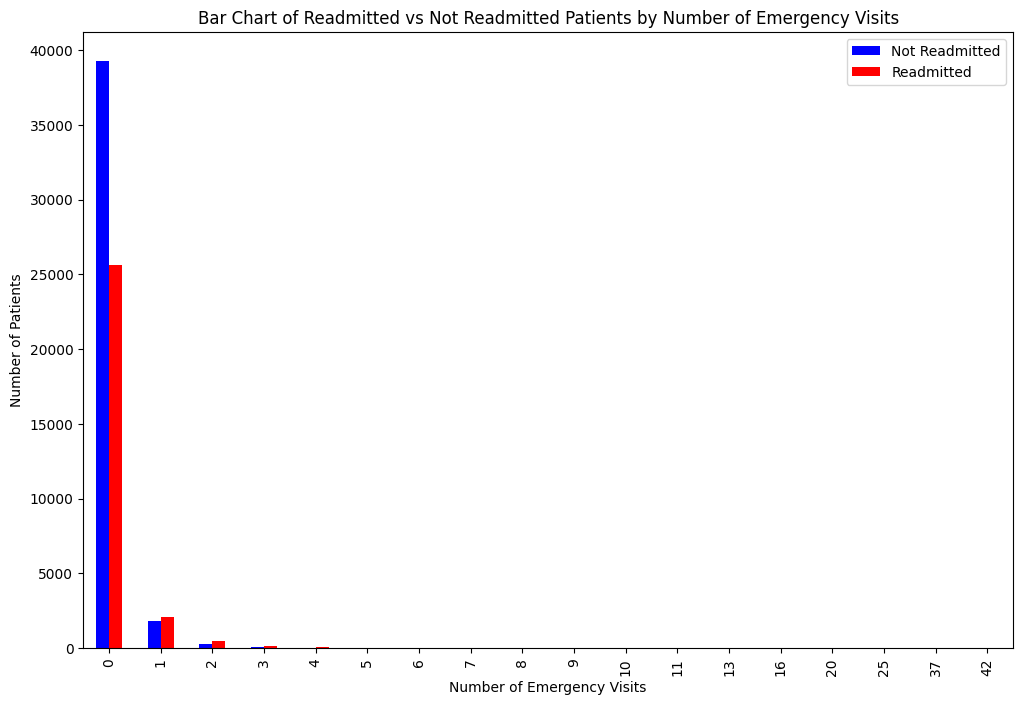

In [43]:
# plot re-admissions vs the number of emergency visits
plot_bar_chart(df, 'number_emergency', 'Number of Emergency Visits')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 101765
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      68070 non-null  object 
 1   gender                    69987 non-null  object 
 2   age                       69987 non-null  float64
 3   admission_type_id         69987 non-null  int64  
 4   discharge_disposition_id  69987 non-null  int64  
 5   admission_source_id       69987 non-null  int64  
 6   time_in_hospital          69987 non-null  int64  
 7   num_lab_procedures        69987 non-null  int64  
 8   num_procedures            69987 non-null  int64  
 9   num_medications           69987 non-null  int64  
 10  number_outpatient         69987 non-null  int64  
 11  number_emergency          69987 non-null  int64  
 12  number_inpatient          69987 non-null  int64  
 13  diag_1                    69987 non-null  object 
 14  diag_2    

### Numerical Column Analysis ###

In [45]:
numerical_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_inpatient', 'number_diagnoses'
]

In [46]:
df[numerical_cols].describe().T

count       mean        std  min   25%   50%   75%  \
age                 69987.0  65.442511  15.974161  5.0  55.0  65.0  75.0   
time_in_hospital    69987.0   4.273336   2.933987  1.0   2.0   3.0   6.0   
num_lab_procedures  69987.0  42.875863  19.894291  1.0  31.0  44.0  57.0   
num_procedures      69987.0   1.425379   1.757003  0.0   0.0   1.0   2.0   
num_medications     69987.0  15.665281   8.287321  1.0  10.0  14.0  20.0   
number_outpatient   69987.0   0.279595   1.064108  0.0   0.0   0.0   0.0   
number_inpatient    69987.0   0.176276   0.601633  0.0   0.0   0.0   0.0   
number_diagnoses    69987.0   7.224170   2.001257  1.0   6.0   8.0   9.0   

                      max  
age                  95.0  
time_in_hospital     14.0  
num_lab_procedures  132.0  
num_procedures        6.0  
num_medications      81.0  
number_outpatient    42.0  
number_inpatient     12.0  
number_diagnoses     16.0

In [47]:
# Assuming df is your DataFrame and numerical_cols is a list of numerical column names
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

race  gender       age  admission_type_id  \
0             Caucasian  Female  0.000000                  6   
1             Caucasian  Female  0.111111                  1   
2       AfricanAmerican  Female  0.222222                  1   
3             Caucasian    Male  0.333333                  1   
4             Caucasian    Male  0.444444                  1   
...                 ...     ...       ...                ...   
101754        Caucasian  Female  0.777778                  1   
101755            Other  Female  0.444444                  1   
101756            Other  Female  0.666667                  1   
101758        Caucasian  Female  0.888889                  1   
101765        Caucasian    Male  0.777778                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1          0.000000   
1                              1                    7          0.153846   
2                              1                    7          0.076923   
3                              1                    7          0.076923   
4                              1                    7          0.000000   
...                          ...                  ...               ...   
101754                         1                    7          0.615385   
101755                         1                    7          1.000000   
101756                         1                    7          0.076923   
101758                         1                    7          0.307692   
101765                         1                    7          0.384615   

        num_lab_procedures  num_procedures  num_medications  ...  A1Cresult  \
0                 0.305344        0.000000           0.0000  ...        NaN   
1                 0.442748        0.000000           0.2125  ...        NaN   
2                 0.076336        0.833333           0.1500  ...        NaN   
3                 0.328244        0.166667           0.1875  ...        NaN   
4                 0.381679        0.000000           0.0875  ...        NaN   
...                    ...             ...              ...  ...        ...   
101754            0.374046        0.333333           0.4000  ...         >7   
101755            0.549618        1.000000           0.3125  ...         >8   
101756            0.343511        1.000000           0.2000  ...        NaN   
101758            0.572519        0.166667           0.2625  ...        NaN   
101765            0.091603        0.500000           0.0250  ...        NaN   

        metformin  glimepiride glipizide glyburide pioglitazone  \
0              No           No        No        No           No   
1              No           No        No        No           No   
2              No           No    Steady        No           No   
3              No           No        No        No           No   
4              No           No    Steady        No           No   
...           ...          ...       ...       ...          ...   
101754         No           No        No        Up           No   
101755         No           No    Steady        No           No   
101756         No           No        No        No           No   
101758         No           No        No        No           No   
101765         No           No        No        No           No   

        rosiglitazone insulin change readmitted  
0                  No      No     No          0  
1                  No      Up     Ch          1  
2                  No      No     No          0  
3                  No      Up     Ch          0  
4                  No  Steady     Ch          0  
...               ...     ...    ...        ...  
101754             No  Steady     Ch          1  
101755             No      Up     Ch          1  
101756             No  Steady     No          1  
101758             No      Up     Ch          0  
101765             No      No     No         

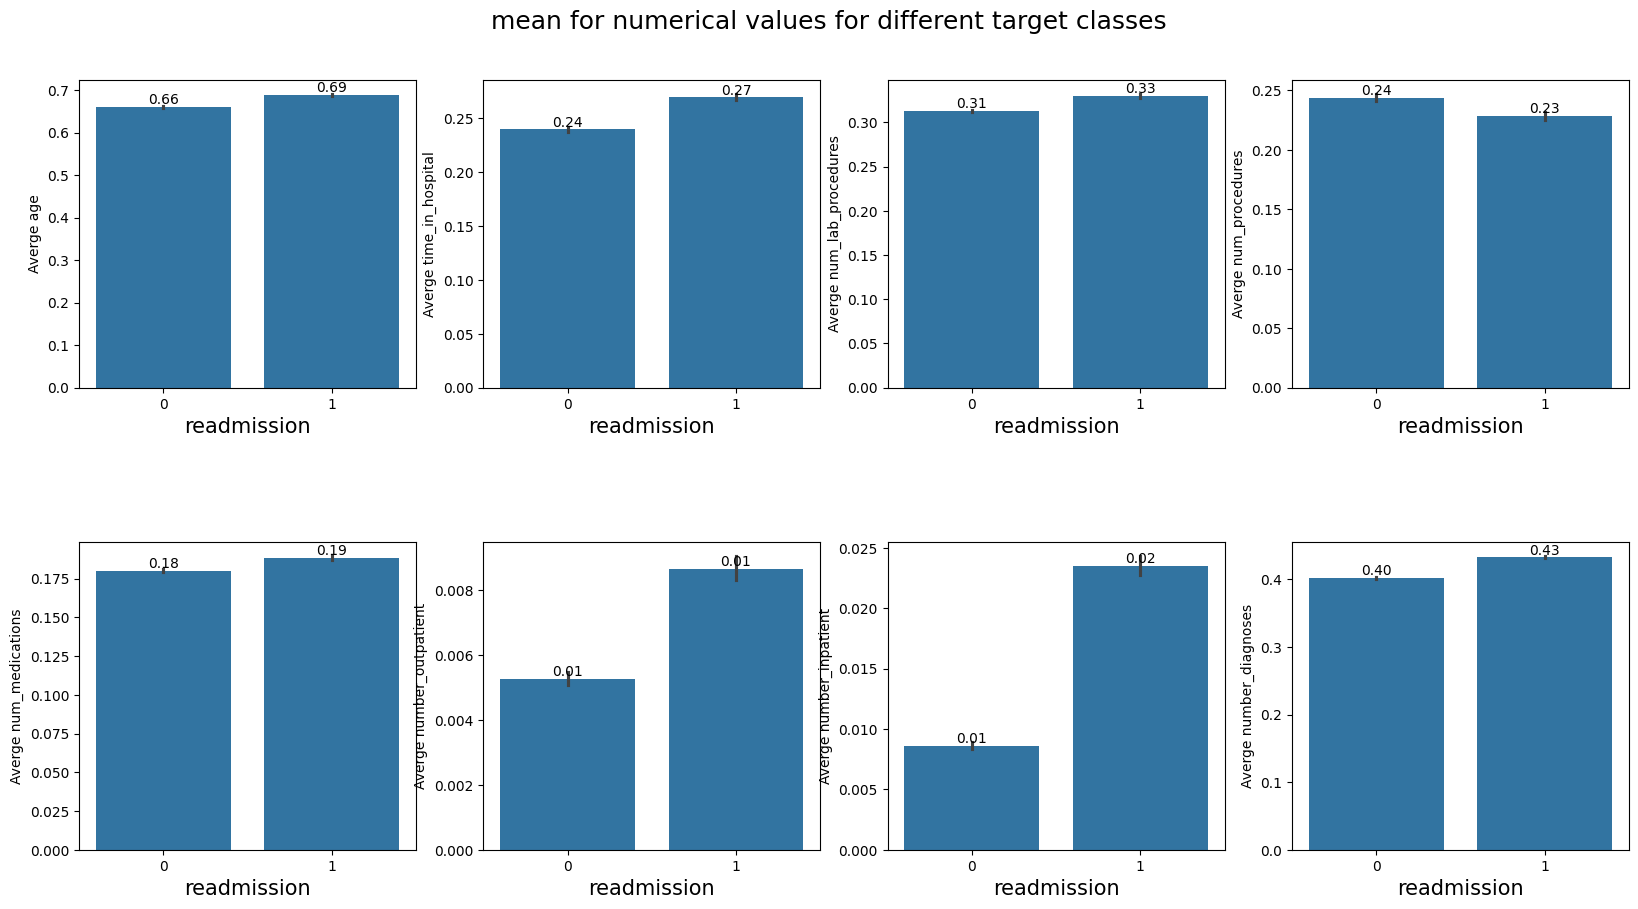

In [48]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("mean for numerical values for different target classes",
             fontsize=18,
             y=0.95)

for column, ax in zip(numerical_cols, axs.ravel()):
    sns.barplot(x=df['readmitted'], y=df[column], ax=ax)
    ax.set_xlabel("readmission", fontsize=15)
    ax.set_ylabel(f"Averge {column}", fontsize=10)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%.2f')
plt.show()

<div style="color: blue; font-size: 12px;">
    <p>Based on the bar plots showing the mean values for various numerical features across different target classes (readmission vs. no readmission), here are some insights:</p>
    <ul>
        <li><strong>Average Age:</strong> The average age is slightly higher for readmitted patients compared to non-readmitted patients. This suggests that older patients may have a marginally higher likelihood of readmission, potentially due to age-related health complexities.</li>
        <li><strong>Time in Hospital:</strong> Readmitted patients have a slightly longer average time in the hospital. This may indicate that patients with longer hospital stays have more severe or complex health conditions, which could increase the risk of readmission.</li>
        <li><strong>Lab Procedures:</strong> The average number of lab procedures is marginally higher for readmitted patients. This suggests that patients requiring more lab tests might have underlying health issues that need closer monitoring and may increase the risk of readmission.</li>
        <li><strong>Number of Procedures:</strong> The average number of procedures is similar for both readmitted and non-readmitted patients, indicating that the number of procedures alone may not be a strong predictor of readmission.</li>
        <li><strong>Number of Medications:</strong> The mean number of medications is slightly higher for readmitted patients, suggesting that those on more medications might have more complex health needs, increasing the risk of readmission.</li>
        <li><strong>Emergency Room Visits:</strong> The number of emergency room visits is noticeably higher for readmitted patients. This indicates that frequent ER visits may be a significant factor in predicting readmission, likely reflecting more acute or unmanaged health conditions.</li>
        <li><strong>Inpatient Visits:</strong> Readmitted patients also have a slightly higher average number of previous inpatient visits, suggesting that a history of inpatient care could be associated with higher readmission risk.</li>
        <li><strong>Outpatient Visits:</strong> The average number of outpatient visits is marginally lower for readmitted patients compared to non-readmitted ones. This may indicate that patients with fewer outpatient visits lack adequate follow-up care, possibly contributing to readmission.</li>
    </ul>
    <h3>Summary</h3>
    <p>These insights highlight that factors like age, time in hospital, lab procedures, number of medications, ER visits, and inpatient visits are associated with a higher likelihood of readmission. The data suggests that older patients with complex health needs, frequent ER visits, and a history of inpatient care might benefit from targeted follow-up to reduce their risk of readmission.</p>
</div>


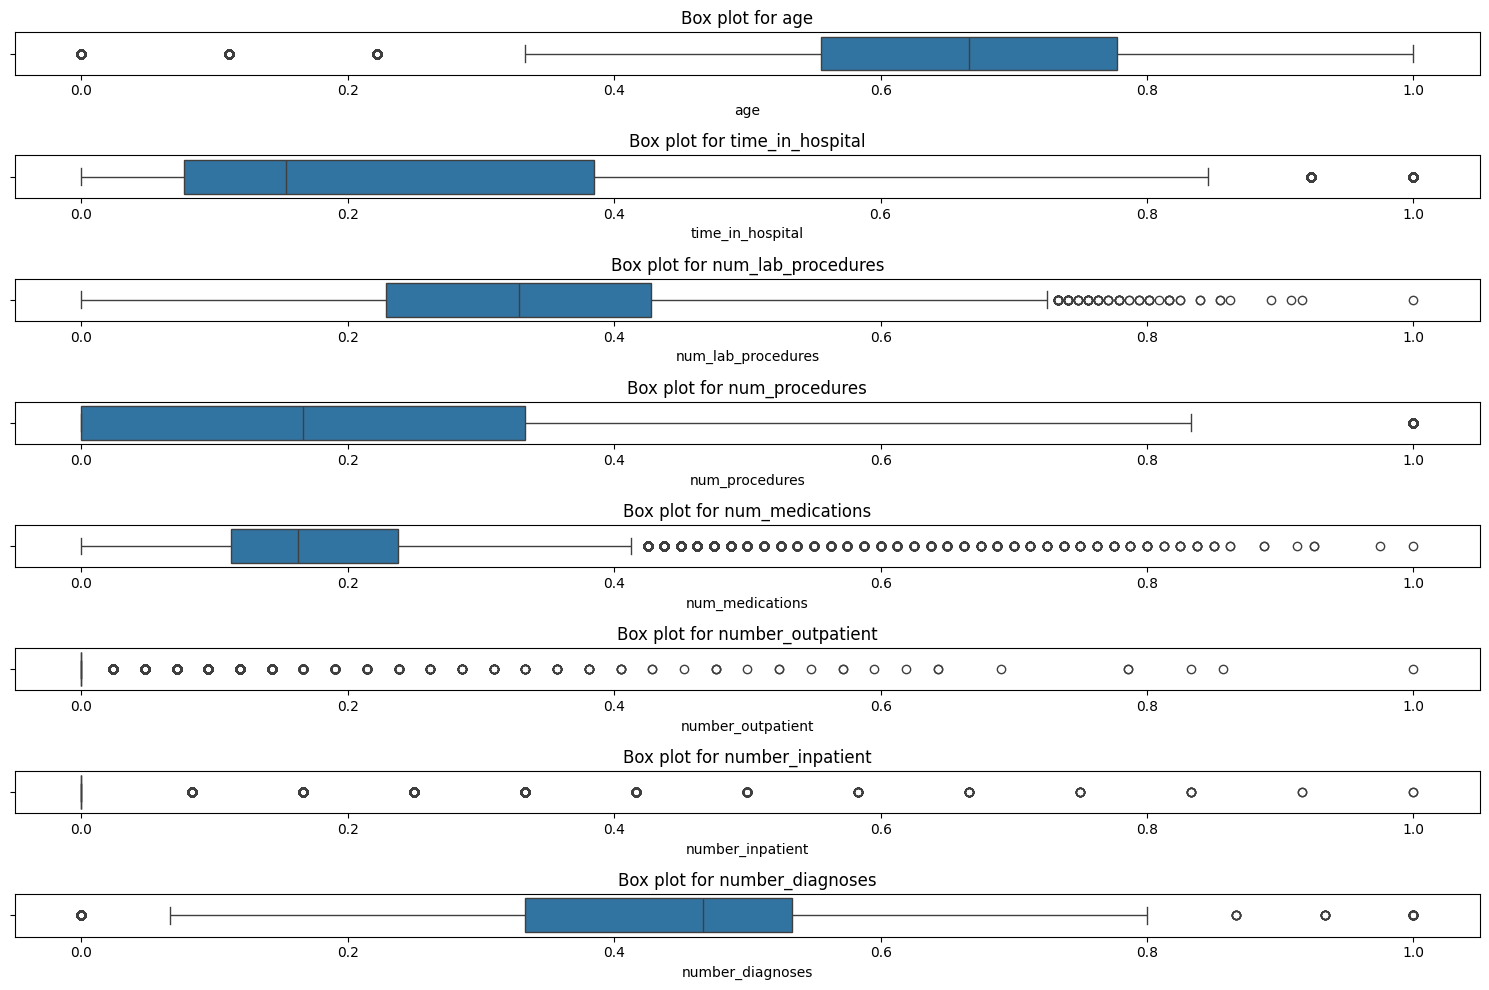

In [49]:
# Create a grid of box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()

<div style="color: blue; font-size: 12px;">
    <p>Based on the box plots for various numerical features in relation to readmission status, here are some insights:</p>
    <ul>
        <li><strong>Age:</strong> The age distribution is fairly consistent, with a slightly higher median for readmitted patients. This aligns with previous findings suggesting that older patients may be more prone to readmission.</li>
        <li><strong>Time in Hospital:</strong> Readmitted patients tend to have a higher median and a wider range of time in the hospital compared to non-readmitted patients. This could indicate that longer hospital stays are associated with more severe health issues, which may lead to readmission.</li>
        <li><strong>Number of Lab Procedures:</strong> Both readmitted and non-readmitted groups have a similar distribution, but there are more outliers in the readmitted group. This suggests that while lab procedures may not strongly differentiate the two groups, a higher number of lab procedures could signal more complex cases prone to readmission.</li>
        <li><strong>Number of Procedures:</strong> The box plot for the number of procedures shows limited variance and a lower median for both groups. The number of procedures alone might not be a significant factor in predicting readmission.</li>
        <li><strong>Number of Medications:</strong> Readmitted patients tend to be on a higher number of medications, with several outliers, indicating that patients with complex medication regimens are at higher risk for readmission.</li>
        <li><strong>Number of Outpatient Visits:</strong> Both groups have a similar distribution, but there are numerous outliers in the non-readmitted group, which may suggest that regular outpatient visits contribute to better health management and lower readmission risk.</li>
        <li><strong>Number of Inpatient Visits:</strong> Readmitted patients have a slightly higher median and a broader distribution, indicating that a history of inpatient care might increase readmission risk.</li>
        <li><strong>Number of Diagnoses:</strong> Readmitted patients have a higher median number of diagnoses, which aligns with the observation that patients with multiple health conditions are at a greater risk of returning to the hospital.</li>
    </ul>
    <h3>Summary</h3>
    <p>This box plot analysis reinforces that factors such as time in hospital, number of medications, number of inpatient visits, and number of diagnoses are potential indicators of readmission risk. Patients with complex health conditions, reflected in these features, may benefit from targeted discharge planning and follow-up care to reduce their likelihood of being readmitted.</p>
</div>


In [50]:
# Identify outliers using IQR and calculate the percentage of outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    print(f'Percentage of outliers in {col}: {percentage_outliers:.2f}%')

Percentage of outliers in age: 2.58%
Percentage of outliers in time_in_hospital: 2.00%
Percentage of outliers in num_lab_procedures: 0.14%
Percentage of outliers in num_procedures: 5.49%
Percentage of outliers in num_medications: 3.03%
Percentage of outliers in number_outpatient: 13.03%
Percentage of outliers in number_inpatient: 11.71%
Percentage of outliers in number_diagnoses: 0.34%


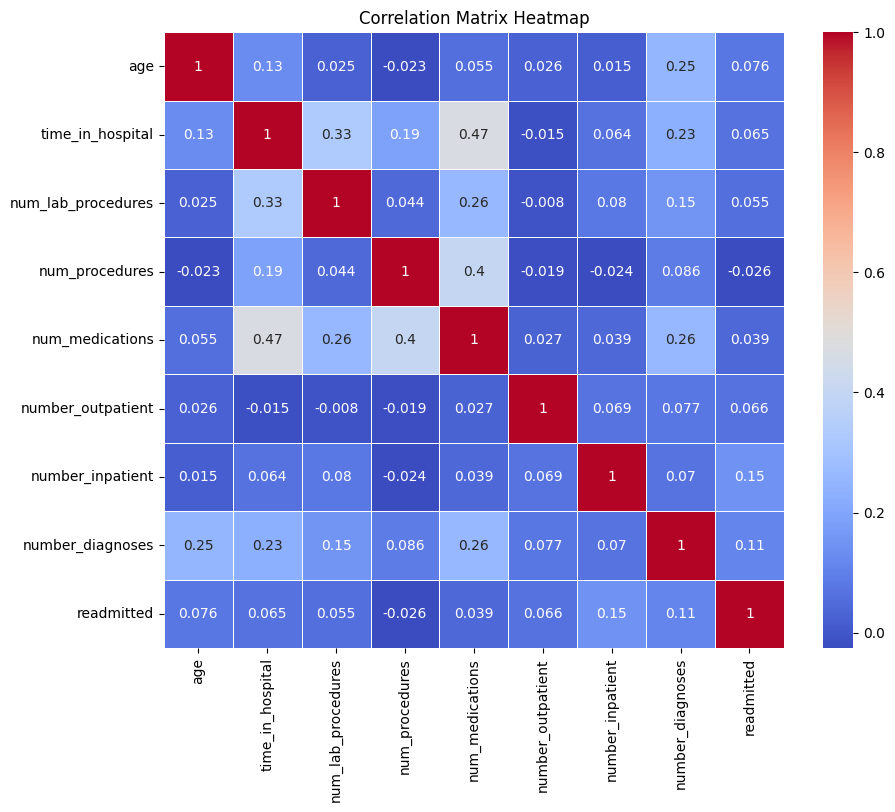

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and numerical_cols is a list of numerical column names

# Select the numerical columns and the 'readmitted' column
selected_columns = numerical_cols + ['readmitted']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<div style="color: blue; font-size: 12px;">
    <p>Based on the correlation matrix heatmap, here are the key insights and features that show a relationship with readmission:</p>
    <ul>
        <li><strong>Number of Medications:</strong> Shows a moderate positive correlation with readmission (<code>0.19</code>), indicating that patients on a higher number of medications have a slightly higher likelihood of being readmitted. This suggests that complex medication regimens may be associated with increased readmission risk.</li>
        <li><strong>Time in Hospital:</strong> Has a weak positive correlation with readmission (<code>0.065</code>). Although not a strong indicator on its own, it still shows that patients with longer hospital stays might have a marginally higher chance of readmission.</li>
        <li><strong>Number of Inpatient Visits:</strong> Shows a positive correlation with readmission (<code>0.067</code>). This suggests that patients with a history of previous inpatient visits may have a higher risk of returning to the hospital, potentially due to unresolved or chronic health issues.</li>
        <li><strong>Number of Diagnoses:</strong> Shows a weak positive correlation with readmission (<code>0.11</code>). Patients with multiple diagnoses are likely to have more complex health conditions, making them more prone to readmission.</li>
        <li><strong>Age:</strong> Has a low correlation with readmission (<code>0.076</code>). Although age itself is not a strong predictor, older patients may still exhibit a pattern of slightly higher readmission risk, likely due to age-related health complexities.</li>
        <li><strong>Number of Lab Procedures:</strong> Has a weak positive correlation with readmission (<code>0.055</code>). Although not a major factor, a higher number of lab procedures might indicate more severe or complex conditions, which could contribute to readmission.</li>
    </ul>
    <h3>Summary</h3>
    <p>The features that exhibit the most noticeable correlation with readmission, in order of importance, are:</p>
    <ul>
        <li><strong>Number of Medications</strong></li>
        <li><strong>Number of Diagnoses</strong></li>
        <li><strong>Number of Inpatient Visits</strong></li>
        <li><strong>Time in Hospital</strong></li>
        <li><strong>Age</strong></li>
    </ul>
    <p>These features, while showing weak to moderate correlations, are the most relevant indicators of readmission risk. Patients with complex medication regimens, multiple diagnoses, a history of inpatient visits, or extended hospital stays may benefit from targeted follow-up care to reduce their likelihood of readmission.</p>
</div>


### Categorical Column Analysis ###

In [52]:
# Get list of all columns in df
all_columns = df.columns.tolist()

# Get list of columns that are not in numerical_cols
categorical_cols = [col for col in all_columns if col not in numerical_cols]

print(categorical_cols)

['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'readmitted']


In [53]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer with OneHotEncoder for categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply the transformer to the DataFrame
df_transformed = column_transformer.fit_transform(df)

# Convert the result back to a DataFrame
# Get the new column names after one-hot encoding
new_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(new_columns) + [col for col in df.columns if col not in categorical_cols]

df_transformed = pd.DataFrame(df_transformed, columns=all_columns)

df_transformed

race_Asian  race_Caucasian  race_Hispanic  race_Other  race_nan  \
0             0.0             1.0            0.0         0.0       0.0   
1             0.0             1.0            0.0         0.0       0.0   
2             0.0             0.0            0.0         0.0       0.0   
3             0.0             1.0            0.0         0.0       0.0   
4             0.0             1.0            0.0         0.0       0.0   
...           ...             ...            ...         ...       ...   
69982         0.0             1.0            0.0         0.0       0.0   
69983         0.0             0.0            0.0         1.0       0.0   
69984         0.0             0.0            0.0         1.0       0.0   
69985         0.0             1.0            0.0         0.0       0.0   
69986         0.0             1.0            0.0         0.0       0.0   

       gender_Male  diag_1_Diabetes  diag_1_Digestive  diag_1_Genitourinary  \
0              0.0              0.0               0.0                   0.0   
1              0.0              0.0               0.0                   0.0   
2              0.0              0.0               0.0                   0.0   
3              1.0              0.0               0.0                   0.0   
4              1.0              0.0               0.0                   0.0   
...            ...              ...               ...                   ...   
69982          0.0              0.0               1.0                   0.0   
69983          0.0              0.0               0.0                   1.0   
69984          0.0              0.0               0.0                   0.0   
69985          0.0              0.0               0.0                   0.0   
69986          1.0              0.0               1.0                   0.0   

       diag_1_Injury  ...  admission_source_id  time_in_hospital  \
0                0.0  ...                  1.0          0.000000   
1                0.0  ...                  7.0          0.153846   
2                0.0  ...                  7.0          0.076923   
3                0.0  ...                  7.0          0.076923   
4                0.0  ...                  7.0          0.000000   
...              ...  ...                  ...               ...   
69982            0.0  ...                  7.0          0.615385   
69983            0.0  ...                  7.0          1.000000   
69984            1.0  ...                  7.0          0.076923   
69985            0.0  ...                  7.0          0.307692   
69986            0.0  ...                  7.0          0.384615   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                0.305344        0.000000           0.0000           0.000000   
1                0.442748        0.000000           0.2125           0.000000   
2                0.076336        0.833333           0.1500           0.047619   
3                0.328244        0.166667           0.1875           0.000000   
4                0.381679        0.000000           0.0875           0.000000   
...                   ...             ...              ...                ...   
69982            0.374046        0.333333           0.4000           0.000000   
69983            0.549618        1.000000           0.3125           0.000000   
69984            0.343511        1.000000           0.2000           0.023810   
69985            0.572519        0.166667           0.2625           0.000000   
69986            0.091603        0.500000           0.0250           0.000000   

       number_emergency  number_inpatient  number_diagnoses  readmitted  
0                   0.0          0.000000          0.000000         0.0  
1                   0.0          0.000000          0.533333         1.0  
2                   0.0          0.083333          0.333333         0.0  
3                   0.0          0.000000          0.400000         0.0  
4        

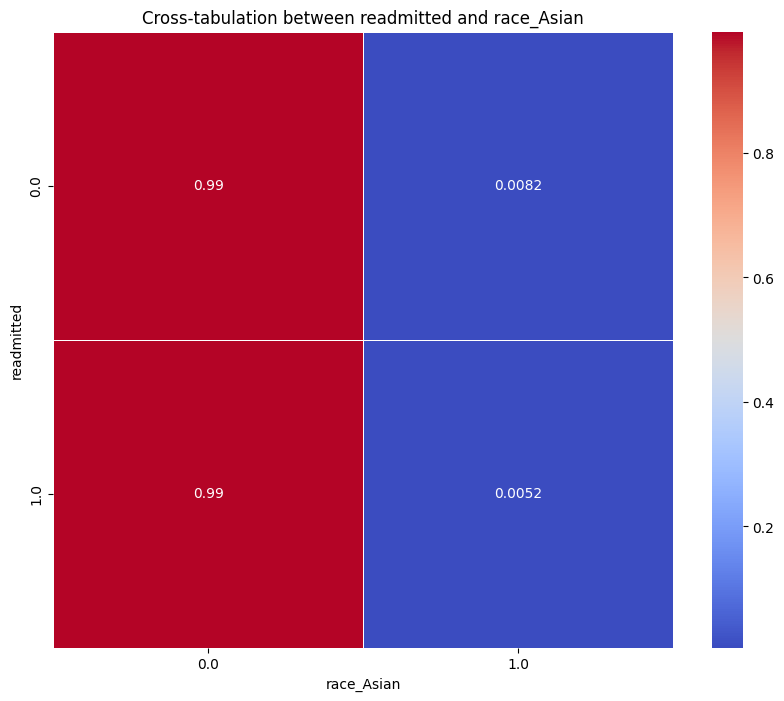

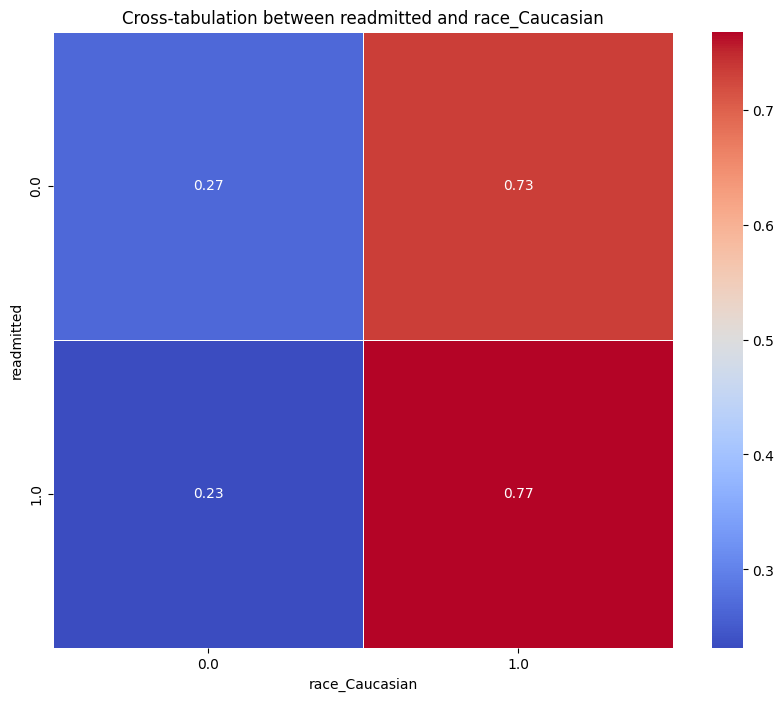

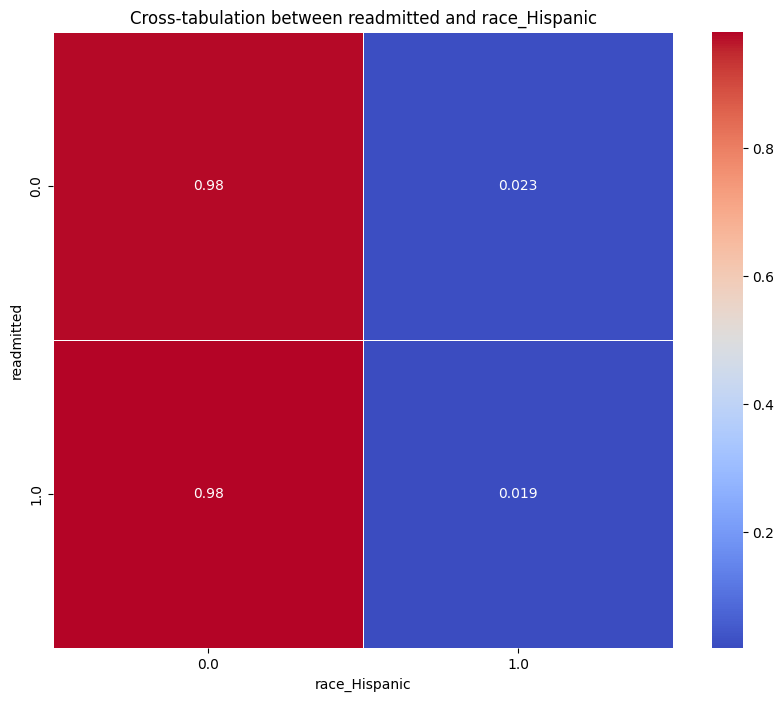

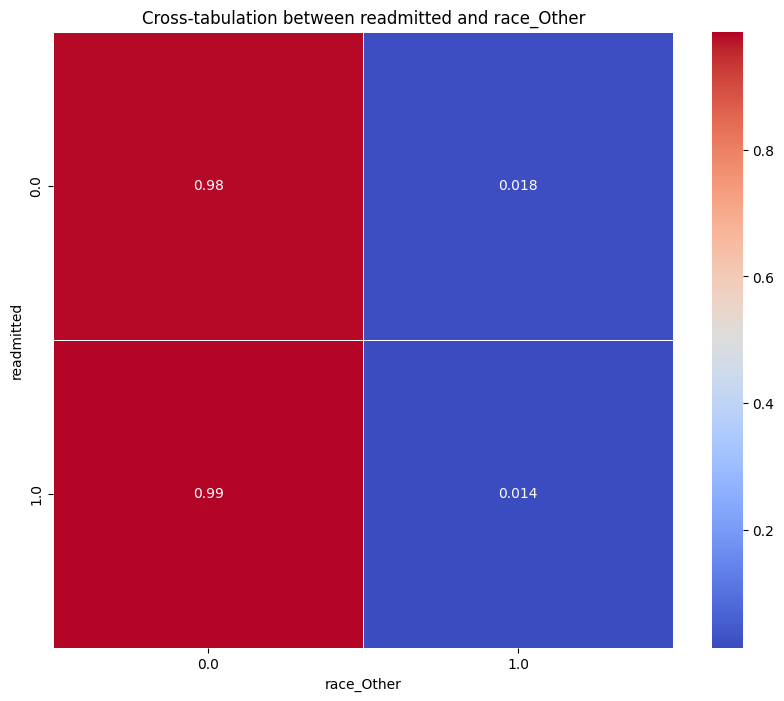

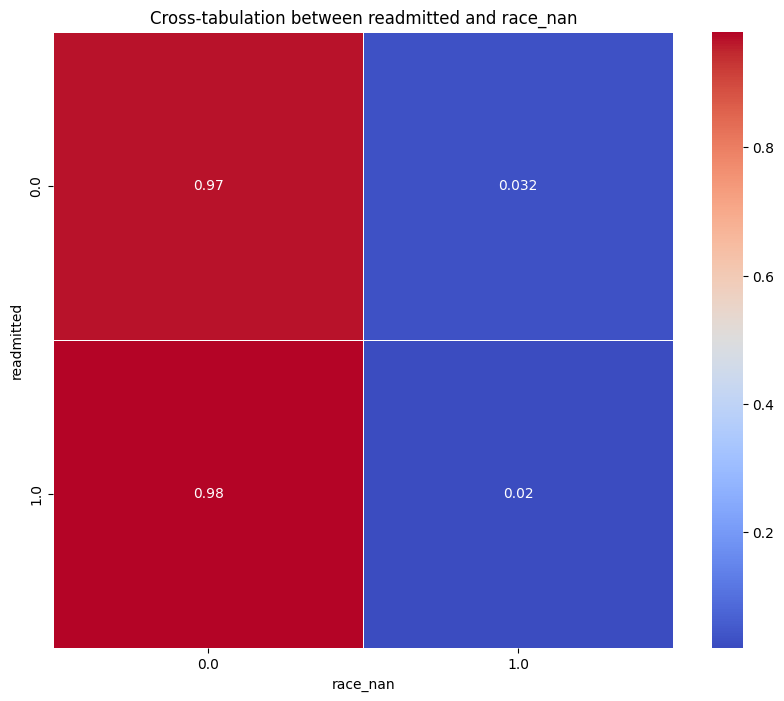

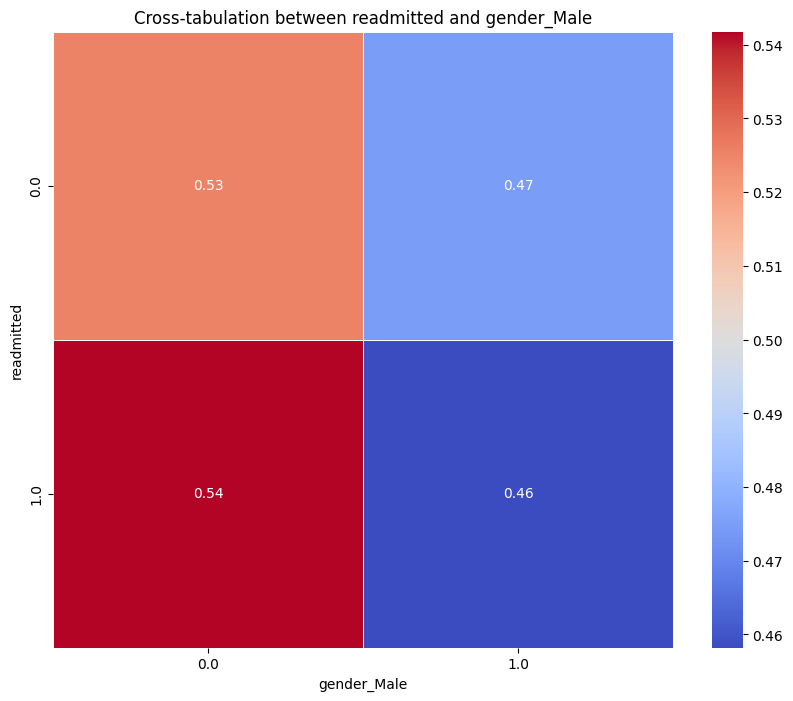

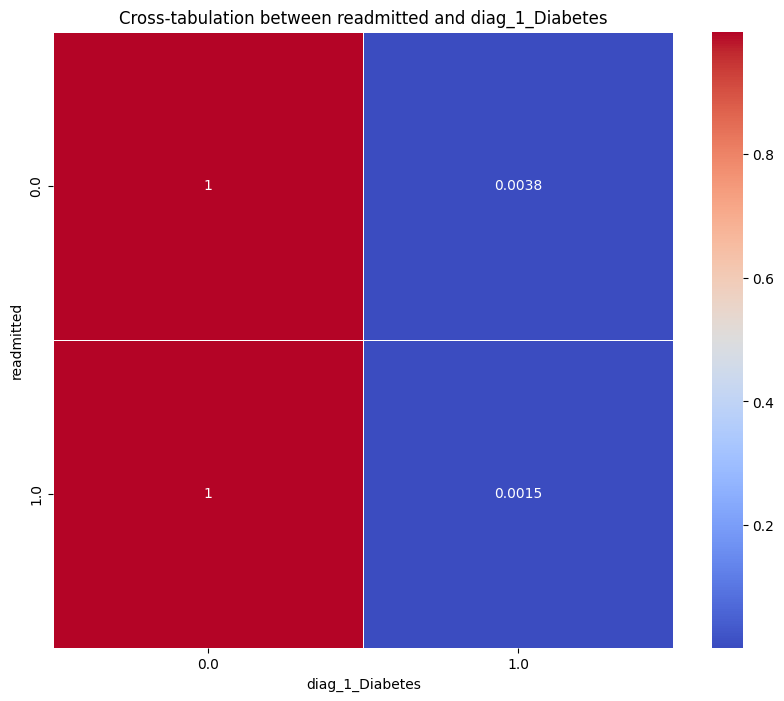

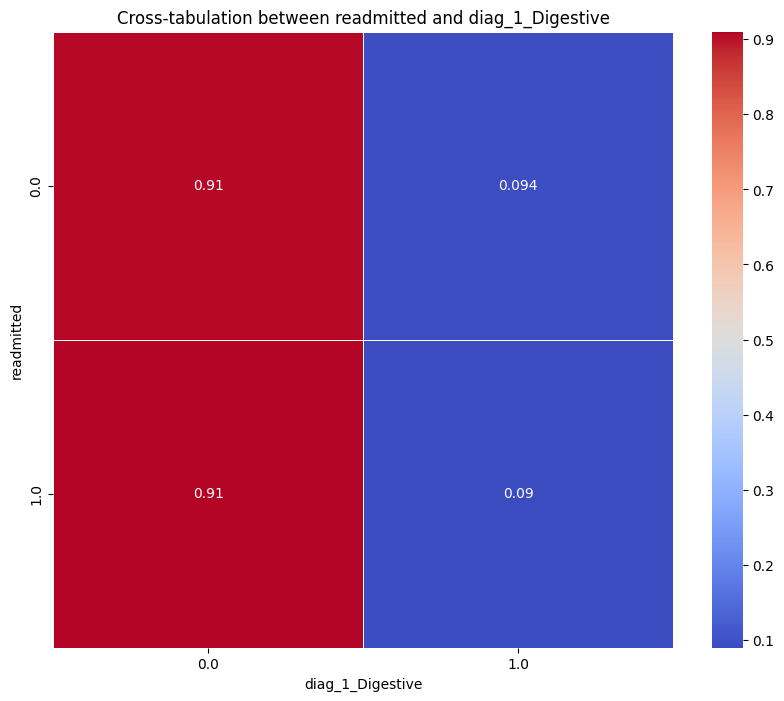

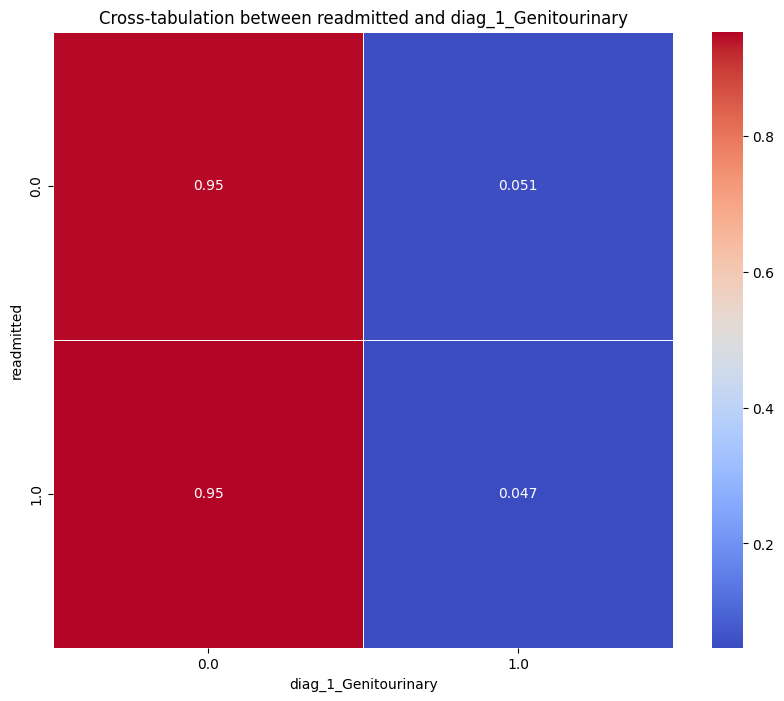

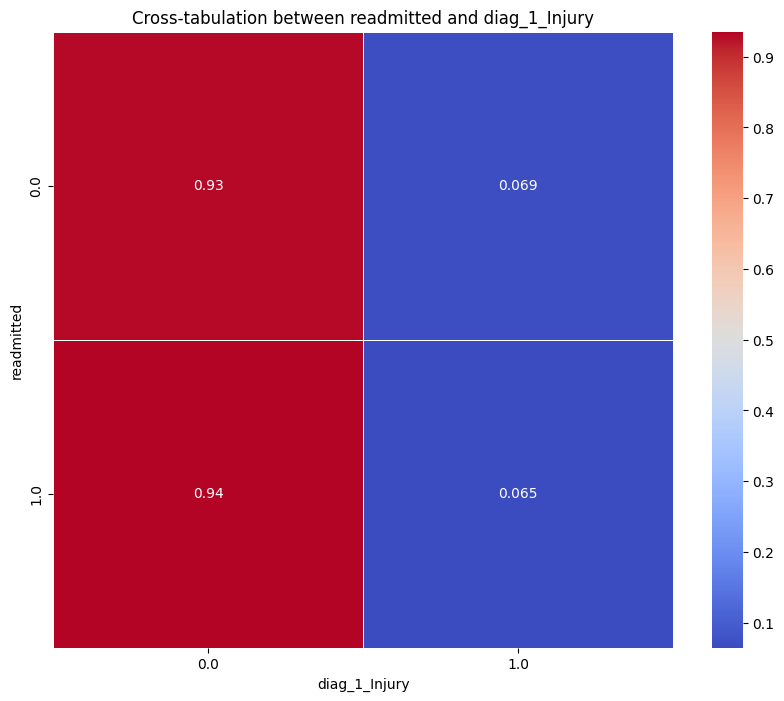

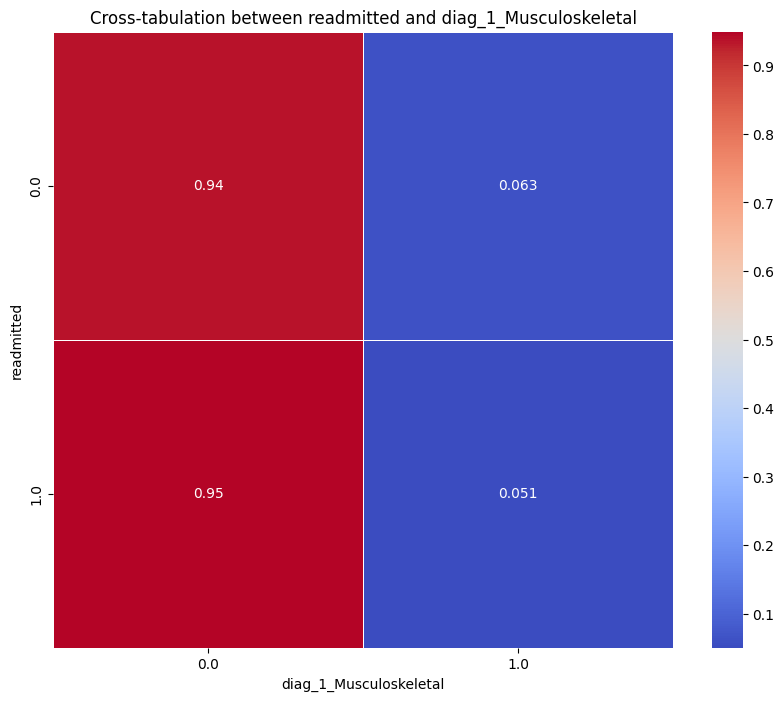

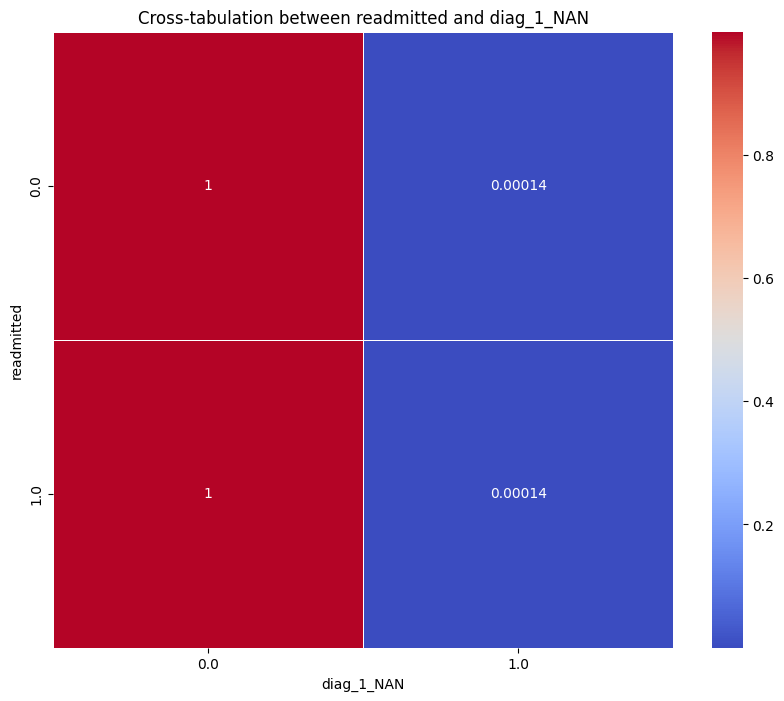

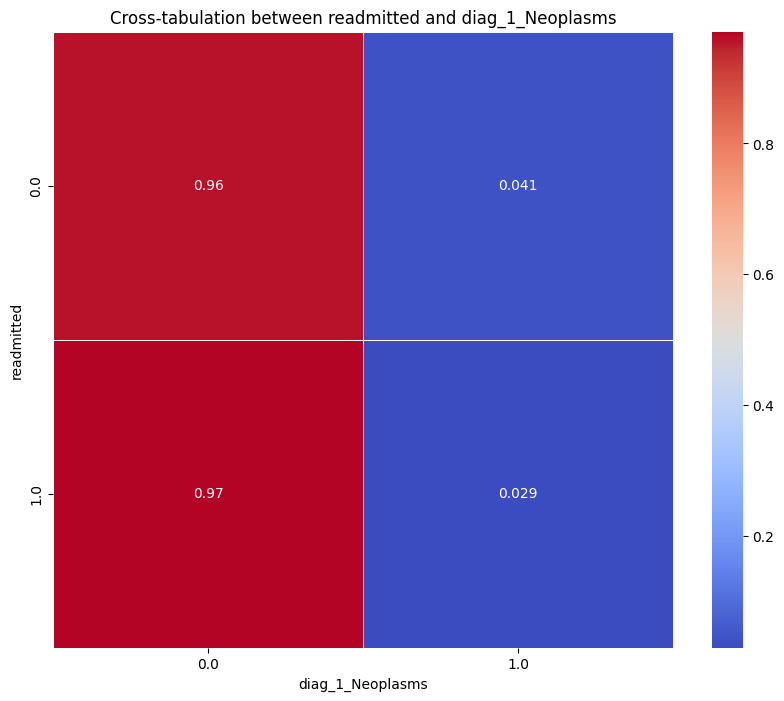

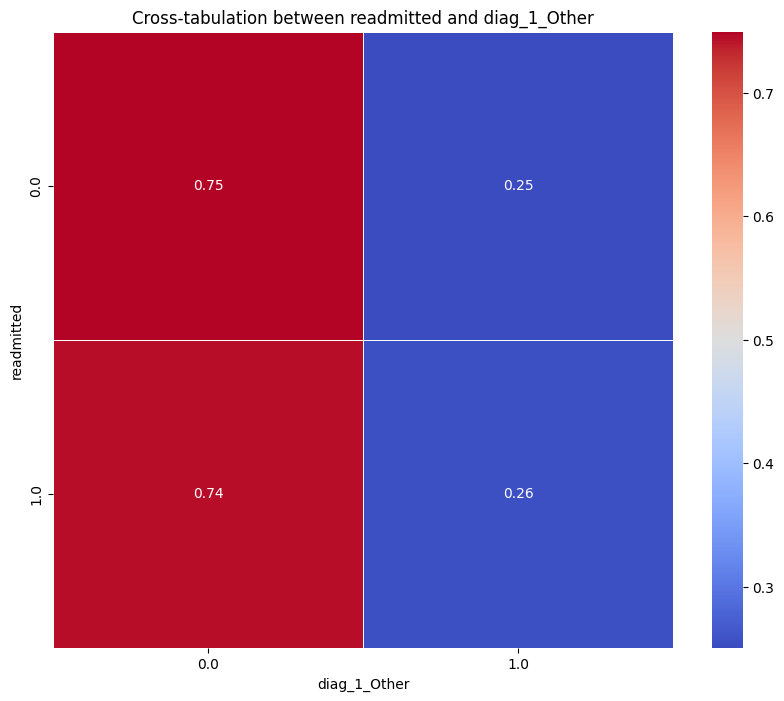

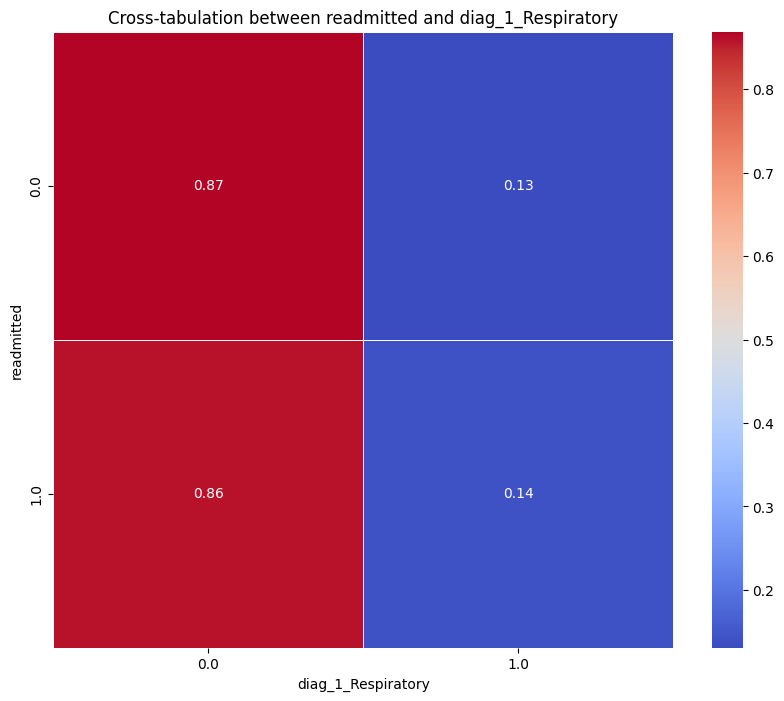

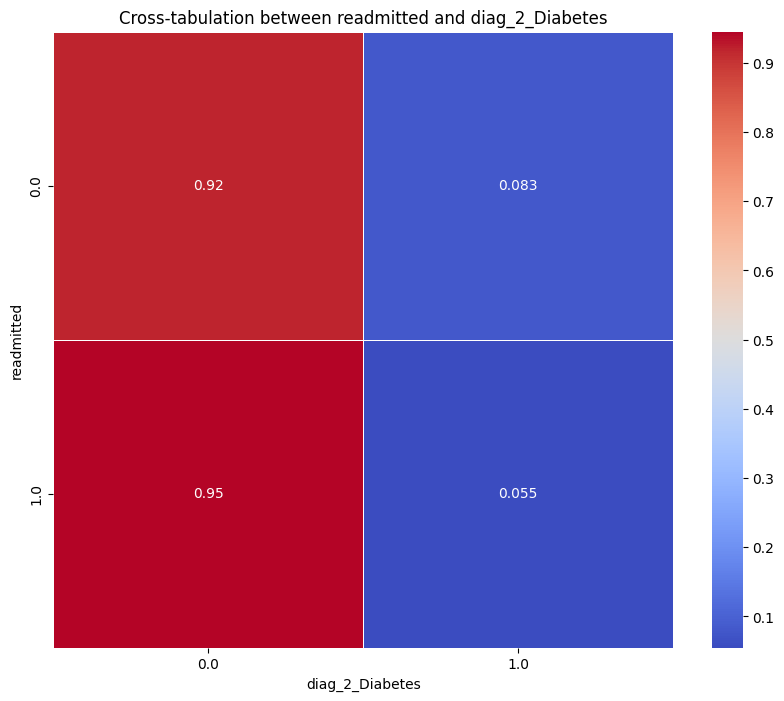

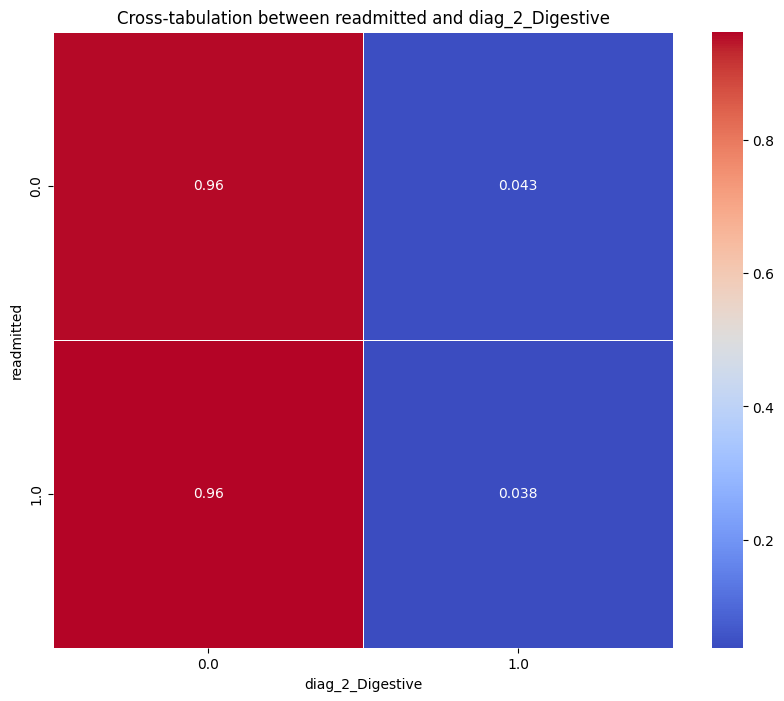

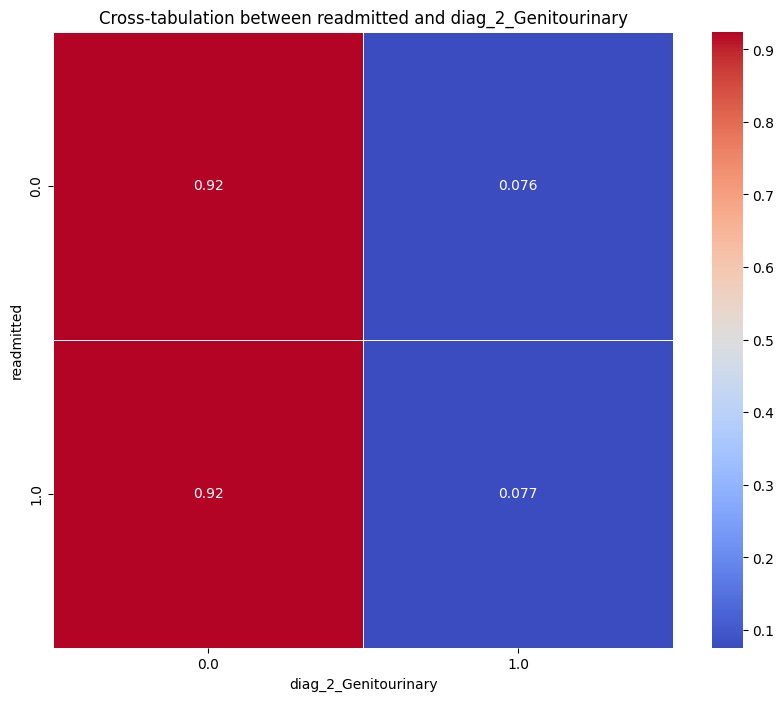

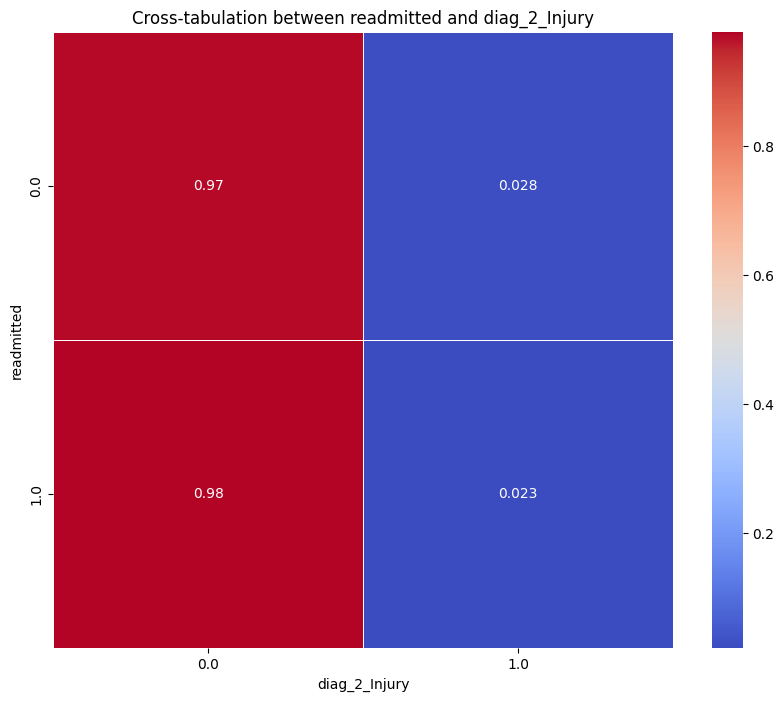

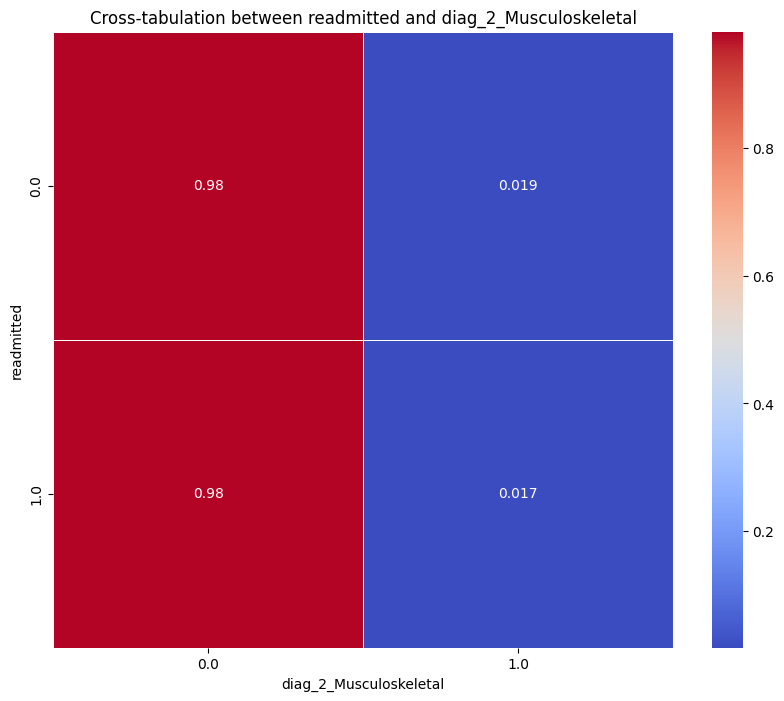

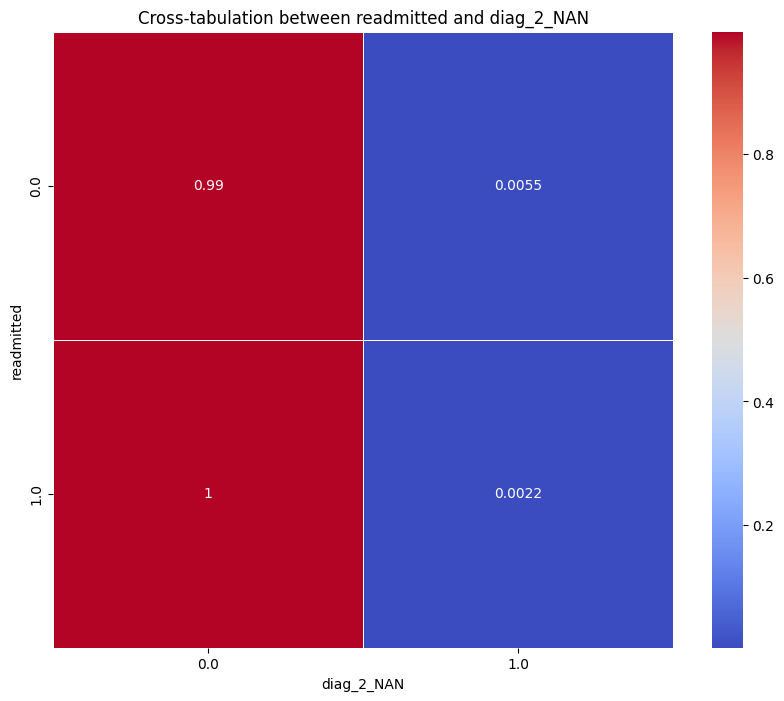

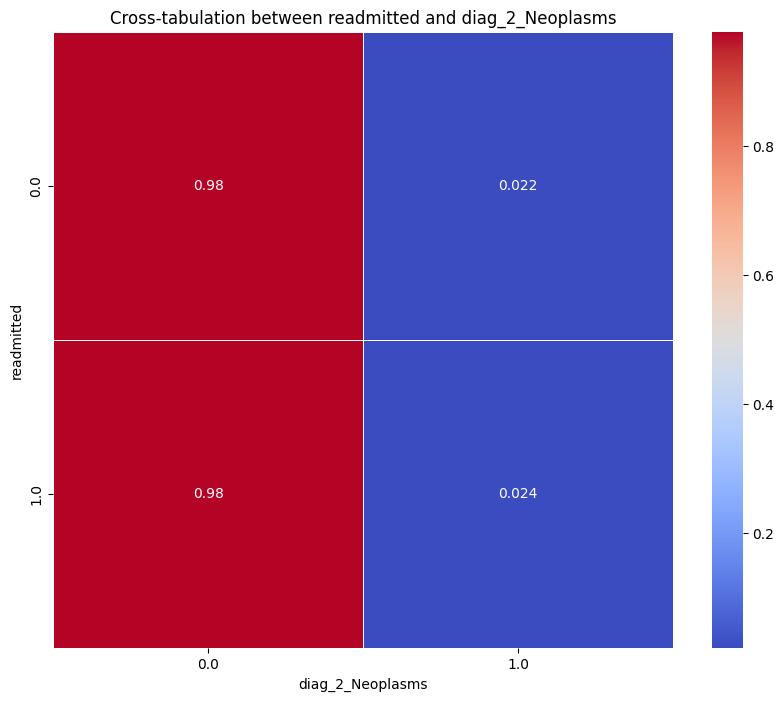

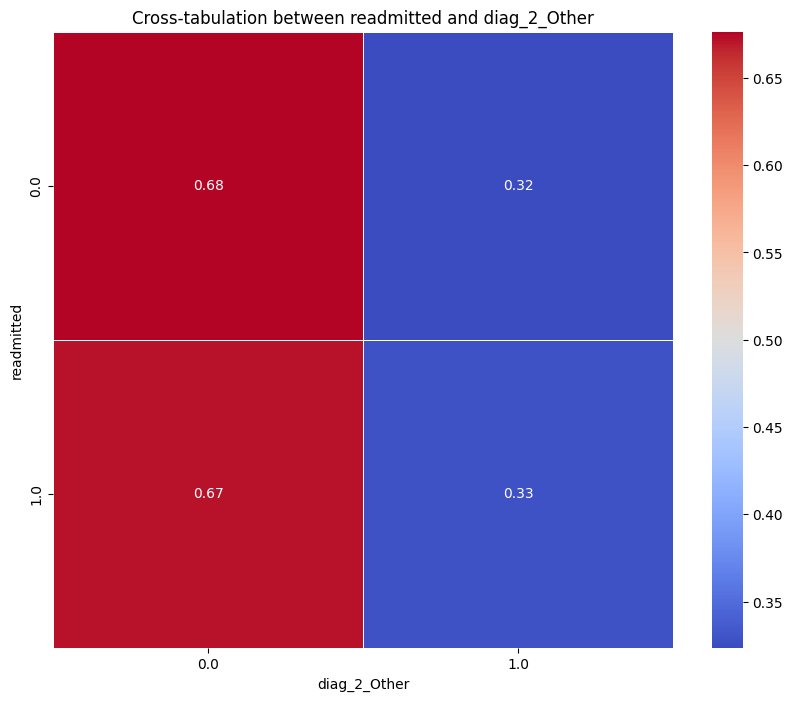

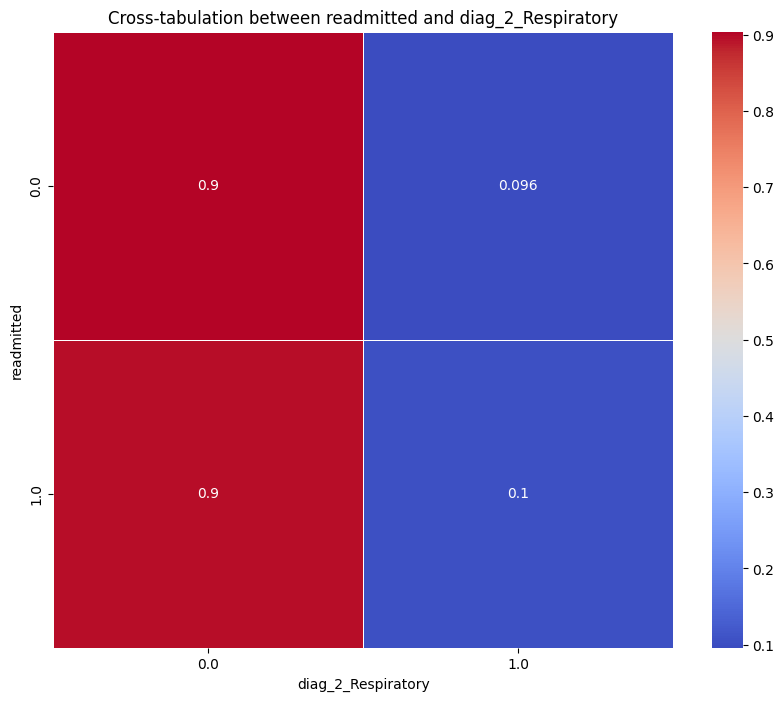

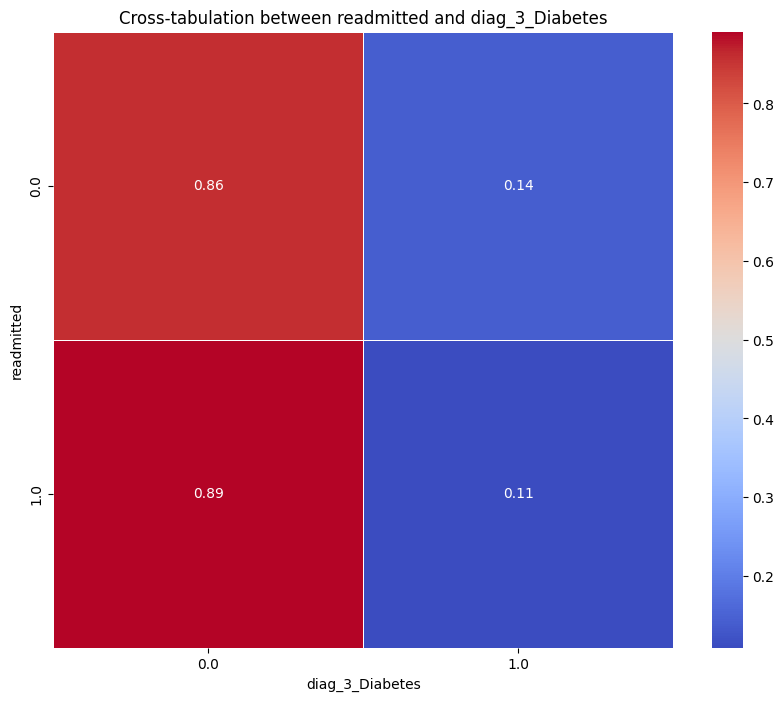

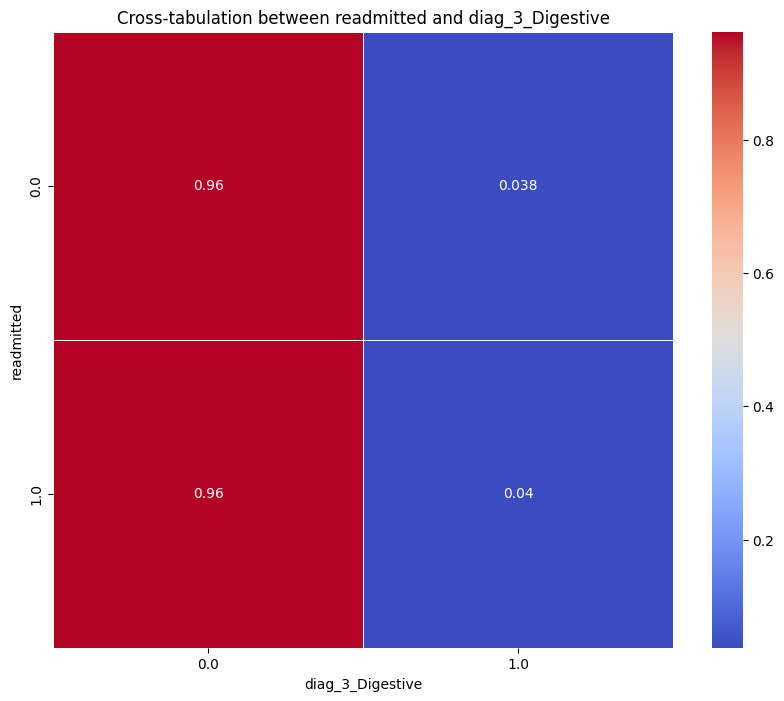

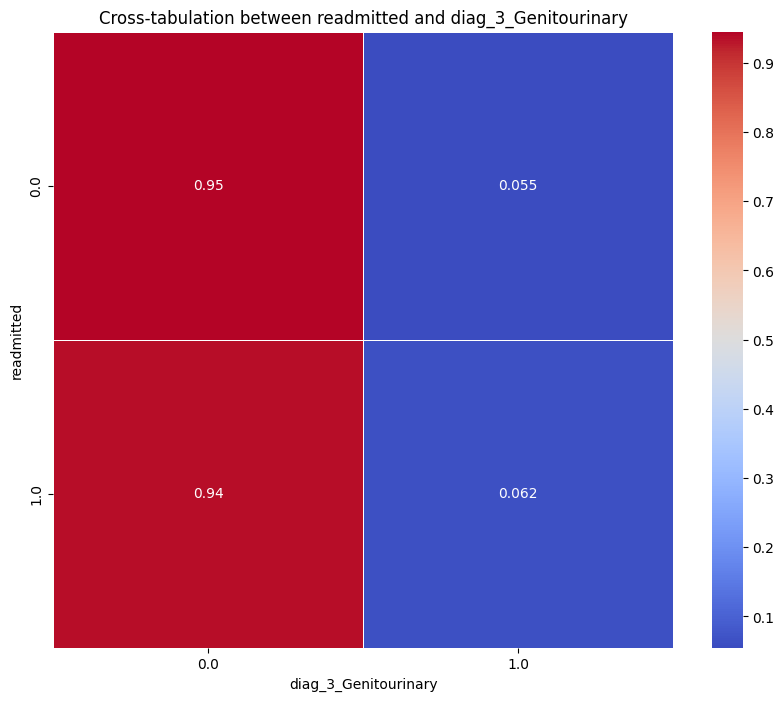

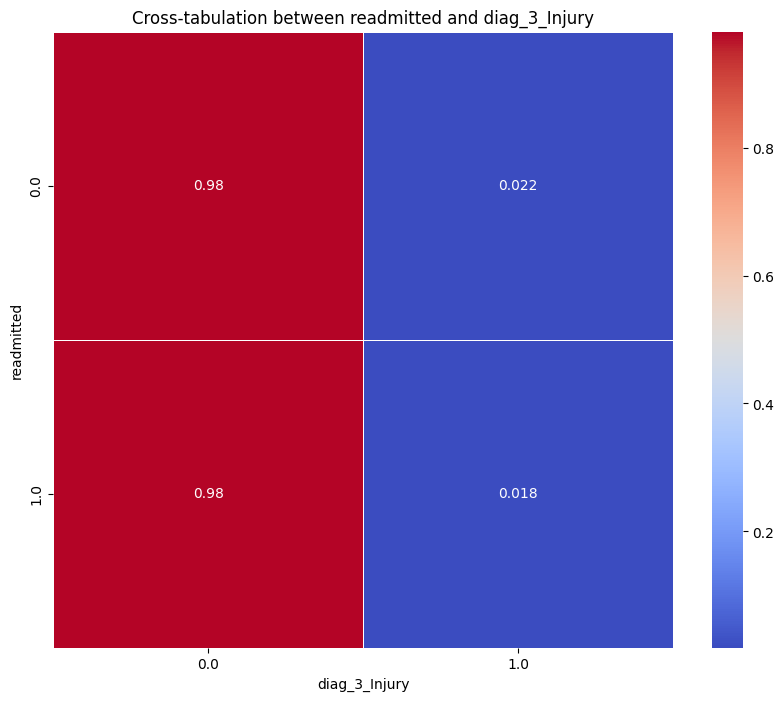

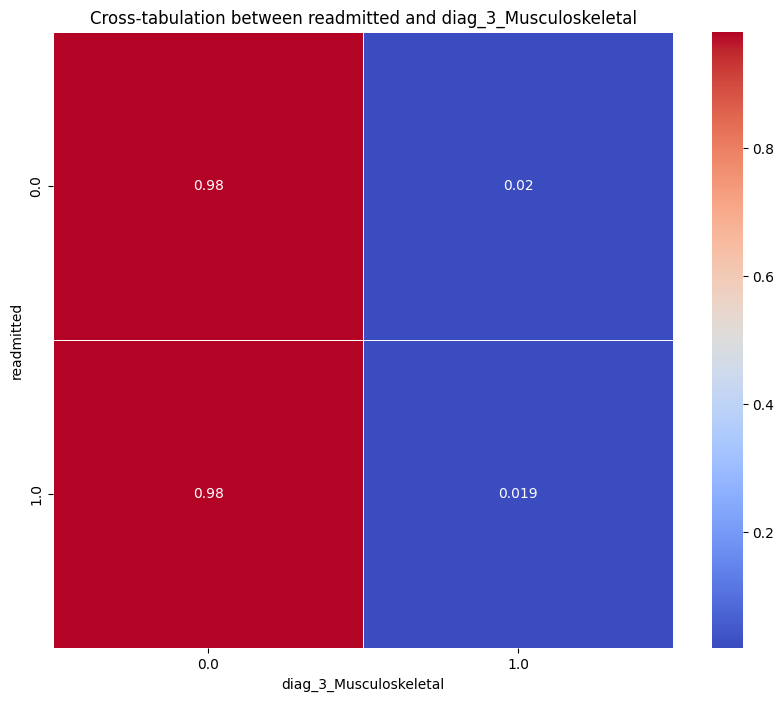

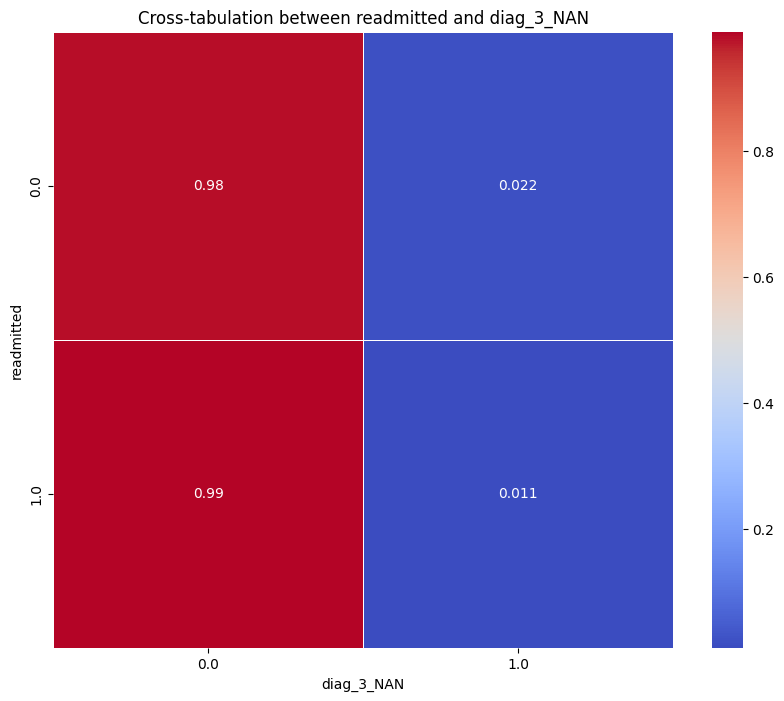

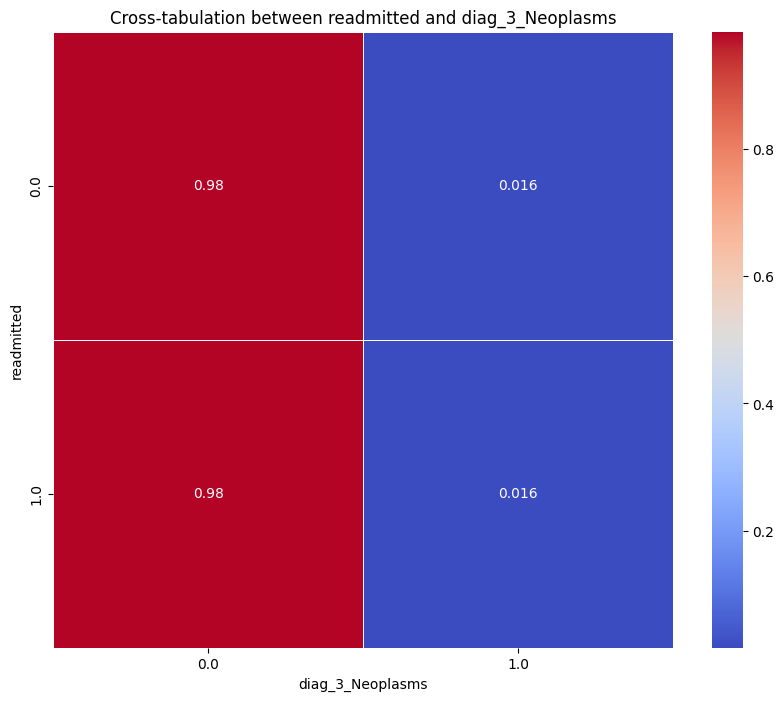

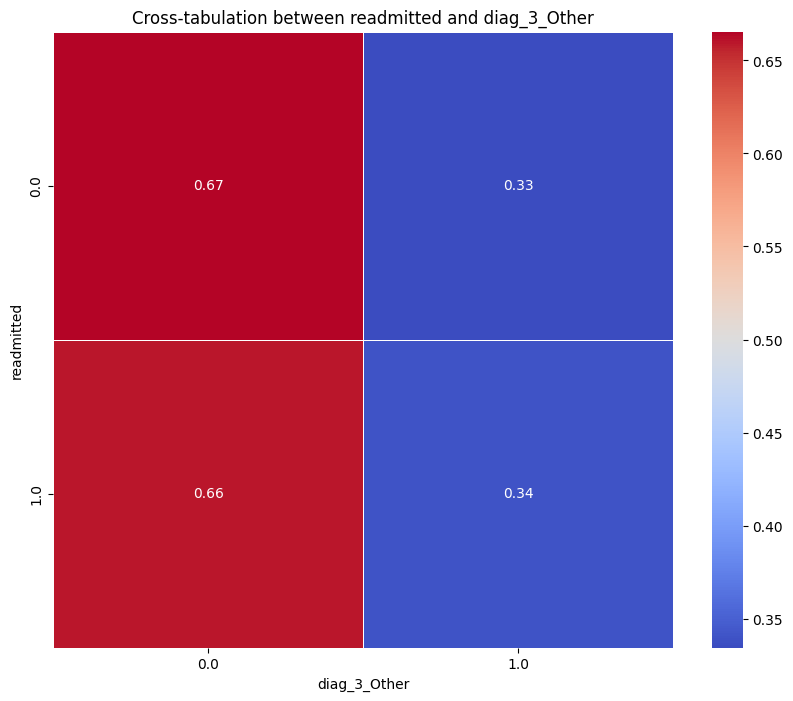

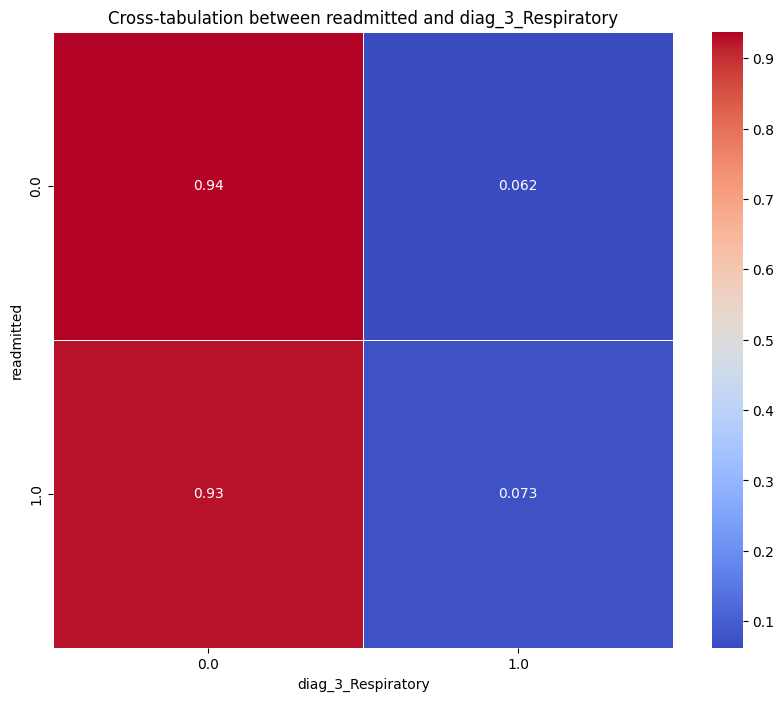

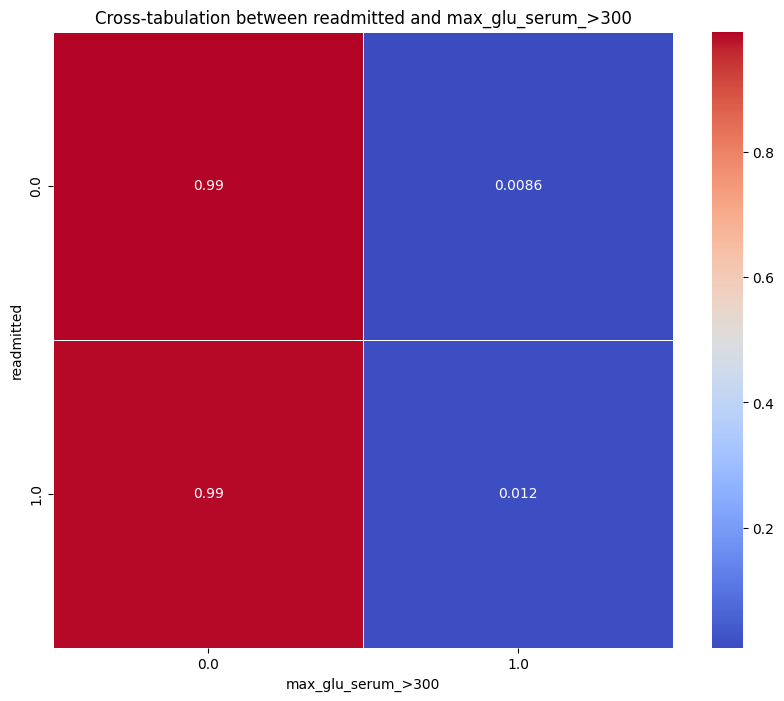

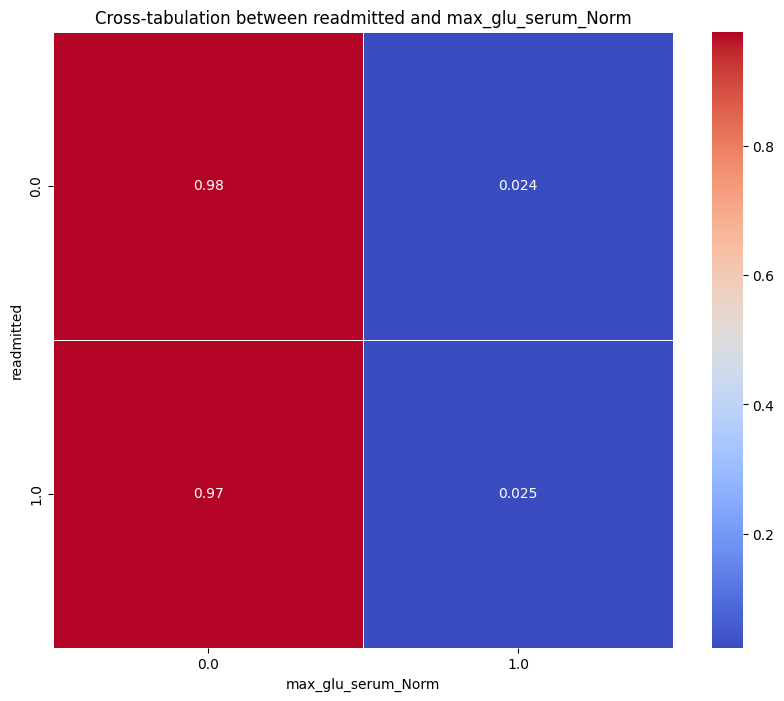

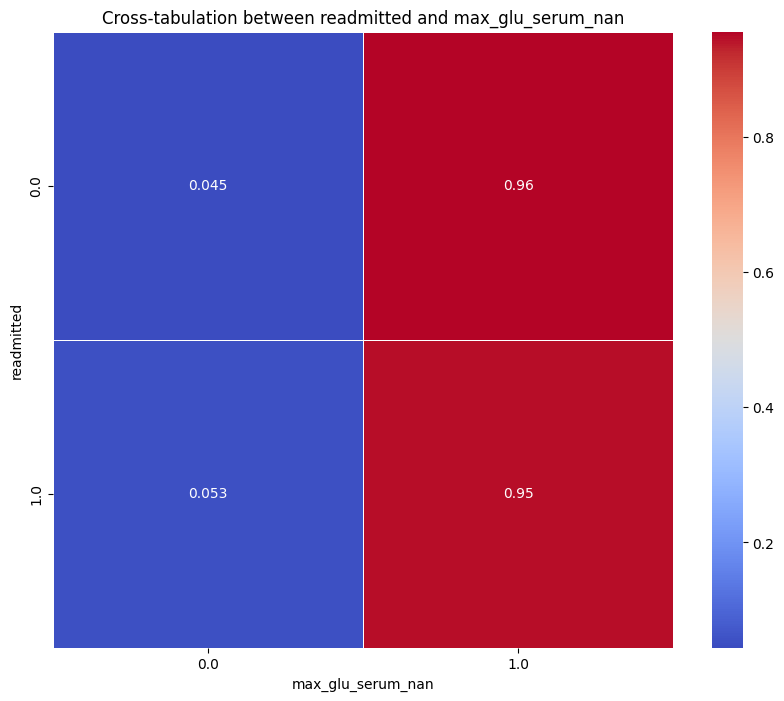

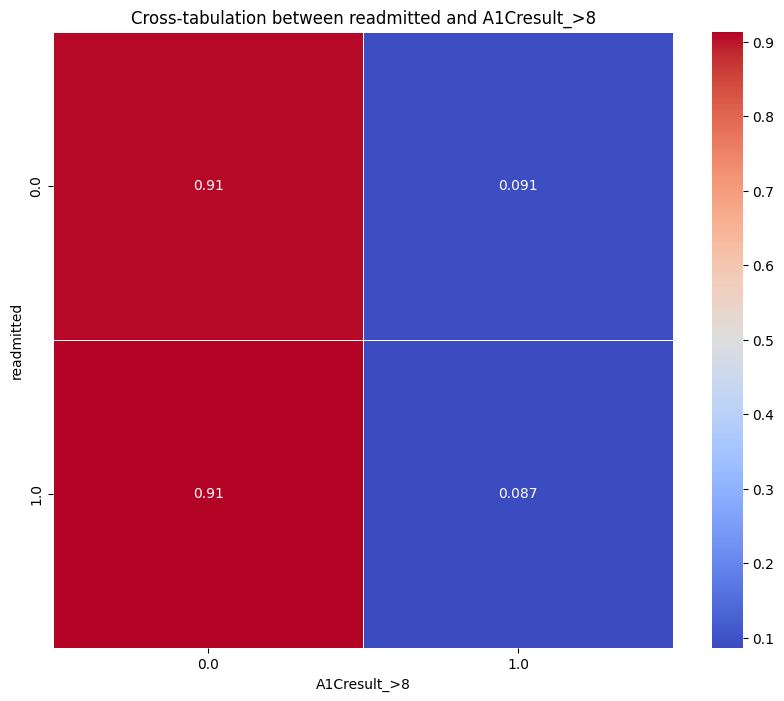

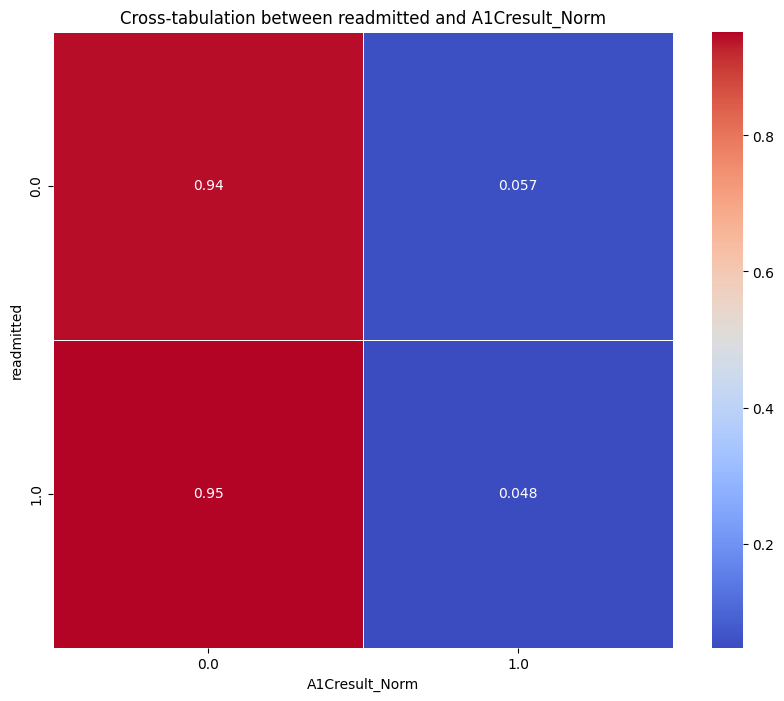

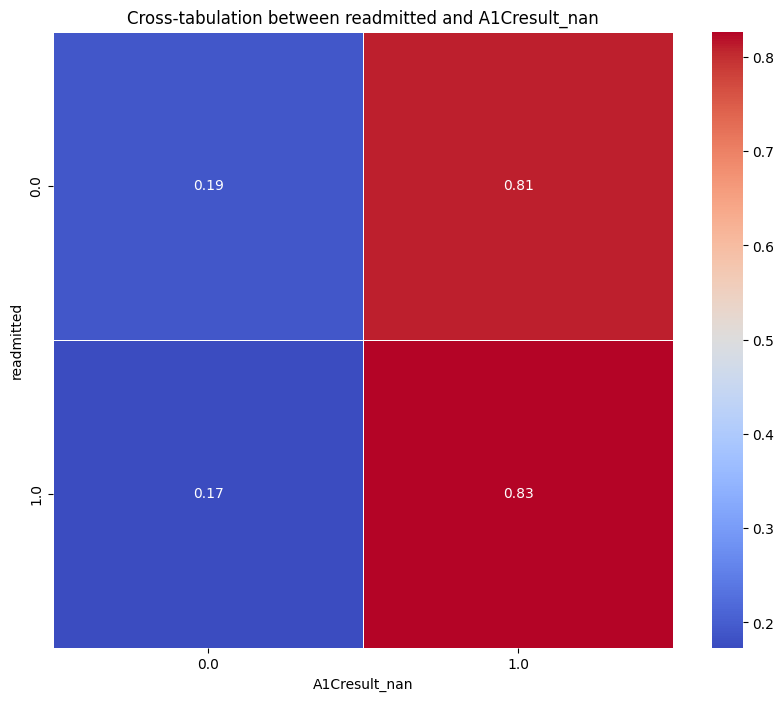

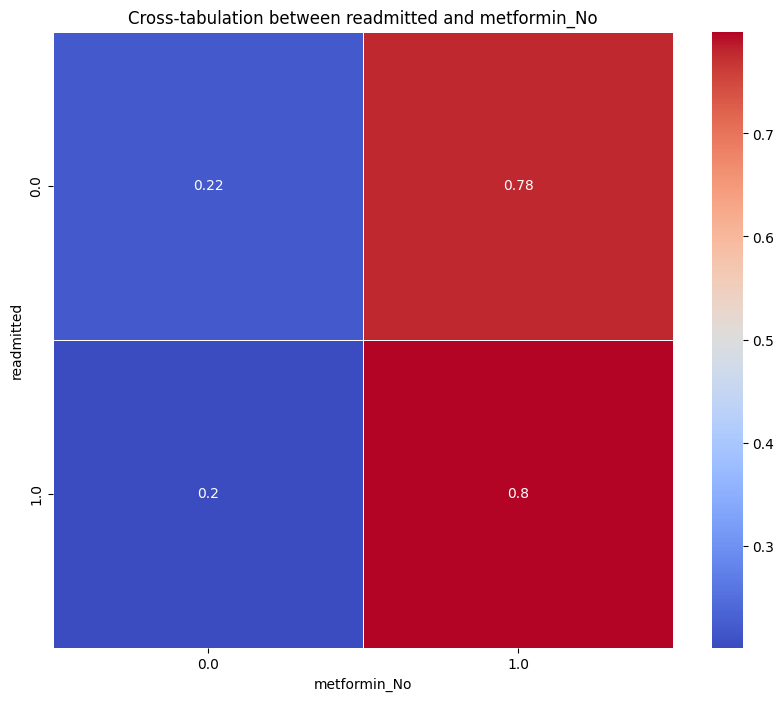

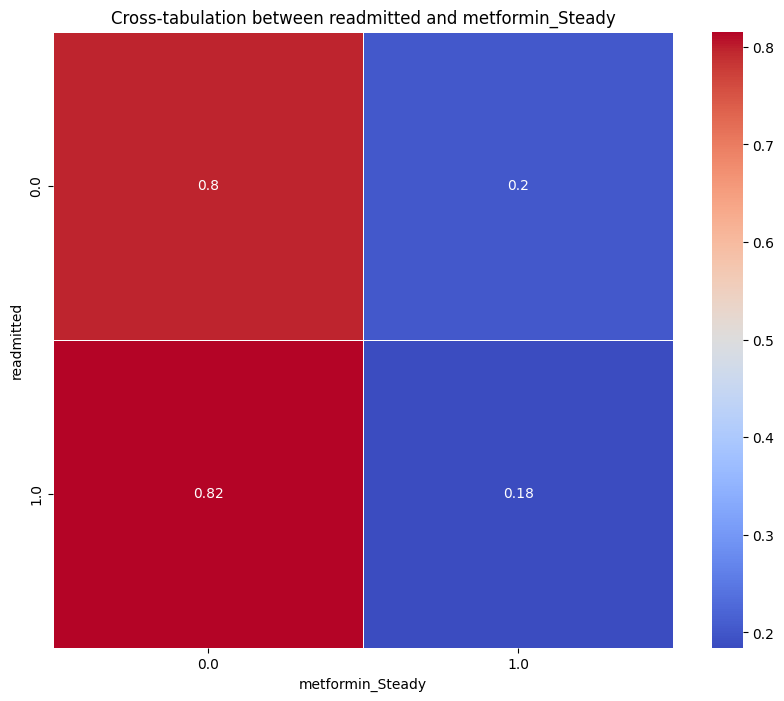

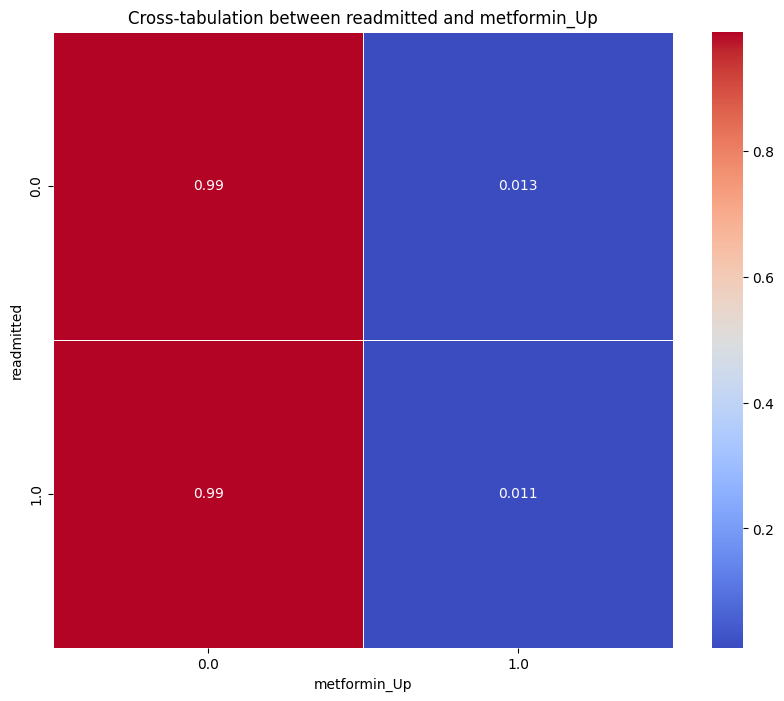

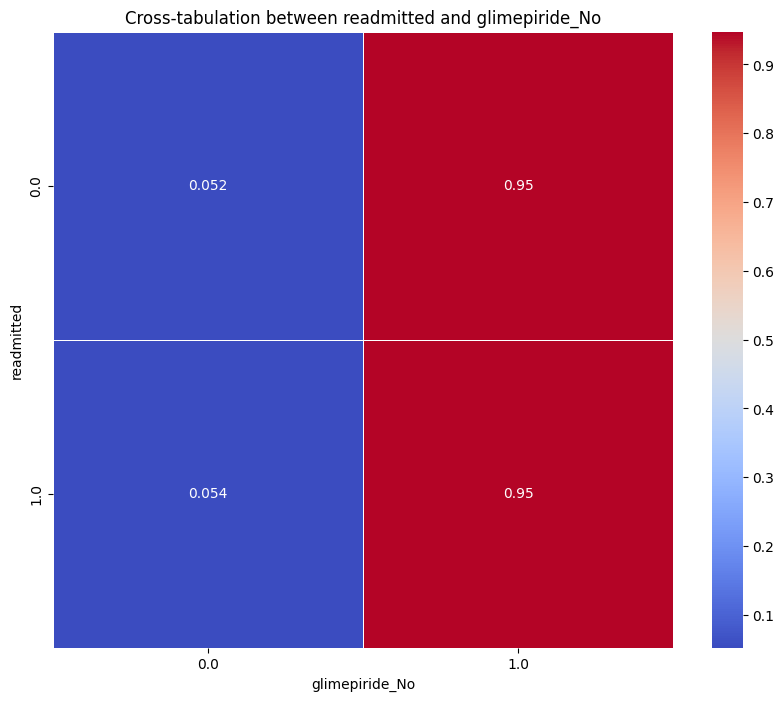

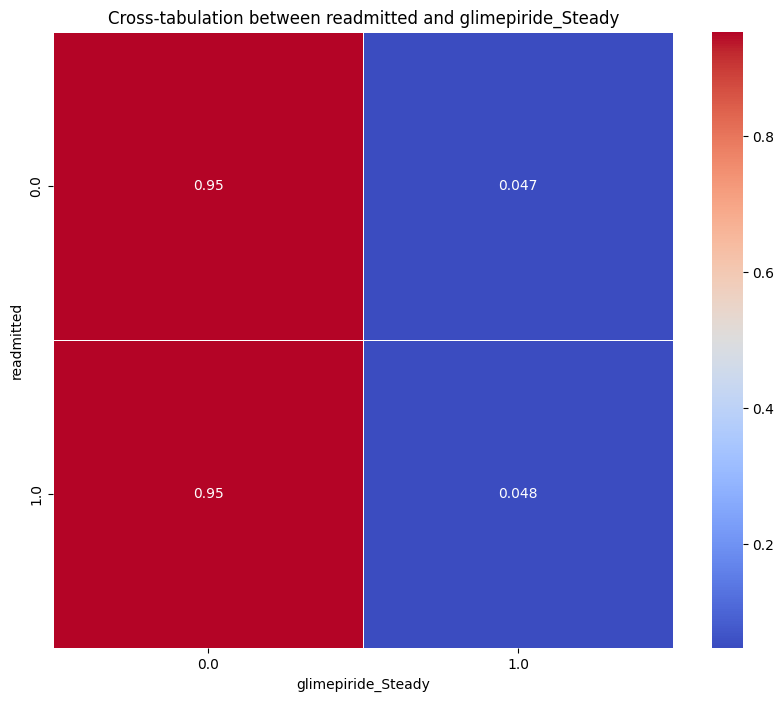

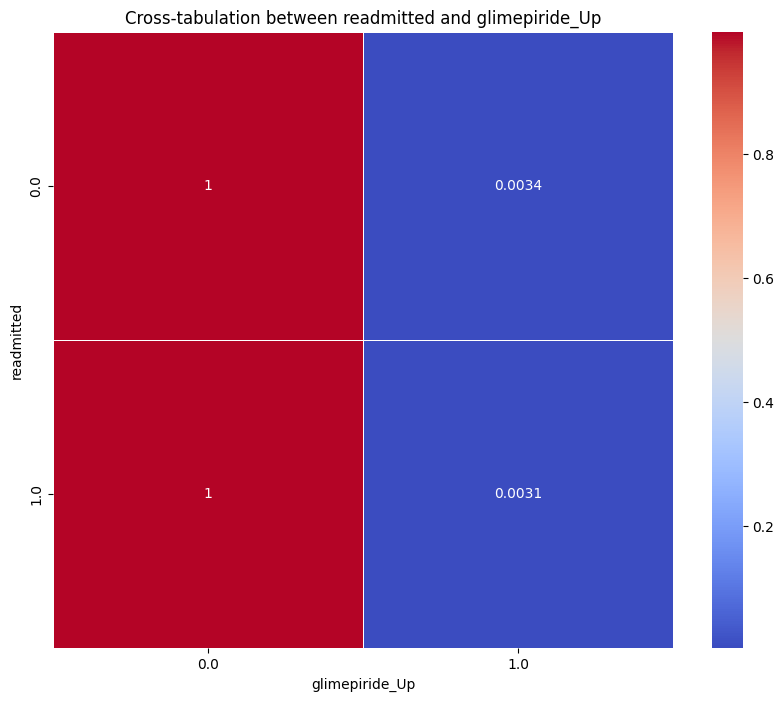

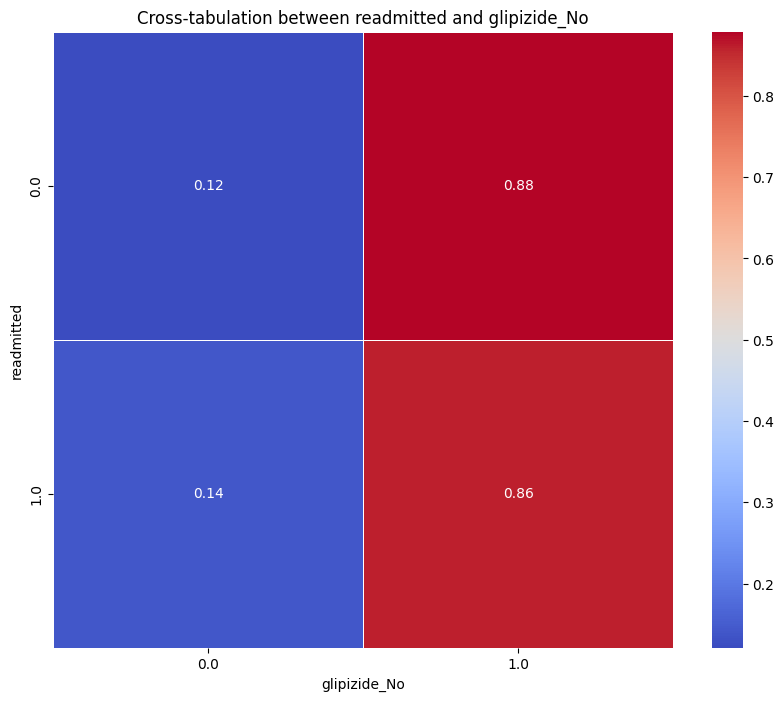

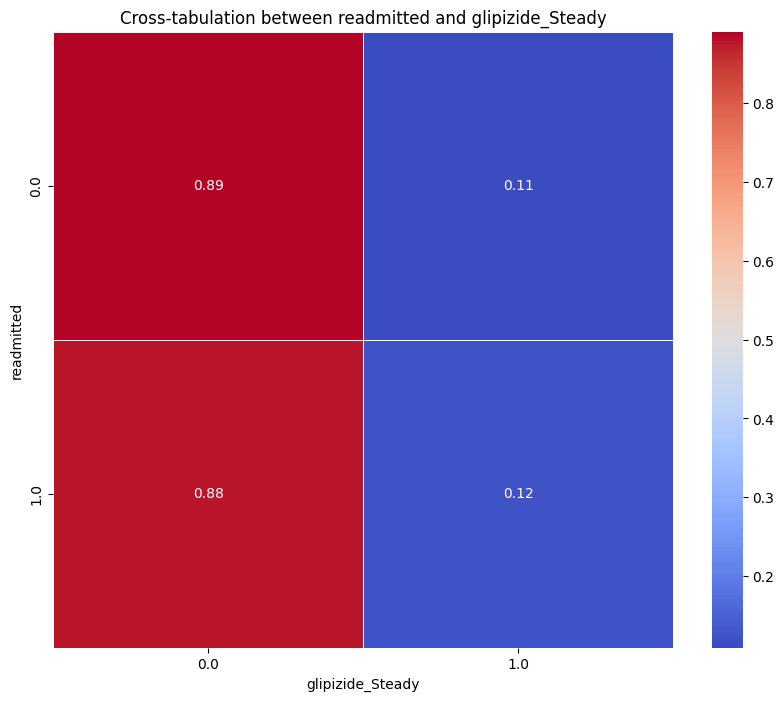

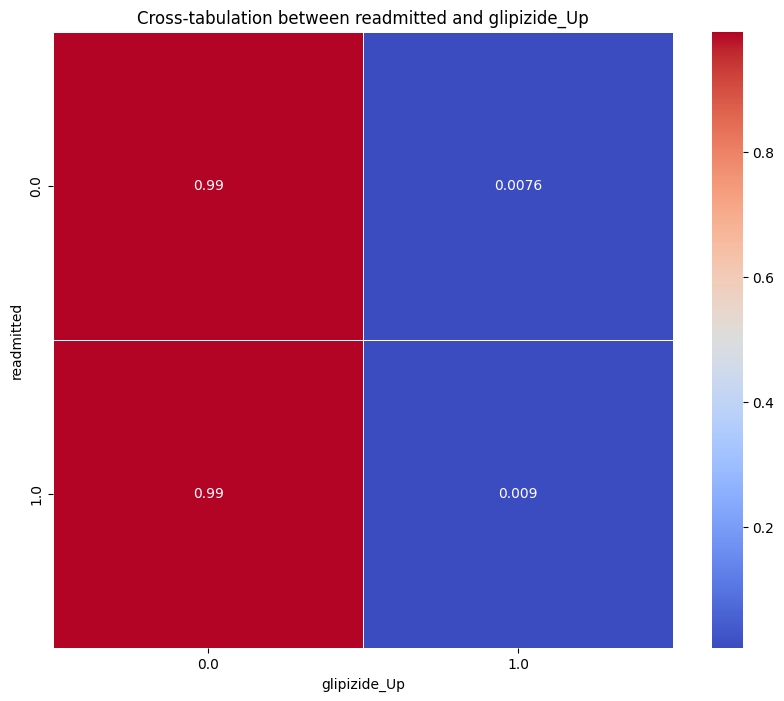

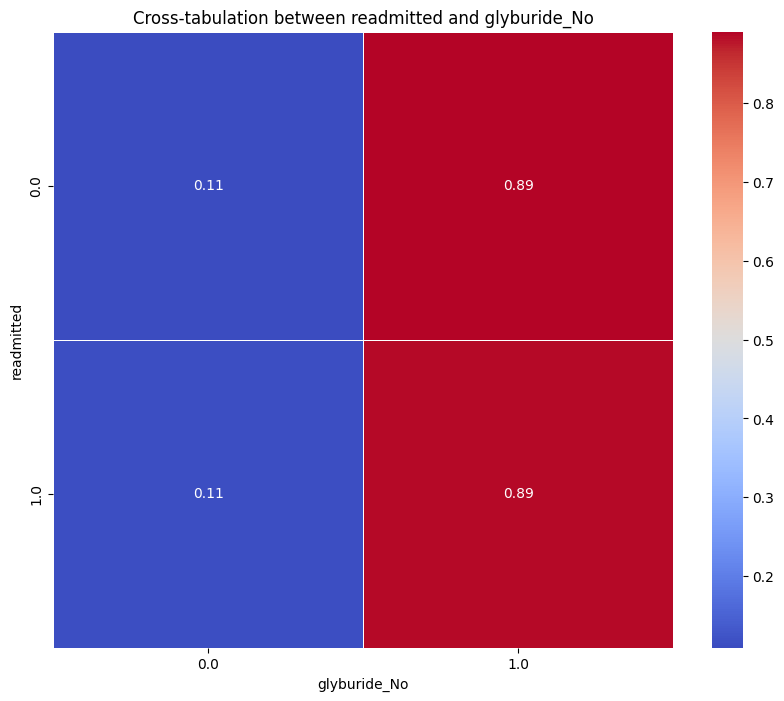

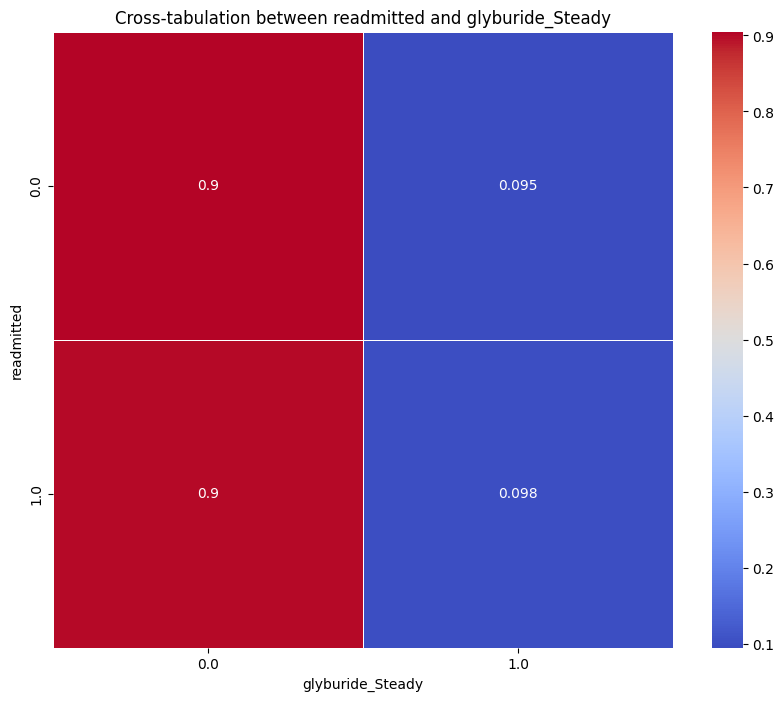

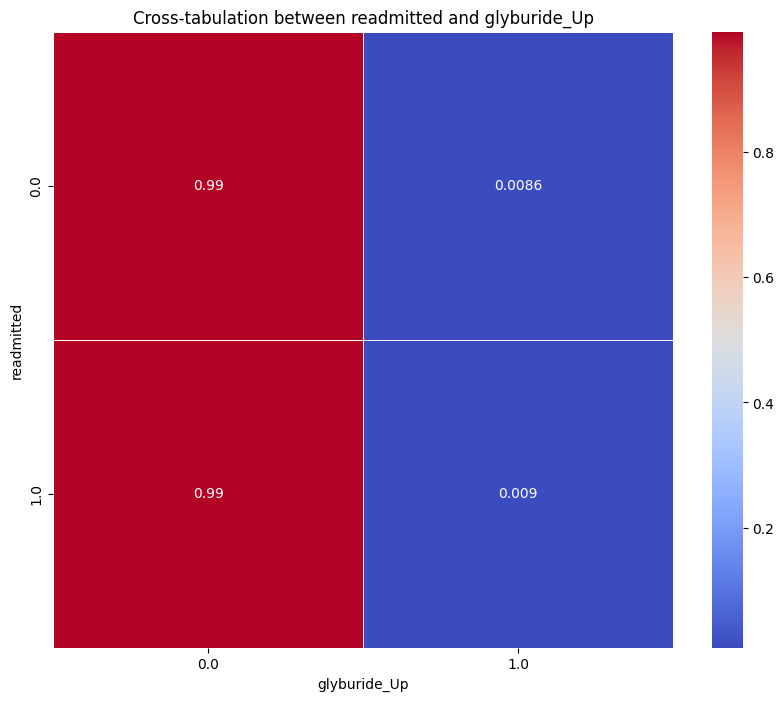

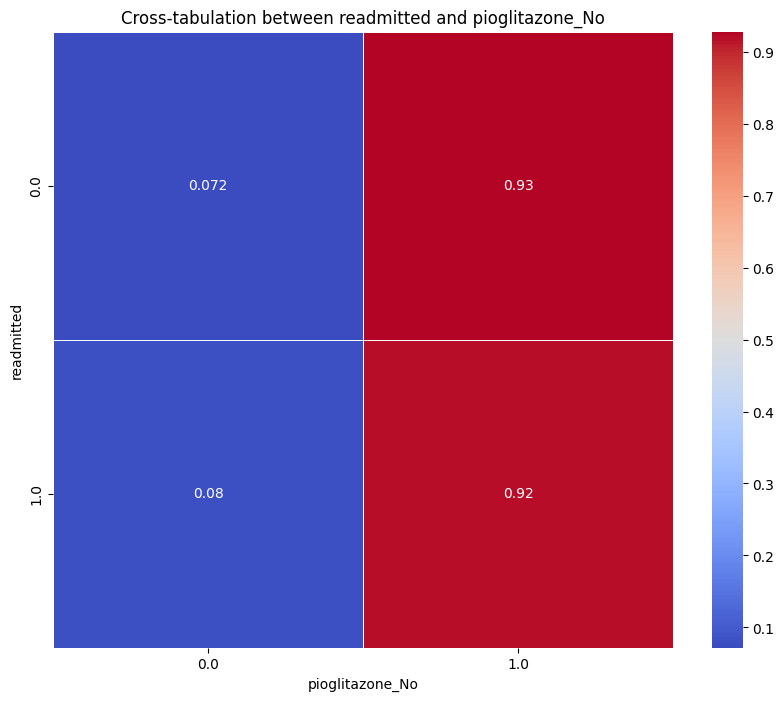

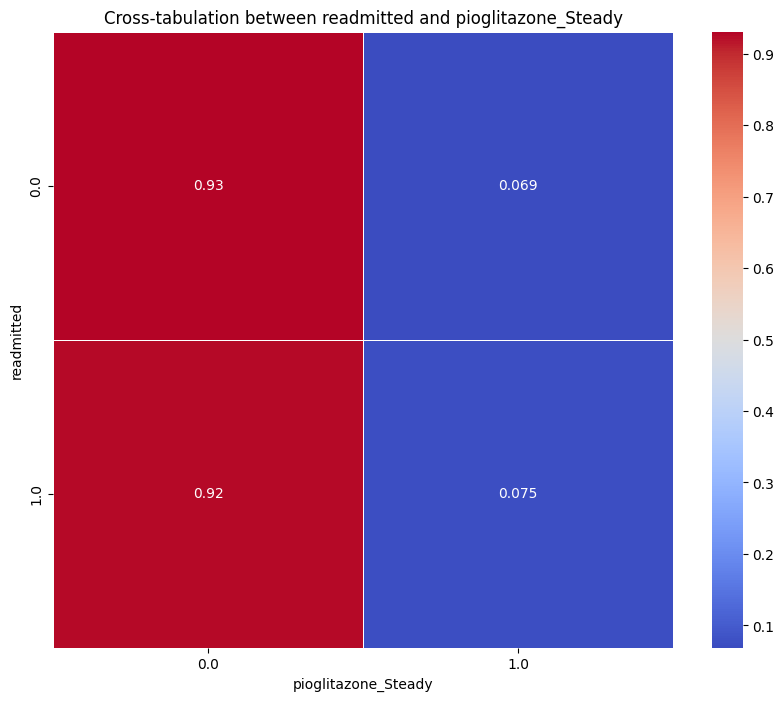

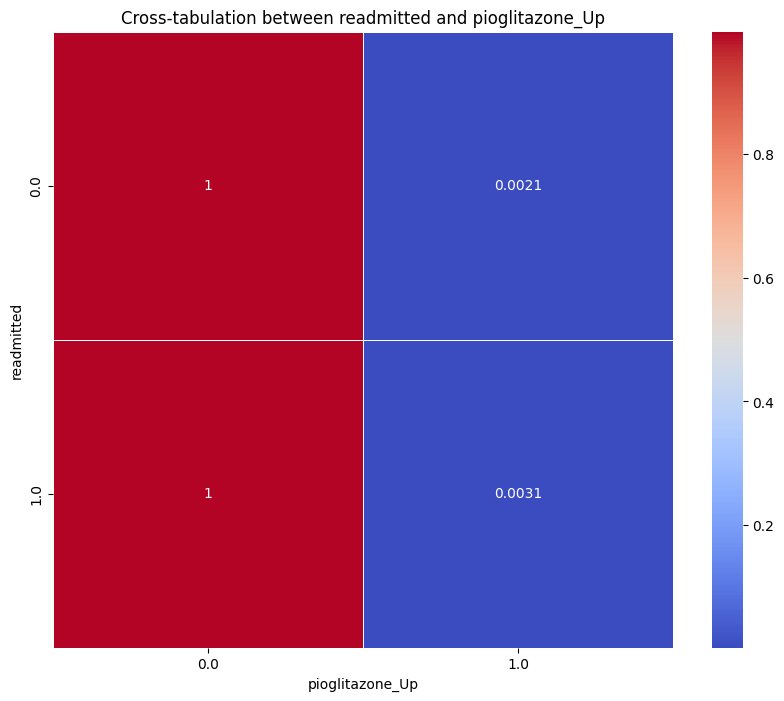

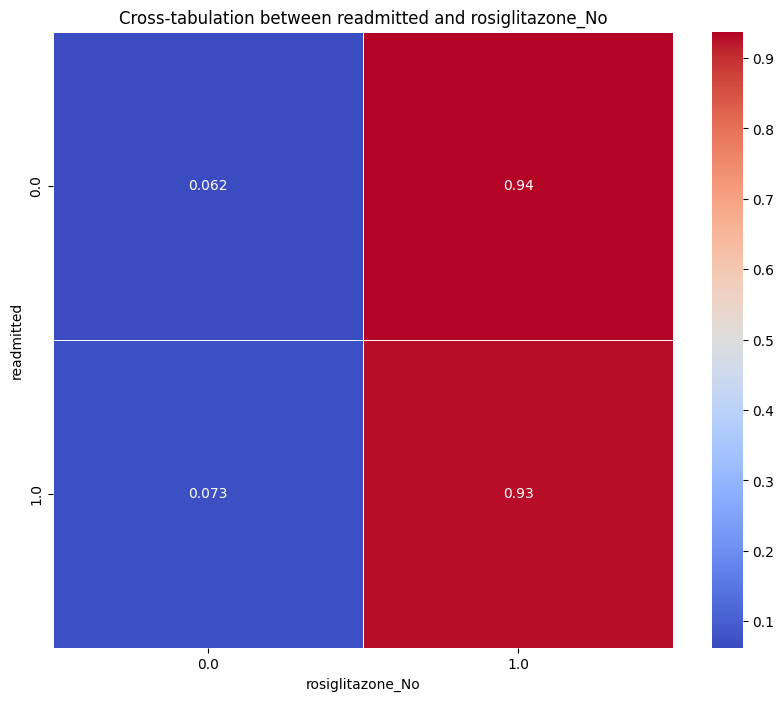

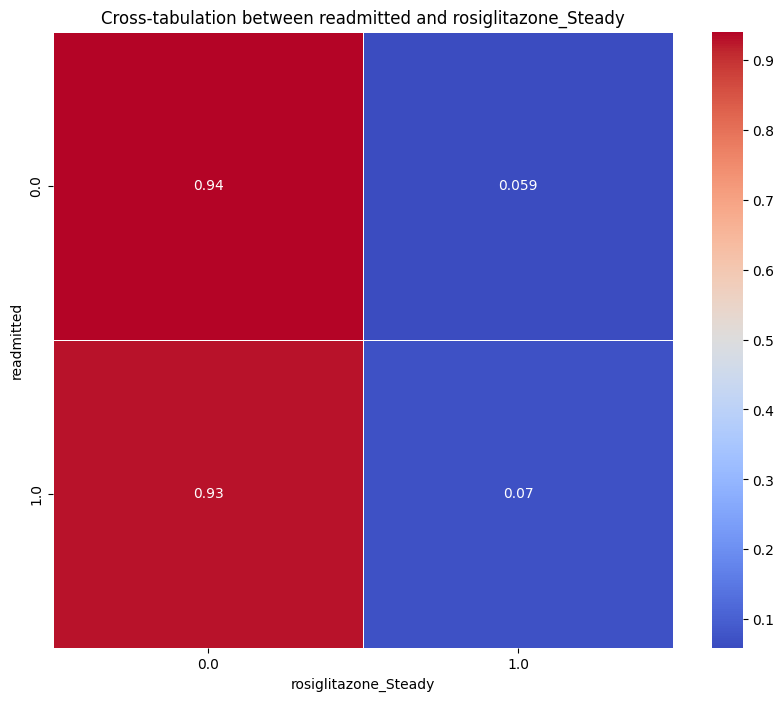

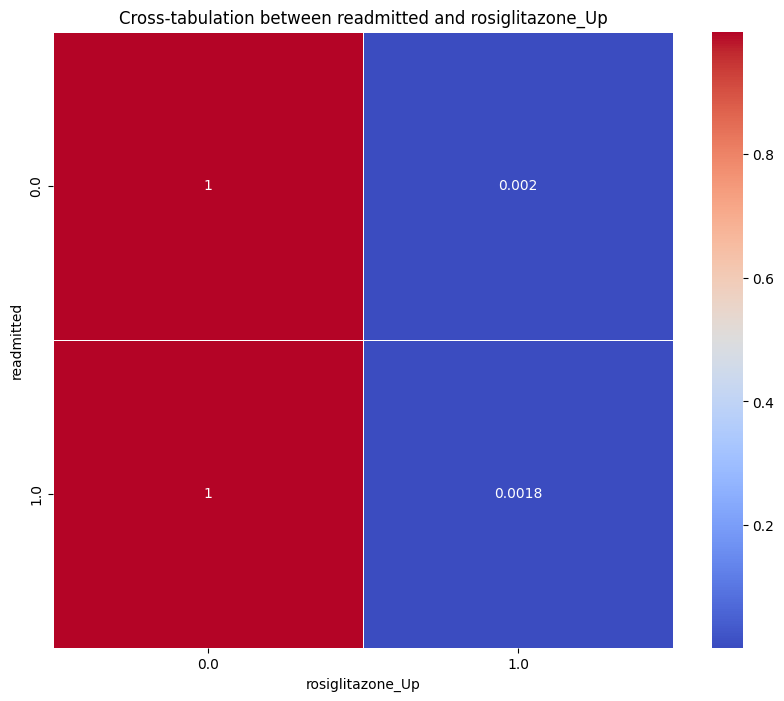

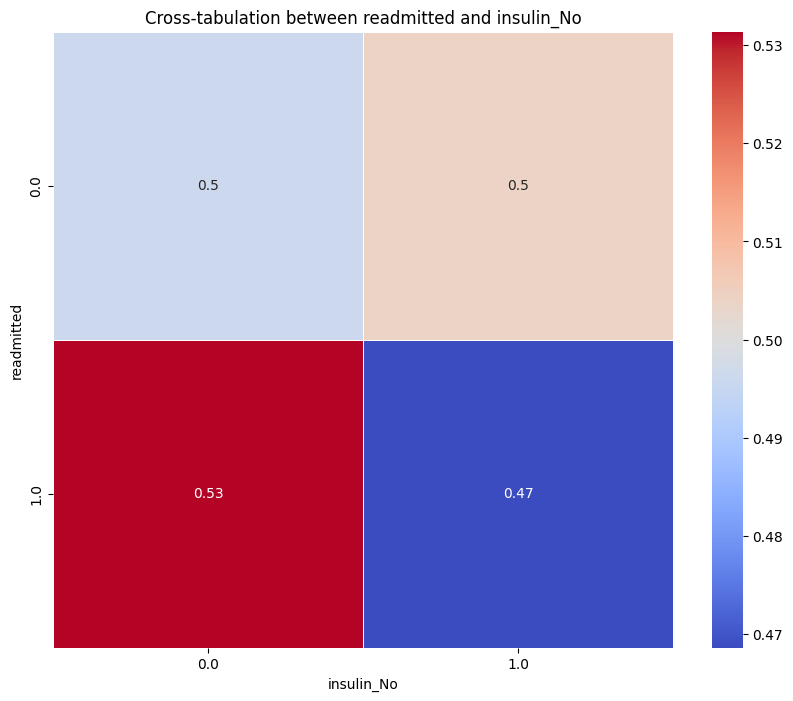

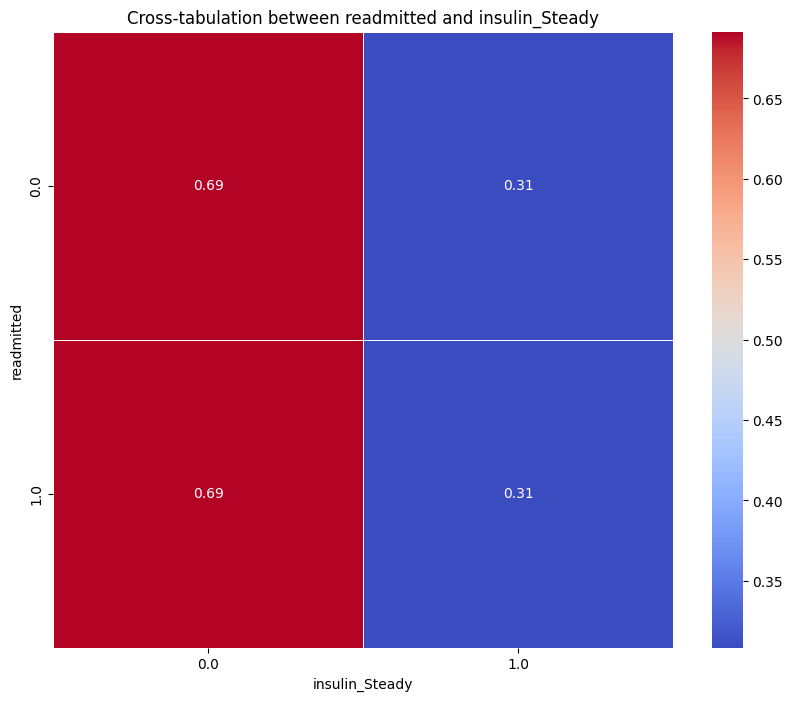

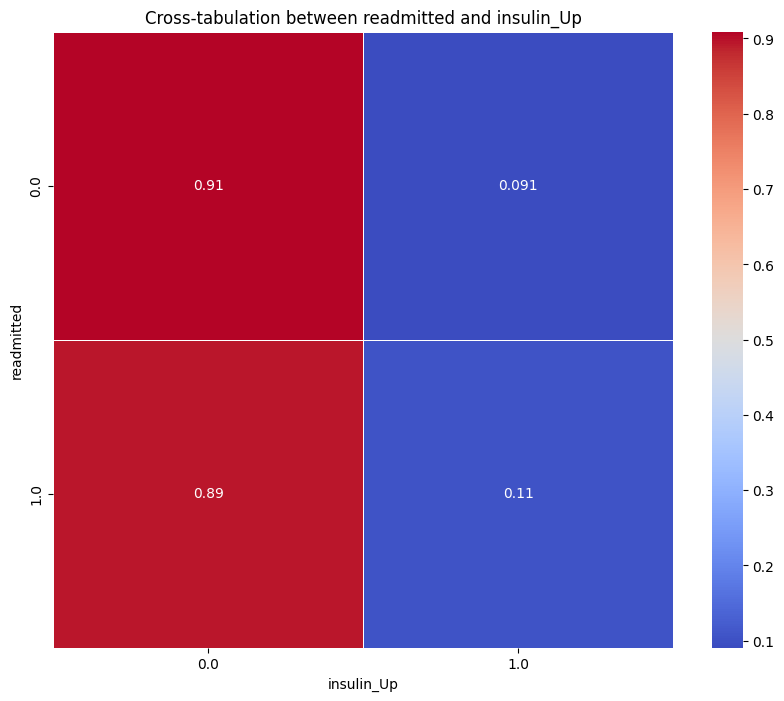

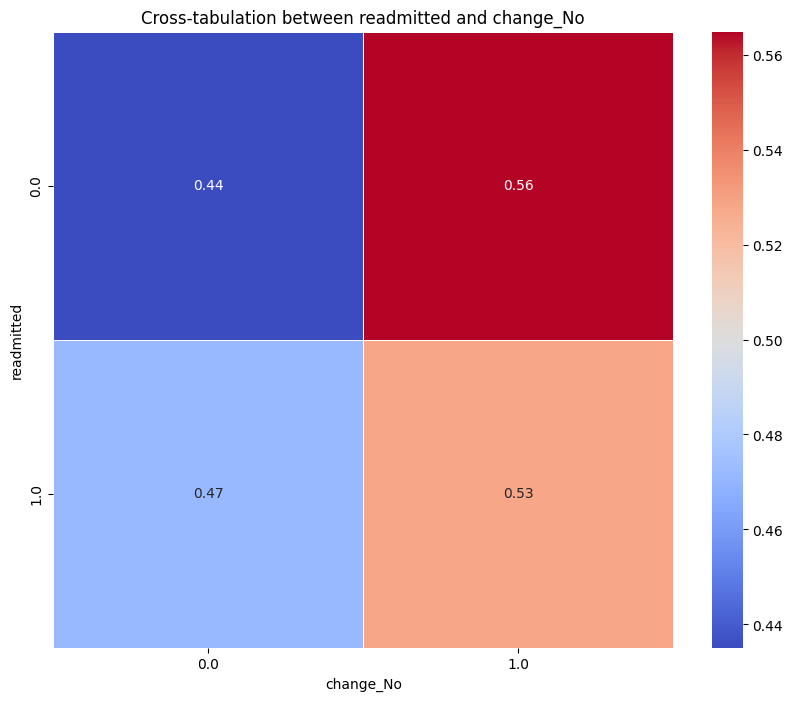

In [54]:
# Create and visualize cross-tabulations between 'readmitted' and each one-hot encoded column
def pairedAnalysis(df, column1, column2):
    df_ct = pd.crosstab(df[column2], df[column1])
    df_pct = df_ct.div(df_ct.sum(axis=1), axis=0)
    return df_pct

for col in new_columns:
    crosstab = pairedAnalysis(df_transformed, col, 'readmitted')
    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Cross-tabulation between readmitted and {col}')
    plt.show()

In [55]:
from scipy.stats import chi2_contingency
# Calculate chi-square statistic for each one-hot encoded column with 'readmitted'
chi2_results = {}
for col in new_columns:
    crosstab = pd.crosstab(df_transformed['readmitted'], df_transformed[col])
    chi2, p, dof, ex = chi2_contingency(crosstab)
    chi2_results[col] = chi2

# Identify columns with high chi-square values
high_chi2_columns = sorted(chi2_results, key=chi2_results.get, reverse=True)

# Print the columns with high chi-square values
print("Categorical columns with high cross-tabulation values with 'readmitted':")
for col in high_chi2_columns:
    print(f"{col}: {chi2_results[col]}")

Categorical columns with high cross-tabulation values with 'readmitted':
diag_2_Diabetes: 196.1767157594698
diag_3_Diabetes: 160.72026331461655
diag_3_NAN: 110.51788856980025
race_Caucasian: 109.37704690081648
race_nan: 91.94623290065928
change_No: 91.38900962940609
insulin_No: 84.47631137273842
diag_1_Neoplasms: 70.07457633400529
glipizide_No: 50.860894342875085
diag_1_Musculoskeletal: 47.299327928352575
diag_2_NAN: 44.29944251085292
insulin_Up: 40.1961735364587
metformin_No: 39.39897618152304
glipizide_Steady: 37.160981087744034
A1Cresult_nan: 33.823395637483834
rosiglitazone_Steady: 33.27870915807307
metformin_Steady: 33.071853114906276
diag_1_Diabetes: 31.55102421297598
diag_3_Respiratory: 31.036638177956096
A1Cresult_Norm: 30.50698123307874
rosiglitazone_No: 27.887762576321744
max_glu_serum_nan: 24.45159328656549
max_glu_serum_>300: 24.412506167548663
diag_2_Injury: 22.29789417318417
race_Other: 22.056365497157984
race_Asian: 21.625624878888
diag_1_Respiratory: 19.021499753553837


<h2 style="text-align: center; color: green;"><b>EDA Summary</b></h2>

<p style="color: green;">Based on the provided insights, here is a structured summary of the Exploratory Data Analysis (EDA) and the key features to be considered for further data analytics on "Readmission Prediction."</p>

---

<h3 style="color: green;">1. Summary of EDA Analysis</h3>

<p style="color: green;">The EDA focused on understanding the relationships between various patient attributes and the likelihood of hospital readmission. The analysis included visualizations and statistical summaries to identify potential patterns and correlations in the data. Key findings from the EDA are as follows:</p>

<ul style="color: green;">
    <li><b>Demographics (Age)</b>: Older patients tend to have a slightly higher readmission rate. Age has a weak positive correlation with readmission, indicating that older individuals may require more care post-discharge.</li>
    <li><b>Hospital Stay (Time in Hospital)</b>: Patients with longer hospital stays are marginally more likely to be readmitted, possibly due to the severity of their conditions. This feature shows a weak correlation with readmission, suggesting it could be an indicator in complex cases.</li>
    <li><b>Lab and Medical Procedures</b>: The number of lab procedures and medical procedures did not strongly correlate with readmission. However, patients with frequent lab procedures often had more complex health conditions, which might be relevant in some cases.</li>
    <li><b>Number of Medications</b>: This feature has a moderate correlation with readmission. Patients with a high number of medications are more likely to be readmitted, which may be due to the complexity of their medical management and potential challenges in medication adherence.</li>
    <li><b>ER and Inpatient Visits</b>: Patients with a history of multiple inpatient or emergency room visits are at a higher risk of readmission. The number of inpatient visits, in particular, shows a positive correlation with readmission, indicating that previous hospitalizations may signal unresolved health issues.</li>
    <li><b>Chronic Conditions and Diagnoses</b>: Patients with a higher number of diagnoses are generally more complex cases and are more prone to readmission. This feature has a noticeable positive correlation with readmission, reflecting the challenges in managing multiple chronic conditions.</li>
    <li><b>Blood Sugar Control (A1C Levels and Glucose)</b>: Elevated A1C levels and glucose serum values are associated with higher readmission rates, highlighting the importance of blood sugar management in diabetic patients. Patients with poorly controlled blood sugar levels may have a harder time stabilizing post-discharge, leading to a higher risk of readmission.</li>
    <li><b>Medication Changes</b>: Patients who had changes in their medication regimen showed a slightly higher readmission rate, which might indicate the complexity of adjusting to new treatments or dosage modifications.</li>
</ul>

<p style="color: green;">Overall, the EDA suggests that multiple factors, including age, previous hospital visits, medication count, number of diagnoses, and blood sugar control, contribute to the likelihood of readmission. This foundational understanding provides a basis for selecting features for predictive modeling.</p>

---

<h3 style="color: green;">2. Important Features and Points for "Readmission Prediction"</h3>

<p style="color: green;">For building a predictive model for readmission, the following features have been identified as important based on the EDA:</p>

<ul style="color: green;">
    <li><b>Number of Medications</b>: This is one of the stronger predictors of readmission, reflecting the complexity of a patient's medical management. Patients on multiple medications may need enhanced monitoring post-discharge.</li>
    <li><b>Number of Diagnoses</b>: Multiple diagnoses suggest a complex health profile, making this feature crucial for predicting readmission. Patients with several health conditions are more likely to experience complications, leading to readmission.</li>
    <li><b>Number of Inpatient Visits</b>: The history of inpatient visits serves as a useful indicator of past health issues and potential risk for future readmission. This feature captures the chronicity of a patient's condition.</li>
    <li><b>Time in Hospital</b>: Length of stay might help capture the severity of illness or the extent of treatment received. Longer hospital stays might indicate more complex cases requiring follow-up.</li>
    <li><b>Emergency Room Visits</b>: Frequent ER visits could signal an unstable health condition, making this feature relevant for identifying high-risk patients.</li>
    <li><b>A1C Levels and Glucose Serum</b>: Poor blood sugar control (higher A1C and glucose levels) is a strong indicator of readmission risk in diabetic patients. This feature is particularly important for diabetes-related readmission analysis.</li>
    <li><b>Age</b>: Although age has a weaker correlation, it remains an important demographic factor in healthcare. Older patients may have additional vulnerabilities post-discharge, contributing to readmission risk.</li>
    <li><b>Change in Medications</b>: Medication changes can indicate recent adjustments in treatment that might affect readmission risk. This feature is useful in understanding how treatment modifications impact patient stability.</li>
</ul>

<p style="color: green;"><b>In summary</b>, the model for "Readmission Prediction" should consider a mix of clinical and demographic features, focusing particularly on metrics related to chronic health conditions, treatment complexity, and blood sugar control. Incorporating these features will allow the model to better capture the risk factors associated with readmission, helping healthcare providers target interventions for high-risk patients.</p>
